The goal of this convolutional neural network is to be able to return slope of linear lines.

This is because the current convolutional network essentially "draws" what a normal tau graph might look like, using the training sets to refine this drawing, instead of actually analyzing the data. This is shown when inputting linear functions or the heavyside function as flux and getting the exact same result. We'll be trying to get different results here with slope.

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

In [2]:
def createTrainer(num):
    lines = torch.zeros(num,1,100)
    outputs = torch.zeros(num,1,100)
    slopes = torch.rand((num))
    slopes = slopes/2
    for i in range(num):
        lines[i,0] = torch.linspace(0,slopes[i], 100)
        outputs[i,0] = torch.linspace(0,2*slopes[i], 100)
    return lines, outputs

ins, outs = createTrainer(100)
print(ins)
print(outs)

tensor([[[0.0000e+00, 3.9445e-03, 7.8890e-03,  ..., 3.8262e-01,
          3.8656e-01, 3.9051e-01]],

        [[0.0000e+00, 4.8628e-03, 9.7256e-03,  ..., 4.7169e-01,
          4.7656e-01, 4.8142e-01]],

        [[0.0000e+00, 1.3145e-03, 2.6289e-03,  ..., 1.2750e-01,
          1.2882e-01, 1.3013e-01]],

        ...,

        [[0.0000e+00, 2.4485e-03, 4.8971e-03,  ..., 2.3751e-01,
          2.3996e-01, 2.4240e-01]],

        [[0.0000e+00, 2.9398e-04, 5.8796e-04,  ..., 2.8516e-02,
          2.8810e-02, 2.9104e-02]],

        [[0.0000e+00, 1.9767e-04, 3.9534e-04,  ..., 1.9174e-02,
          1.9372e-02, 1.9569e-02]]])
tensor([[[0.0000e+00, 7.8890e-03, 1.5778e-02,  ..., 7.6524e-01,
          7.7313e-01, 7.8102e-01]],

        [[0.0000e+00, 9.7256e-03, 1.9451e-02,  ..., 9.4339e-01,
          9.5311e-01, 9.6284e-01]],

        [[0.0000e+00, 2.6289e-03, 5.2578e-03,  ..., 2.5501e-01,
          2.5763e-01, 2.6026e-01]],

        ...,

        [[0.0000e+00, 4.8971e-03, 9.7941e-03,  ..., 4.7501e-01,

Epoch =  0
Training Loss =  tensor(0.1072, grad_fn=<MseLossBackward>)
Epoch =  1
Training Loss =  tensor(0.1015, grad_fn=<MseLossBackward>)
Epoch =  2
Training Loss =  tensor(0.1040, grad_fn=<MseLossBackward>)
Epoch =  3
Training Loss =  tensor(0.1233, grad_fn=<MseLossBackward>)
Epoch =  4
Training Loss =  tensor(0.1112, grad_fn=<MseLossBackward>)
Epoch =  5
Training Loss =  tensor(0.1141, grad_fn=<MseLossBackward>)
Epoch =  6
Training Loss =  tensor(0.1149, grad_fn=<MseLossBackward>)
Epoch =  7
Training Loss =  tensor(0.1035, grad_fn=<MseLossBackward>)
Epoch =  8
Training Loss =  tensor(0.1130, grad_fn=<MseLossBackward>)
Epoch =  9
Training Loss =  tensor(0.1099, grad_fn=<MseLossBackward>)
Epoch =  10
Training Loss =  tensor(0.1159, grad_fn=<MseLossBackward>)
Epoch =  11
Training Loss =  tensor(0.1179, grad_fn=<MseLossBackward>)
Epoch =  12
Training Loss =  tensor(0.0980, grad_fn=<MseLossBackward>)
Epoch =  13
Training Loss =  tensor(0.1307, grad_fn=<MseLossBackward>)
Epoch =  14
Trai

Epoch =  123
Training Loss =  tensor(0.1228, grad_fn=<MseLossBackward>)
Epoch =  124
Training Loss =  tensor(0.1154, grad_fn=<MseLossBackward>)
Epoch =  125
Training Loss =  tensor(0.1107, grad_fn=<MseLossBackward>)
Epoch =  126
Training Loss =  tensor(0.1332, grad_fn=<MseLossBackward>)
Epoch =  127
Training Loss =  tensor(0.1058, grad_fn=<MseLossBackward>)
Epoch =  128
Training Loss =  tensor(0.1088, grad_fn=<MseLossBackward>)
Epoch =  129
Training Loss =  tensor(0.1112, grad_fn=<MseLossBackward>)
Epoch =  130
Training Loss =  tensor(0.1173, grad_fn=<MseLossBackward>)
Epoch =  131
Training Loss =  tensor(0.1406, grad_fn=<MseLossBackward>)
Epoch =  132
Training Loss =  tensor(0.1151, grad_fn=<MseLossBackward>)
Epoch =  133
Training Loss =  tensor(0.1207, grad_fn=<MseLossBackward>)
Epoch =  134
Training Loss =  tensor(0.1148, grad_fn=<MseLossBackward>)
Epoch =  135
Training Loss =  tensor(0.0868, grad_fn=<MseLossBackward>)
Epoch =  136
Training Loss =  tensor(0.1123, grad_fn=<MseLossBac

Epoch =  241
Training Loss =  tensor(0.1098, grad_fn=<MseLossBackward>)
Epoch =  242
Training Loss =  tensor(0.1211, grad_fn=<MseLossBackward>)
Epoch =  243
Training Loss =  tensor(0.1112, grad_fn=<MseLossBackward>)
Epoch =  244
Training Loss =  tensor(0.1048, grad_fn=<MseLossBackward>)
Epoch =  245
Training Loss =  tensor(0.1047, grad_fn=<MseLossBackward>)
Epoch =  246
Training Loss =  tensor(0.1025, grad_fn=<MseLossBackward>)
Epoch =  247
Training Loss =  tensor(0.1136, grad_fn=<MseLossBackward>)
Epoch =  248
Training Loss =  tensor(0.1178, grad_fn=<MseLossBackward>)
Epoch =  249
Training Loss =  tensor(0.0947, grad_fn=<MseLossBackward>)
Epoch =  250
Training Loss =  tensor(0.1204, grad_fn=<MseLossBackward>)
Epoch =  251
Training Loss =  tensor(0.0998, grad_fn=<MseLossBackward>)
Epoch =  252
Training Loss =  tensor(0.1139, grad_fn=<MseLossBackward>)
Epoch =  253
Training Loss =  tensor(0.0984, grad_fn=<MseLossBackward>)
Epoch =  254
Training Loss =  tensor(0.1029, grad_fn=<MseLossBac

Epoch =  363
Training Loss =  tensor(0.1079, grad_fn=<MseLossBackward>)
Epoch =  364
Training Loss =  tensor(0.1105, grad_fn=<MseLossBackward>)
Epoch =  365
Training Loss =  tensor(0.1223, grad_fn=<MseLossBackward>)
Epoch =  366
Training Loss =  tensor(0.1178, grad_fn=<MseLossBackward>)
Epoch =  367
Training Loss =  tensor(0.1058, grad_fn=<MseLossBackward>)
Epoch =  368
Training Loss =  tensor(0.1144, grad_fn=<MseLossBackward>)
Epoch =  369
Training Loss =  tensor(0.1287, grad_fn=<MseLossBackward>)
Epoch =  370
Training Loss =  tensor(0.1039, grad_fn=<MseLossBackward>)
Epoch =  371
Training Loss =  tensor(0.1053, grad_fn=<MseLossBackward>)
Epoch =  372
Training Loss =  tensor(0.1150, grad_fn=<MseLossBackward>)
Epoch =  373
Training Loss =  tensor(0.0927, grad_fn=<MseLossBackward>)
Epoch =  374
Training Loss =  tensor(0.1093, grad_fn=<MseLossBackward>)
Epoch =  375
Training Loss =  tensor(0.1039, grad_fn=<MseLossBackward>)
Epoch =  376
Training Loss =  tensor(0.1188, grad_fn=<MseLossBac

Epoch =  489
Training Loss =  tensor(0.1093, grad_fn=<MseLossBackward>)
Epoch =  490
Training Loss =  tensor(0.1071, grad_fn=<MseLossBackward>)
Epoch =  491
Training Loss =  tensor(0.1101, grad_fn=<MseLossBackward>)
Epoch =  492
Training Loss =  tensor(0.0935, grad_fn=<MseLossBackward>)
Epoch =  493
Training Loss =  tensor(0.1028, grad_fn=<MseLossBackward>)
Epoch =  494
Training Loss =  tensor(0.1041, grad_fn=<MseLossBackward>)
Epoch =  495
Training Loss =  tensor(0.1105, grad_fn=<MseLossBackward>)
Epoch =  496
Training Loss =  tensor(0.1251, grad_fn=<MseLossBackward>)
Epoch =  497
Training Loss =  tensor(0.1140, grad_fn=<MseLossBackward>)
Epoch =  498
Training Loss =  tensor(0.1250, grad_fn=<MseLossBackward>)
Epoch =  499
Training Loss =  tensor(0.1037, grad_fn=<MseLossBackward>)
Epoch =  500
Training Loss =  tensor(0.1050, grad_fn=<MseLossBackward>)
Epoch =  501
Training Loss =  tensor(0.1064, grad_fn=<MseLossBackward>)
Epoch =  502
Training Loss =  tensor(0.1235, grad_fn=<MseLossBac

Epoch =  613
Training Loss =  tensor(0.1025, grad_fn=<MseLossBackward>)
Epoch =  614
Training Loss =  tensor(0.0929, grad_fn=<MseLossBackward>)
Epoch =  615
Training Loss =  tensor(0.1004, grad_fn=<MseLossBackward>)
Epoch =  616
Training Loss =  tensor(0.1021, grad_fn=<MseLossBackward>)
Epoch =  617
Training Loss =  tensor(0.0943, grad_fn=<MseLossBackward>)
Epoch =  618
Training Loss =  tensor(0.1078, grad_fn=<MseLossBackward>)
Epoch =  619
Training Loss =  tensor(0.1015, grad_fn=<MseLossBackward>)
Epoch =  620
Training Loss =  tensor(0.1091, grad_fn=<MseLossBackward>)
Epoch =  621
Training Loss =  tensor(0.0956, grad_fn=<MseLossBackward>)
Epoch =  622
Training Loss =  tensor(0.1014, grad_fn=<MseLossBackward>)
Epoch =  623
Training Loss =  tensor(0.1130, grad_fn=<MseLossBackward>)
Epoch =  624
Training Loss =  tensor(0.1120, grad_fn=<MseLossBackward>)
Epoch =  625
Training Loss =  tensor(0.0935, grad_fn=<MseLossBackward>)
Epoch =  626
Training Loss =  tensor(0.1122, grad_fn=<MseLossBac

Training Loss =  tensor(0.0965, grad_fn=<MseLossBackward>)
Epoch =  739
Training Loss =  tensor(0.1070, grad_fn=<MseLossBackward>)
Epoch =  740
Training Loss =  tensor(0.0895, grad_fn=<MseLossBackward>)
Epoch =  741
Training Loss =  tensor(0.1165, grad_fn=<MseLossBackward>)
Epoch =  742
Training Loss =  tensor(0.1016, grad_fn=<MseLossBackward>)
Epoch =  743
Training Loss =  tensor(0.1101, grad_fn=<MseLossBackward>)
Epoch =  744
Training Loss =  tensor(0.1031, grad_fn=<MseLossBackward>)
Epoch =  745
Training Loss =  tensor(0.1187, grad_fn=<MseLossBackward>)
Epoch =  746
Training Loss =  tensor(0.1084, grad_fn=<MseLossBackward>)
Epoch =  747
Training Loss =  tensor(0.0847, grad_fn=<MseLossBackward>)
Epoch =  748
Training Loss =  tensor(0.1120, grad_fn=<MseLossBackward>)
Epoch =  749
Training Loss =  tensor(0.1057, grad_fn=<MseLossBackward>)
Epoch =  750
Training Loss =  tensor(0.1054, grad_fn=<MseLossBackward>)
Epoch =  751
Training Loss =  tensor(0.0990, grad_fn=<MseLossBackward>)
Epoch

Epoch =  864
Training Loss =  tensor(0.0903, grad_fn=<MseLossBackward>)
Epoch =  865
Training Loss =  tensor(0.0934, grad_fn=<MseLossBackward>)
Epoch =  866
Training Loss =  tensor(0.0974, grad_fn=<MseLossBackward>)
Epoch =  867
Training Loss =  tensor(0.1045, grad_fn=<MseLossBackward>)
Epoch =  868
Training Loss =  tensor(0.1065, grad_fn=<MseLossBackward>)
Epoch =  869
Training Loss =  tensor(0.1013, grad_fn=<MseLossBackward>)
Epoch =  870
Training Loss =  tensor(0.1207, grad_fn=<MseLossBackward>)
Epoch =  871
Training Loss =  tensor(0.1097, grad_fn=<MseLossBackward>)
Epoch =  872
Training Loss =  tensor(0.1076, grad_fn=<MseLossBackward>)
Epoch =  873
Training Loss =  tensor(0.0994, grad_fn=<MseLossBackward>)
Epoch =  874
Training Loss =  tensor(0.1037, grad_fn=<MseLossBackward>)
Epoch =  875
Training Loss =  tensor(0.0964, grad_fn=<MseLossBackward>)
Epoch =  876
Training Loss =  tensor(0.0986, grad_fn=<MseLossBackward>)
Epoch =  877
Training Loss =  tensor(0.0940, grad_fn=<MseLossBac

Epoch =  986
Training Loss =  tensor(0.1066, grad_fn=<MseLossBackward>)
Epoch =  987
Training Loss =  tensor(0.1003, grad_fn=<MseLossBackward>)
Epoch =  988
Training Loss =  tensor(0.0884, grad_fn=<MseLossBackward>)
Epoch =  989
Training Loss =  tensor(0.0878, grad_fn=<MseLossBackward>)
Epoch =  990
Training Loss =  tensor(0.1148, grad_fn=<MseLossBackward>)
Epoch =  991
Training Loss =  tensor(0.0983, grad_fn=<MseLossBackward>)
Epoch =  992
Training Loss =  tensor(0.1127, grad_fn=<MseLossBackward>)
Epoch =  993
Training Loss =  tensor(0.0952, grad_fn=<MseLossBackward>)
Epoch =  994
Training Loss =  tensor(0.1112, grad_fn=<MseLossBackward>)
Epoch =  995
Training Loss =  tensor(0.1075, grad_fn=<MseLossBackward>)
Epoch =  996
Training Loss =  tensor(0.1044, grad_fn=<MseLossBackward>)
Epoch =  997
Training Loss =  tensor(0.1033, grad_fn=<MseLossBackward>)
Epoch =  998
Training Loss =  tensor(0.1056, grad_fn=<MseLossBackward>)
Epoch =  999
Training Loss =  tensor(0.1095, grad_fn=<MseLossBac

Epoch =  1111
Training Loss =  tensor(0.1219, grad_fn=<MseLossBackward>)
Epoch =  1112
Training Loss =  tensor(0.0970, grad_fn=<MseLossBackward>)
Epoch =  1113
Training Loss =  tensor(0.1047, grad_fn=<MseLossBackward>)
Epoch =  1114
Training Loss =  tensor(0.1060, grad_fn=<MseLossBackward>)
Epoch =  1115
Training Loss =  tensor(0.0964, grad_fn=<MseLossBackward>)
Epoch =  1116
Training Loss =  tensor(0.0929, grad_fn=<MseLossBackward>)
Epoch =  1117
Training Loss =  tensor(0.1086, grad_fn=<MseLossBackward>)
Epoch =  1118
Training Loss =  tensor(0.0879, grad_fn=<MseLossBackward>)
Epoch =  1119
Training Loss =  tensor(0.0972, grad_fn=<MseLossBackward>)
Epoch =  1120
Training Loss =  tensor(0.1118, grad_fn=<MseLossBackward>)
Epoch =  1121
Training Loss =  tensor(0.1034, grad_fn=<MseLossBackward>)
Epoch =  1122
Training Loss =  tensor(0.1230, grad_fn=<MseLossBackward>)
Epoch =  1123
Training Loss =  tensor(0.1141, grad_fn=<MseLossBackward>)
Epoch =  1124
Training Loss =  tensor(0.1026, grad_

Training Loss =  tensor(0.1131, grad_fn=<MseLossBackward>)
Epoch =  1238
Training Loss =  tensor(0.1065, grad_fn=<MseLossBackward>)
Epoch =  1239
Training Loss =  tensor(0.0939, grad_fn=<MseLossBackward>)
Epoch =  1240
Training Loss =  tensor(0.0794, grad_fn=<MseLossBackward>)
Epoch =  1241
Training Loss =  tensor(0.1055, grad_fn=<MseLossBackward>)
Epoch =  1242
Training Loss =  tensor(0.1008, grad_fn=<MseLossBackward>)
Epoch =  1243
Training Loss =  tensor(0.1096, grad_fn=<MseLossBackward>)
Epoch =  1244
Training Loss =  tensor(0.0997, grad_fn=<MseLossBackward>)
Epoch =  1245
Training Loss =  tensor(0.0947, grad_fn=<MseLossBackward>)
Epoch =  1246
Training Loss =  tensor(0.0832, grad_fn=<MseLossBackward>)
Epoch =  1247
Training Loss =  tensor(0.0823, grad_fn=<MseLossBackward>)
Epoch =  1248
Training Loss =  tensor(0.1104, grad_fn=<MseLossBackward>)
Epoch =  1249
Training Loss =  tensor(0.0870, grad_fn=<MseLossBackward>)
Epoch =  1250
Training Loss =  tensor(0.1013, grad_fn=<MseLossBac

Epoch =  1361
Training Loss =  tensor(0.1087, grad_fn=<MseLossBackward>)
Epoch =  1362
Training Loss =  tensor(0.0985, grad_fn=<MseLossBackward>)
Epoch =  1363
Training Loss =  tensor(0.1157, grad_fn=<MseLossBackward>)
Epoch =  1364
Training Loss =  tensor(0.0962, grad_fn=<MseLossBackward>)
Epoch =  1365
Training Loss =  tensor(0.1040, grad_fn=<MseLossBackward>)
Epoch =  1366
Training Loss =  tensor(0.0882, grad_fn=<MseLossBackward>)
Epoch =  1367
Training Loss =  tensor(0.1067, grad_fn=<MseLossBackward>)
Epoch =  1368
Training Loss =  tensor(0.0988, grad_fn=<MseLossBackward>)
Epoch =  1369
Training Loss =  tensor(0.0916, grad_fn=<MseLossBackward>)
Epoch =  1370
Training Loss =  tensor(0.1047, grad_fn=<MseLossBackward>)
Epoch =  1371
Training Loss =  tensor(0.1056, grad_fn=<MseLossBackward>)
Epoch =  1372
Training Loss =  tensor(0.1136, grad_fn=<MseLossBackward>)
Epoch =  1373
Training Loss =  tensor(0.1096, grad_fn=<MseLossBackward>)
Epoch =  1374
Training Loss =  tensor(0.1049, grad_

Epoch =  1479
Training Loss =  tensor(0.0801, grad_fn=<MseLossBackward>)
Epoch =  1480
Training Loss =  tensor(0.0923, grad_fn=<MseLossBackward>)
Epoch =  1481
Training Loss =  tensor(0.1130, grad_fn=<MseLossBackward>)
Epoch =  1482
Training Loss =  tensor(0.1004, grad_fn=<MseLossBackward>)
Epoch =  1483
Training Loss =  tensor(0.0990, grad_fn=<MseLossBackward>)
Epoch =  1484
Training Loss =  tensor(0.0996, grad_fn=<MseLossBackward>)
Epoch =  1485
Training Loss =  tensor(0.1120, grad_fn=<MseLossBackward>)
Epoch =  1486
Training Loss =  tensor(0.0918, grad_fn=<MseLossBackward>)
Epoch =  1487
Training Loss =  tensor(0.0950, grad_fn=<MseLossBackward>)
Epoch =  1488
Training Loss =  tensor(0.1058, grad_fn=<MseLossBackward>)
Epoch =  1489
Training Loss =  tensor(0.1021, grad_fn=<MseLossBackward>)
Epoch =  1490
Training Loss =  tensor(0.1054, grad_fn=<MseLossBackward>)
Epoch =  1491
Training Loss =  tensor(0.1029, grad_fn=<MseLossBackward>)
Epoch =  1492
Training Loss =  tensor(0.0955, grad_

Epoch =  1600
Training Loss =  tensor(0.0931, grad_fn=<MseLossBackward>)
Epoch =  1601
Training Loss =  tensor(0.1109, grad_fn=<MseLossBackward>)
Epoch =  1602
Training Loss =  tensor(0.0886, grad_fn=<MseLossBackward>)
Epoch =  1603
Training Loss =  tensor(0.0808, grad_fn=<MseLossBackward>)
Epoch =  1604
Training Loss =  tensor(0.0941, grad_fn=<MseLossBackward>)
Epoch =  1605
Training Loss =  tensor(0.1001, grad_fn=<MseLossBackward>)
Epoch =  1606
Training Loss =  tensor(0.0998, grad_fn=<MseLossBackward>)
Epoch =  1607
Training Loss =  tensor(0.0912, grad_fn=<MseLossBackward>)
Epoch =  1608
Training Loss =  tensor(0.1001, grad_fn=<MseLossBackward>)
Epoch =  1609
Training Loss =  tensor(0.1067, grad_fn=<MseLossBackward>)
Epoch =  1610
Training Loss =  tensor(0.0960, grad_fn=<MseLossBackward>)
Epoch =  1611
Training Loss =  tensor(0.1032, grad_fn=<MseLossBackward>)
Epoch =  1612
Training Loss =  tensor(0.1019, grad_fn=<MseLossBackward>)
Epoch =  1613
Training Loss =  tensor(0.0994, grad_

Epoch =  1716
Training Loss =  tensor(0.1025, grad_fn=<MseLossBackward>)
Epoch =  1717
Training Loss =  tensor(0.0988, grad_fn=<MseLossBackward>)
Epoch =  1718
Training Loss =  tensor(0.1079, grad_fn=<MseLossBackward>)
Epoch =  1719
Training Loss =  tensor(0.1001, grad_fn=<MseLossBackward>)
Epoch =  1720
Training Loss =  tensor(0.0942, grad_fn=<MseLossBackward>)
Epoch =  1721
Training Loss =  tensor(0.0921, grad_fn=<MseLossBackward>)
Epoch =  1722
Training Loss =  tensor(0.0943, grad_fn=<MseLossBackward>)
Epoch =  1723
Training Loss =  tensor(0.1007, grad_fn=<MseLossBackward>)
Epoch =  1724
Training Loss =  tensor(0.1096, grad_fn=<MseLossBackward>)
Epoch =  1725
Training Loss =  tensor(0.1107, grad_fn=<MseLossBackward>)
Epoch =  1726
Training Loss =  tensor(0.0809, grad_fn=<MseLossBackward>)
Epoch =  1727
Training Loss =  tensor(0.0998, grad_fn=<MseLossBackward>)
Epoch =  1728
Training Loss =  tensor(0.0938, grad_fn=<MseLossBackward>)
Epoch =  1729
Training Loss =  tensor(0.0973, grad_

Epoch =  1840
Training Loss =  tensor(0.0865, grad_fn=<MseLossBackward>)
Epoch =  1841
Training Loss =  tensor(0.0906, grad_fn=<MseLossBackward>)
Epoch =  1842
Training Loss =  tensor(0.1006, grad_fn=<MseLossBackward>)
Epoch =  1843
Training Loss =  tensor(0.1005, grad_fn=<MseLossBackward>)
Epoch =  1844
Training Loss =  tensor(0.1046, grad_fn=<MseLossBackward>)
Epoch =  1845
Training Loss =  tensor(0.1008, grad_fn=<MseLossBackward>)
Epoch =  1846
Training Loss =  tensor(0.0942, grad_fn=<MseLossBackward>)
Epoch =  1847
Training Loss =  tensor(0.0982, grad_fn=<MseLossBackward>)
Epoch =  1848
Training Loss =  tensor(0.0863, grad_fn=<MseLossBackward>)
Epoch =  1849
Training Loss =  tensor(0.0854, grad_fn=<MseLossBackward>)
Epoch =  1850
Training Loss =  tensor(0.0793, grad_fn=<MseLossBackward>)
Epoch =  1851
Training Loss =  tensor(0.0922, grad_fn=<MseLossBackward>)
Epoch =  1852
Training Loss =  tensor(0.0996, grad_fn=<MseLossBackward>)
Epoch =  1853
Training Loss =  tensor(0.1020, grad_

Epoch =  1959
Training Loss =  tensor(0.1004, grad_fn=<MseLossBackward>)
Epoch =  1960
Training Loss =  tensor(0.1019, grad_fn=<MseLossBackward>)
Epoch =  1961
Training Loss =  tensor(0.0699, grad_fn=<MseLossBackward>)
Epoch =  1962
Training Loss =  tensor(0.0973, grad_fn=<MseLossBackward>)
Epoch =  1963
Training Loss =  tensor(0.1126, grad_fn=<MseLossBackward>)
Epoch =  1964
Training Loss =  tensor(0.1074, grad_fn=<MseLossBackward>)
Epoch =  1965
Training Loss =  tensor(0.0935, grad_fn=<MseLossBackward>)
Epoch =  1966
Training Loss =  tensor(0.0993, grad_fn=<MseLossBackward>)
Epoch =  1967
Training Loss =  tensor(0.1052, grad_fn=<MseLossBackward>)
Epoch =  1968
Training Loss =  tensor(0.1058, grad_fn=<MseLossBackward>)
Epoch =  1969
Training Loss =  tensor(0.0849, grad_fn=<MseLossBackward>)
Epoch =  1970
Training Loss =  tensor(0.0977, grad_fn=<MseLossBackward>)
Epoch =  1971
Training Loss =  tensor(0.1036, grad_fn=<MseLossBackward>)
Epoch =  1972
Training Loss =  tensor(0.1039, grad_

Epoch =  2078
Training Loss =  tensor(0.1008, grad_fn=<MseLossBackward>)
Epoch =  2079
Training Loss =  tensor(0.0865, grad_fn=<MseLossBackward>)
Epoch =  2080
Training Loss =  tensor(0.0891, grad_fn=<MseLossBackward>)
Epoch =  2081
Training Loss =  tensor(0.1006, grad_fn=<MseLossBackward>)
Epoch =  2082
Training Loss =  tensor(0.1042, grad_fn=<MseLossBackward>)
Epoch =  2083
Training Loss =  tensor(0.1083, grad_fn=<MseLossBackward>)
Epoch =  2084
Training Loss =  tensor(0.1030, grad_fn=<MseLossBackward>)
Epoch =  2085
Training Loss =  tensor(0.0759, grad_fn=<MseLossBackward>)
Epoch =  2086
Training Loss =  tensor(0.1026, grad_fn=<MseLossBackward>)
Epoch =  2087
Training Loss =  tensor(0.0949, grad_fn=<MseLossBackward>)
Epoch =  2088
Training Loss =  tensor(0.0876, grad_fn=<MseLossBackward>)
Epoch =  2089
Training Loss =  tensor(0.0972, grad_fn=<MseLossBackward>)
Epoch =  2090
Training Loss =  tensor(0.0966, grad_fn=<MseLossBackward>)
Epoch =  2091
Training Loss =  tensor(0.0996, grad_

Epoch =  2202
Training Loss =  tensor(0.1038, grad_fn=<MseLossBackward>)
Epoch =  2203
Training Loss =  tensor(0.0994, grad_fn=<MseLossBackward>)
Epoch =  2204
Training Loss =  tensor(0.0994, grad_fn=<MseLossBackward>)
Epoch =  2205
Training Loss =  tensor(0.1056, grad_fn=<MseLossBackward>)
Epoch =  2206
Training Loss =  tensor(0.0762, grad_fn=<MseLossBackward>)
Epoch =  2207
Training Loss =  tensor(0.0894, grad_fn=<MseLossBackward>)
Epoch =  2208
Training Loss =  tensor(0.1002, grad_fn=<MseLossBackward>)
Epoch =  2209
Training Loss =  tensor(0.1012, grad_fn=<MseLossBackward>)
Epoch =  2210
Training Loss =  tensor(0.0877, grad_fn=<MseLossBackward>)
Epoch =  2211
Training Loss =  tensor(0.0960, grad_fn=<MseLossBackward>)
Epoch =  2212
Training Loss =  tensor(0.0896, grad_fn=<MseLossBackward>)
Epoch =  2213
Training Loss =  tensor(0.1035, grad_fn=<MseLossBackward>)
Epoch =  2214
Training Loss =  tensor(0.0999, grad_fn=<MseLossBackward>)
Epoch =  2215
Training Loss =  tensor(0.0993, grad_

Epoch =  2325
Training Loss =  tensor(0.0837, grad_fn=<MseLossBackward>)
Epoch =  2326
Training Loss =  tensor(0.0931, grad_fn=<MseLossBackward>)
Epoch =  2327
Training Loss =  tensor(0.0889, grad_fn=<MseLossBackward>)
Epoch =  2328
Training Loss =  tensor(0.1122, grad_fn=<MseLossBackward>)
Epoch =  2329
Training Loss =  tensor(0.1060, grad_fn=<MseLossBackward>)
Epoch =  2330
Training Loss =  tensor(0.0803, grad_fn=<MseLossBackward>)
Epoch =  2331
Training Loss =  tensor(0.1050, grad_fn=<MseLossBackward>)
Epoch =  2332
Training Loss =  tensor(0.0976, grad_fn=<MseLossBackward>)
Epoch =  2333
Training Loss =  tensor(0.0922, grad_fn=<MseLossBackward>)
Epoch =  2334
Training Loss =  tensor(0.0922, grad_fn=<MseLossBackward>)
Epoch =  2335
Training Loss =  tensor(0.1112, grad_fn=<MseLossBackward>)
Epoch =  2336
Training Loss =  tensor(0.0823, grad_fn=<MseLossBackward>)
Epoch =  2337
Training Loss =  tensor(0.0876, grad_fn=<MseLossBackward>)
Epoch =  2338
Training Loss =  tensor(0.0918, grad_

Epoch =  2448
Training Loss =  tensor(0.0973, grad_fn=<MseLossBackward>)
Epoch =  2449
Training Loss =  tensor(0.0989, grad_fn=<MseLossBackward>)
Epoch =  2450
Training Loss =  tensor(0.1152, grad_fn=<MseLossBackward>)
Epoch =  2451
Training Loss =  tensor(0.0997, grad_fn=<MseLossBackward>)
Epoch =  2452
Training Loss =  tensor(0.0819, grad_fn=<MseLossBackward>)
Epoch =  2453
Training Loss =  tensor(0.0887, grad_fn=<MseLossBackward>)
Epoch =  2454
Training Loss =  tensor(0.0842, grad_fn=<MseLossBackward>)
Epoch =  2455
Training Loss =  tensor(0.1091, grad_fn=<MseLossBackward>)
Epoch =  2456
Training Loss =  tensor(0.1104, grad_fn=<MseLossBackward>)
Epoch =  2457
Training Loss =  tensor(0.1030, grad_fn=<MseLossBackward>)
Epoch =  2458
Training Loss =  tensor(0.0825, grad_fn=<MseLossBackward>)
Epoch =  2459
Training Loss =  tensor(0.0887, grad_fn=<MseLossBackward>)
Epoch =  2460
Training Loss =  tensor(0.0874, grad_fn=<MseLossBackward>)
Epoch =  2461
Training Loss =  tensor(0.0878, grad_

Epoch =  2571
Training Loss =  tensor(0.0961, grad_fn=<MseLossBackward>)
Epoch =  2572
Training Loss =  tensor(0.0815, grad_fn=<MseLossBackward>)
Epoch =  2573
Training Loss =  tensor(0.0871, grad_fn=<MseLossBackward>)
Epoch =  2574
Training Loss =  tensor(0.0812, grad_fn=<MseLossBackward>)
Epoch =  2575
Training Loss =  tensor(0.0876, grad_fn=<MseLossBackward>)
Epoch =  2576
Training Loss =  tensor(0.1008, grad_fn=<MseLossBackward>)
Epoch =  2577
Training Loss =  tensor(0.1023, grad_fn=<MseLossBackward>)
Epoch =  2578
Training Loss =  tensor(0.0984, grad_fn=<MseLossBackward>)
Epoch =  2579
Training Loss =  tensor(0.0842, grad_fn=<MseLossBackward>)
Epoch =  2580
Training Loss =  tensor(0.0879, grad_fn=<MseLossBackward>)
Epoch =  2581
Training Loss =  tensor(0.0901, grad_fn=<MseLossBackward>)
Epoch =  2582
Training Loss =  tensor(0.0873, grad_fn=<MseLossBackward>)
Epoch =  2583
Training Loss =  tensor(0.0889, grad_fn=<MseLossBackward>)
Epoch =  2584
Training Loss =  tensor(0.0865, grad_

Epoch =  2693
Training Loss =  tensor(0.0963, grad_fn=<MseLossBackward>)
Epoch =  2694
Training Loss =  tensor(0.0905, grad_fn=<MseLossBackward>)
Epoch =  2695
Training Loss =  tensor(0.0938, grad_fn=<MseLossBackward>)
Epoch =  2696
Training Loss =  tensor(0.0880, grad_fn=<MseLossBackward>)
Epoch =  2697
Training Loss =  tensor(0.0844, grad_fn=<MseLossBackward>)
Epoch =  2698
Training Loss =  tensor(0.0870, grad_fn=<MseLossBackward>)
Epoch =  2699
Training Loss =  tensor(0.0783, grad_fn=<MseLossBackward>)
Epoch =  2700
Training Loss =  tensor(0.0943, grad_fn=<MseLossBackward>)
Epoch =  2701
Training Loss =  tensor(0.0869, grad_fn=<MseLossBackward>)
Epoch =  2702
Training Loss =  tensor(0.0761, grad_fn=<MseLossBackward>)
Epoch =  2703
Training Loss =  tensor(0.0881, grad_fn=<MseLossBackward>)
Epoch =  2704
Training Loss =  tensor(0.0828, grad_fn=<MseLossBackward>)
Epoch =  2705
Training Loss =  tensor(0.0747, grad_fn=<MseLossBackward>)
Epoch =  2706
Training Loss =  tensor(0.0902, grad_

Epoch =  2816
Training Loss =  tensor(0.1004, grad_fn=<MseLossBackward>)
Epoch =  2817
Training Loss =  tensor(0.0780, grad_fn=<MseLossBackward>)
Epoch =  2818
Training Loss =  tensor(0.0975, grad_fn=<MseLossBackward>)
Epoch =  2819
Training Loss =  tensor(0.0827, grad_fn=<MseLossBackward>)
Epoch =  2820
Training Loss =  tensor(0.0883, grad_fn=<MseLossBackward>)
Epoch =  2821
Training Loss =  tensor(0.0784, grad_fn=<MseLossBackward>)
Epoch =  2822
Training Loss =  tensor(0.0941, grad_fn=<MseLossBackward>)
Epoch =  2823
Training Loss =  tensor(0.0824, grad_fn=<MseLossBackward>)
Epoch =  2824
Training Loss =  tensor(0.0896, grad_fn=<MseLossBackward>)
Epoch =  2825
Training Loss =  tensor(0.0893, grad_fn=<MseLossBackward>)
Epoch =  2826
Training Loss =  tensor(0.0908, grad_fn=<MseLossBackward>)
Epoch =  2827
Training Loss =  tensor(0.0909, grad_fn=<MseLossBackward>)
Epoch =  2828
Training Loss =  tensor(0.0847, grad_fn=<MseLossBackward>)
Epoch =  2829
Training Loss =  tensor(0.0939, grad_

Epoch =  2938
Training Loss =  tensor(0.0675, grad_fn=<MseLossBackward>)
Epoch =  2939
Training Loss =  tensor(0.0813, grad_fn=<MseLossBackward>)
Epoch =  2940
Training Loss =  tensor(0.0808, grad_fn=<MseLossBackward>)
Epoch =  2941
Training Loss =  tensor(0.0981, grad_fn=<MseLossBackward>)
Epoch =  2942
Training Loss =  tensor(0.1002, grad_fn=<MseLossBackward>)
Epoch =  2943
Training Loss =  tensor(0.0992, grad_fn=<MseLossBackward>)
Epoch =  2944
Training Loss =  tensor(0.0924, grad_fn=<MseLossBackward>)
Epoch =  2945
Training Loss =  tensor(0.0909, grad_fn=<MseLossBackward>)
Epoch =  2946
Training Loss =  tensor(0.0906, grad_fn=<MseLossBackward>)
Epoch =  2947
Training Loss =  tensor(0.0937, grad_fn=<MseLossBackward>)
Epoch =  2948
Training Loss =  tensor(0.0910, grad_fn=<MseLossBackward>)
Epoch =  2949
Training Loss =  tensor(0.0856, grad_fn=<MseLossBackward>)
Epoch =  2950
Training Loss =  tensor(0.0940, grad_fn=<MseLossBackward>)
Epoch =  2951
Training Loss =  tensor(0.0984, grad_

Epoch =  3059
Training Loss =  tensor(0.0871, grad_fn=<MseLossBackward>)
Epoch =  3060
Training Loss =  tensor(0.0908, grad_fn=<MseLossBackward>)
Epoch =  3061
Training Loss =  tensor(0.1074, grad_fn=<MseLossBackward>)
Epoch =  3062
Training Loss =  tensor(0.0911, grad_fn=<MseLossBackward>)
Epoch =  3063
Training Loss =  tensor(0.0971, grad_fn=<MseLossBackward>)
Epoch =  3064
Training Loss =  tensor(0.0854, grad_fn=<MseLossBackward>)
Epoch =  3065
Training Loss =  tensor(0.0849, grad_fn=<MseLossBackward>)
Epoch =  3066
Training Loss =  tensor(0.0694, grad_fn=<MseLossBackward>)
Epoch =  3067
Training Loss =  tensor(0.0895, grad_fn=<MseLossBackward>)
Epoch =  3068
Training Loss =  tensor(0.0774, grad_fn=<MseLossBackward>)
Epoch =  3069
Training Loss =  tensor(0.0885, grad_fn=<MseLossBackward>)
Epoch =  3070
Training Loss =  tensor(0.0869, grad_fn=<MseLossBackward>)
Epoch =  3071
Training Loss =  tensor(0.0921, grad_fn=<MseLossBackward>)
Epoch =  3072
Training Loss =  tensor(0.0903, grad_

Epoch =  3179
Training Loss =  tensor(0.0751, grad_fn=<MseLossBackward>)
Epoch =  3180
Training Loss =  tensor(0.0750, grad_fn=<MseLossBackward>)
Epoch =  3181
Training Loss =  tensor(0.0806, grad_fn=<MseLossBackward>)
Epoch =  3182
Training Loss =  tensor(0.0924, grad_fn=<MseLossBackward>)
Epoch =  3183
Training Loss =  tensor(0.1028, grad_fn=<MseLossBackward>)
Epoch =  3184
Training Loss =  tensor(0.0896, grad_fn=<MseLossBackward>)
Epoch =  3185
Training Loss =  tensor(0.0891, grad_fn=<MseLossBackward>)
Epoch =  3186
Training Loss =  tensor(0.0861, grad_fn=<MseLossBackward>)
Epoch =  3187
Training Loss =  tensor(0.0922, grad_fn=<MseLossBackward>)
Epoch =  3188
Training Loss =  tensor(0.0945, grad_fn=<MseLossBackward>)
Epoch =  3189
Training Loss =  tensor(0.0854, grad_fn=<MseLossBackward>)
Epoch =  3190
Training Loss =  tensor(0.0736, grad_fn=<MseLossBackward>)
Epoch =  3191
Training Loss =  tensor(0.0911, grad_fn=<MseLossBackward>)
Epoch =  3192
Training Loss =  tensor(0.0789, grad_

Epoch =  3295
Training Loss =  tensor(0.0786, grad_fn=<MseLossBackward>)
Epoch =  3296
Training Loss =  tensor(0.0664, grad_fn=<MseLossBackward>)
Epoch =  3297
Training Loss =  tensor(0.0980, grad_fn=<MseLossBackward>)
Epoch =  3298
Training Loss =  tensor(0.1013, grad_fn=<MseLossBackward>)
Epoch =  3299
Training Loss =  tensor(0.0793, grad_fn=<MseLossBackward>)
Epoch =  3300
Training Loss =  tensor(0.0747, grad_fn=<MseLossBackward>)
Epoch =  3301
Training Loss =  tensor(0.0874, grad_fn=<MseLossBackward>)
Epoch =  3302
Training Loss =  tensor(0.0793, grad_fn=<MseLossBackward>)
Epoch =  3303
Training Loss =  tensor(0.0820, grad_fn=<MseLossBackward>)
Epoch =  3304
Training Loss =  tensor(0.0912, grad_fn=<MseLossBackward>)
Epoch =  3305
Training Loss =  tensor(0.0815, grad_fn=<MseLossBackward>)
Epoch =  3306
Training Loss =  tensor(0.0875, grad_fn=<MseLossBackward>)
Epoch =  3307
Training Loss =  tensor(0.0918, grad_fn=<MseLossBackward>)
Epoch =  3308
Training Loss =  tensor(0.0777, grad_

Epoch =  3416
Training Loss =  tensor(0.0764, grad_fn=<MseLossBackward>)
Epoch =  3417
Training Loss =  tensor(0.0782, grad_fn=<MseLossBackward>)
Epoch =  3418
Training Loss =  tensor(0.0817, grad_fn=<MseLossBackward>)
Epoch =  3419
Training Loss =  tensor(0.0887, grad_fn=<MseLossBackward>)
Epoch =  3420
Training Loss =  tensor(0.0938, grad_fn=<MseLossBackward>)
Epoch =  3421
Training Loss =  tensor(0.0840, grad_fn=<MseLossBackward>)
Epoch =  3422
Training Loss =  tensor(0.1000, grad_fn=<MseLossBackward>)
Epoch =  3423
Training Loss =  tensor(0.0769, grad_fn=<MseLossBackward>)
Epoch =  3424
Training Loss =  tensor(0.0852, grad_fn=<MseLossBackward>)
Epoch =  3425
Training Loss =  tensor(0.0833, grad_fn=<MseLossBackward>)
Epoch =  3426
Training Loss =  tensor(0.0767, grad_fn=<MseLossBackward>)
Epoch =  3427
Training Loss =  tensor(0.1067, grad_fn=<MseLossBackward>)
Epoch =  3428
Training Loss =  tensor(0.1026, grad_fn=<MseLossBackward>)
Epoch =  3429
Training Loss =  tensor(0.0835, grad_

Epoch =  3537
Training Loss =  tensor(0.0745, grad_fn=<MseLossBackward>)
Epoch =  3538
Training Loss =  tensor(0.0950, grad_fn=<MseLossBackward>)
Epoch =  3539
Training Loss =  tensor(0.1000, grad_fn=<MseLossBackward>)
Epoch =  3540
Training Loss =  tensor(0.0848, grad_fn=<MseLossBackward>)
Epoch =  3541
Training Loss =  tensor(0.0775, grad_fn=<MseLossBackward>)
Epoch =  3542
Training Loss =  tensor(0.0817, grad_fn=<MseLossBackward>)
Epoch =  3543
Training Loss =  tensor(0.1010, grad_fn=<MseLossBackward>)
Epoch =  3544
Training Loss =  tensor(0.0880, grad_fn=<MseLossBackward>)
Epoch =  3545
Training Loss =  tensor(0.0710, grad_fn=<MseLossBackward>)
Epoch =  3546
Training Loss =  tensor(0.0823, grad_fn=<MseLossBackward>)
Epoch =  3547
Training Loss =  tensor(0.0857, grad_fn=<MseLossBackward>)
Epoch =  3548
Training Loss =  tensor(0.0873, grad_fn=<MseLossBackward>)
Epoch =  3549
Training Loss =  tensor(0.0939, grad_fn=<MseLossBackward>)
Epoch =  3550
Training Loss =  tensor(0.0858, grad_

Epoch =  3659
Training Loss =  tensor(0.0681, grad_fn=<MseLossBackward>)
Epoch =  3660
Training Loss =  tensor(0.0883, grad_fn=<MseLossBackward>)
Epoch =  3661
Training Loss =  tensor(0.0813, grad_fn=<MseLossBackward>)
Epoch =  3662
Training Loss =  tensor(0.0942, grad_fn=<MseLossBackward>)
Epoch =  3663
Training Loss =  tensor(0.0899, grad_fn=<MseLossBackward>)
Epoch =  3664
Training Loss =  tensor(0.0755, grad_fn=<MseLossBackward>)
Epoch =  3665
Training Loss =  tensor(0.0730, grad_fn=<MseLossBackward>)
Epoch =  3666
Training Loss =  tensor(0.0955, grad_fn=<MseLossBackward>)
Epoch =  3667
Training Loss =  tensor(0.0806, grad_fn=<MseLossBackward>)
Epoch =  3668
Training Loss =  tensor(0.0941, grad_fn=<MseLossBackward>)
Epoch =  3669
Training Loss =  tensor(0.0746, grad_fn=<MseLossBackward>)
Epoch =  3670
Training Loss =  tensor(0.0924, grad_fn=<MseLossBackward>)
Epoch =  3671
Training Loss =  tensor(0.0761, grad_fn=<MseLossBackward>)
Epoch =  3672
Training Loss =  tensor(0.0757, grad_

Epoch =  3780
Training Loss =  tensor(0.0801, grad_fn=<MseLossBackward>)
Epoch =  3781
Training Loss =  tensor(0.0924, grad_fn=<MseLossBackward>)
Epoch =  3782
Training Loss =  tensor(0.0640, grad_fn=<MseLossBackward>)
Epoch =  3783
Training Loss =  tensor(0.0763, grad_fn=<MseLossBackward>)
Epoch =  3784
Training Loss =  tensor(0.0773, grad_fn=<MseLossBackward>)
Epoch =  3785
Training Loss =  tensor(0.0796, grad_fn=<MseLossBackward>)
Epoch =  3786
Training Loss =  tensor(0.1013, grad_fn=<MseLossBackward>)
Epoch =  3787
Training Loss =  tensor(0.0867, grad_fn=<MseLossBackward>)
Epoch =  3788
Training Loss =  tensor(0.0962, grad_fn=<MseLossBackward>)
Epoch =  3789
Training Loss =  tensor(0.0765, grad_fn=<MseLossBackward>)
Epoch =  3790
Training Loss =  tensor(0.0591, grad_fn=<MseLossBackward>)
Epoch =  3791
Training Loss =  tensor(0.0830, grad_fn=<MseLossBackward>)
Epoch =  3792
Training Loss =  tensor(0.0753, grad_fn=<MseLossBackward>)
Epoch =  3793
Training Loss =  tensor(0.0754, grad_

Epoch =  3900
Training Loss =  tensor(0.0753, grad_fn=<MseLossBackward>)
Epoch =  3901
Training Loss =  tensor(0.0845, grad_fn=<MseLossBackward>)
Epoch =  3902
Training Loss =  tensor(0.0792, grad_fn=<MseLossBackward>)
Epoch =  3903
Training Loss =  tensor(0.0839, grad_fn=<MseLossBackward>)
Epoch =  3904
Training Loss =  tensor(0.0707, grad_fn=<MseLossBackward>)
Epoch =  3905
Training Loss =  tensor(0.0797, grad_fn=<MseLossBackward>)
Epoch =  3906
Training Loss =  tensor(0.0800, grad_fn=<MseLossBackward>)
Epoch =  3907
Training Loss =  tensor(0.0826, grad_fn=<MseLossBackward>)
Epoch =  3908
Training Loss =  tensor(0.0842, grad_fn=<MseLossBackward>)
Epoch =  3909
Training Loss =  tensor(0.0884, grad_fn=<MseLossBackward>)
Epoch =  3910
Training Loss =  tensor(0.1064, grad_fn=<MseLossBackward>)
Epoch =  3911
Training Loss =  tensor(0.0774, grad_fn=<MseLossBackward>)
Epoch =  3912
Training Loss =  tensor(0.0819, grad_fn=<MseLossBackward>)
Epoch =  3913
Training Loss =  tensor(0.0712, grad_

Epoch =  4021
Training Loss =  tensor(0.0813, grad_fn=<MseLossBackward>)
Epoch =  4022
Training Loss =  tensor(0.0770, grad_fn=<MseLossBackward>)
Epoch =  4023
Training Loss =  tensor(0.0853, grad_fn=<MseLossBackward>)
Epoch =  4024
Training Loss =  tensor(0.0734, grad_fn=<MseLossBackward>)
Epoch =  4025
Training Loss =  tensor(0.0784, grad_fn=<MseLossBackward>)
Epoch =  4026
Training Loss =  tensor(0.0741, grad_fn=<MseLossBackward>)
Epoch =  4027
Training Loss =  tensor(0.0762, grad_fn=<MseLossBackward>)
Epoch =  4028
Training Loss =  tensor(0.0884, grad_fn=<MseLossBackward>)
Epoch =  4029
Training Loss =  tensor(0.0895, grad_fn=<MseLossBackward>)
Epoch =  4030
Training Loss =  tensor(0.0748, grad_fn=<MseLossBackward>)
Epoch =  4031
Training Loss =  tensor(0.0890, grad_fn=<MseLossBackward>)
Epoch =  4032
Training Loss =  tensor(0.0826, grad_fn=<MseLossBackward>)
Epoch =  4033
Training Loss =  tensor(0.0743, grad_fn=<MseLossBackward>)
Epoch =  4034
Training Loss =  tensor(0.0871, grad_

Epoch =  4140
Training Loss =  tensor(0.0810, grad_fn=<MseLossBackward>)
Epoch =  4141
Training Loss =  tensor(0.0760, grad_fn=<MseLossBackward>)
Epoch =  4142
Training Loss =  tensor(0.0745, grad_fn=<MseLossBackward>)
Epoch =  4143
Training Loss =  tensor(0.0695, grad_fn=<MseLossBackward>)
Epoch =  4144
Training Loss =  tensor(0.0703, grad_fn=<MseLossBackward>)
Epoch =  4145
Training Loss =  tensor(0.0942, grad_fn=<MseLossBackward>)
Epoch =  4146
Training Loss =  tensor(0.0768, grad_fn=<MseLossBackward>)
Epoch =  4147
Training Loss =  tensor(0.0922, grad_fn=<MseLossBackward>)
Epoch =  4148
Training Loss =  tensor(0.0876, grad_fn=<MseLossBackward>)
Epoch =  4149
Training Loss =  tensor(0.0787, grad_fn=<MseLossBackward>)
Epoch =  4150
Training Loss =  tensor(0.0762, grad_fn=<MseLossBackward>)
Epoch =  4151
Training Loss =  tensor(0.0804, grad_fn=<MseLossBackward>)
Epoch =  4152
Training Loss =  tensor(0.0747, grad_fn=<MseLossBackward>)
Epoch =  4153
Training Loss =  tensor(0.0734, grad_

Epoch =  4259
Training Loss =  tensor(0.0905, grad_fn=<MseLossBackward>)
Epoch =  4260
Training Loss =  tensor(0.0972, grad_fn=<MseLossBackward>)
Epoch =  4261
Training Loss =  tensor(0.0862, grad_fn=<MseLossBackward>)
Epoch =  4262
Training Loss =  tensor(0.0720, grad_fn=<MseLossBackward>)
Epoch =  4263
Training Loss =  tensor(0.0740, grad_fn=<MseLossBackward>)
Epoch =  4264
Training Loss =  tensor(0.0762, grad_fn=<MseLossBackward>)
Epoch =  4265
Training Loss =  tensor(0.0816, grad_fn=<MseLossBackward>)
Epoch =  4266
Training Loss =  tensor(0.0676, grad_fn=<MseLossBackward>)
Epoch =  4267
Training Loss =  tensor(0.0799, grad_fn=<MseLossBackward>)
Epoch =  4268
Training Loss =  tensor(0.0841, grad_fn=<MseLossBackward>)
Epoch =  4269
Training Loss =  tensor(0.0842, grad_fn=<MseLossBackward>)
Epoch =  4270
Training Loss =  tensor(0.0877, grad_fn=<MseLossBackward>)
Epoch =  4271
Training Loss =  tensor(0.0894, grad_fn=<MseLossBackward>)
Epoch =  4272
Training Loss =  tensor(0.0668, grad_

Epoch =  4378
Training Loss =  tensor(0.0759, grad_fn=<MseLossBackward>)
Epoch =  4379
Training Loss =  tensor(0.0828, grad_fn=<MseLossBackward>)
Epoch =  4380
Training Loss =  tensor(0.0813, grad_fn=<MseLossBackward>)
Epoch =  4381
Training Loss =  tensor(0.0768, grad_fn=<MseLossBackward>)
Epoch =  4382
Training Loss =  tensor(0.0884, grad_fn=<MseLossBackward>)
Epoch =  4383
Training Loss =  tensor(0.0658, grad_fn=<MseLossBackward>)
Epoch =  4384
Training Loss =  tensor(0.0755, grad_fn=<MseLossBackward>)
Epoch =  4385
Training Loss =  tensor(0.0701, grad_fn=<MseLossBackward>)
Epoch =  4386
Training Loss =  tensor(0.0776, grad_fn=<MseLossBackward>)
Epoch =  4387
Training Loss =  tensor(0.0863, grad_fn=<MseLossBackward>)
Epoch =  4388
Training Loss =  tensor(0.0788, grad_fn=<MseLossBackward>)
Epoch =  4389
Training Loss =  tensor(0.0917, grad_fn=<MseLossBackward>)
Epoch =  4390
Training Loss =  tensor(0.0855, grad_fn=<MseLossBackward>)
Epoch =  4391
Training Loss =  tensor(0.0905, grad_

Epoch =  4498
Training Loss =  tensor(0.0789, grad_fn=<MseLossBackward>)
Epoch =  4499
Training Loss =  tensor(0.0806, grad_fn=<MseLossBackward>)
Epoch =  4500
Training Loss =  tensor(0.0624, grad_fn=<MseLossBackward>)
Epoch =  4501
Training Loss =  tensor(0.0683, grad_fn=<MseLossBackward>)
Epoch =  4502
Training Loss =  tensor(0.0830, grad_fn=<MseLossBackward>)
Epoch =  4503
Training Loss =  tensor(0.0775, grad_fn=<MseLossBackward>)
Epoch =  4504
Training Loss =  tensor(0.0840, grad_fn=<MseLossBackward>)
Epoch =  4505
Training Loss =  tensor(0.0719, grad_fn=<MseLossBackward>)
Epoch =  4506
Training Loss =  tensor(0.0804, grad_fn=<MseLossBackward>)
Epoch =  4507
Training Loss =  tensor(0.0767, grad_fn=<MseLossBackward>)
Epoch =  4508
Training Loss =  tensor(0.0866, grad_fn=<MseLossBackward>)
Epoch =  4509
Training Loss =  tensor(0.0937, grad_fn=<MseLossBackward>)
Epoch =  4510
Training Loss =  tensor(0.0786, grad_fn=<MseLossBackward>)
Epoch =  4511
Training Loss =  tensor(0.0742, grad_

Epoch =  4616
Training Loss =  tensor(0.0747, grad_fn=<MseLossBackward>)
Epoch =  4617
Training Loss =  tensor(0.0755, grad_fn=<MseLossBackward>)
Epoch =  4618
Training Loss =  tensor(0.0787, grad_fn=<MseLossBackward>)
Epoch =  4619
Training Loss =  tensor(0.0747, grad_fn=<MseLossBackward>)
Epoch =  4620
Training Loss =  tensor(0.0808, grad_fn=<MseLossBackward>)
Epoch =  4621
Training Loss =  tensor(0.0932, grad_fn=<MseLossBackward>)
Epoch =  4622
Training Loss =  tensor(0.0780, grad_fn=<MseLossBackward>)
Epoch =  4623
Training Loss =  tensor(0.0738, grad_fn=<MseLossBackward>)
Epoch =  4624
Training Loss =  tensor(0.0708, grad_fn=<MseLossBackward>)
Epoch =  4625
Training Loss =  tensor(0.0736, grad_fn=<MseLossBackward>)
Epoch =  4626
Training Loss =  tensor(0.0822, grad_fn=<MseLossBackward>)
Epoch =  4627
Training Loss =  tensor(0.0831, grad_fn=<MseLossBackward>)
Epoch =  4628
Training Loss =  tensor(0.0731, grad_fn=<MseLossBackward>)
Epoch =  4629
Training Loss =  tensor(0.0838, grad_

Epoch =  4743
Training Loss =  tensor(0.0833, grad_fn=<MseLossBackward>)
Epoch =  4744
Training Loss =  tensor(0.0940, grad_fn=<MseLossBackward>)
Epoch =  4745
Training Loss =  tensor(0.0809, grad_fn=<MseLossBackward>)
Epoch =  4746
Training Loss =  tensor(0.0643, grad_fn=<MseLossBackward>)
Epoch =  4747
Training Loss =  tensor(0.0652, grad_fn=<MseLossBackward>)
Epoch =  4748
Training Loss =  tensor(0.0855, grad_fn=<MseLossBackward>)
Epoch =  4749
Training Loss =  tensor(0.0861, grad_fn=<MseLossBackward>)
Epoch =  4750
Training Loss =  tensor(0.0688, grad_fn=<MseLossBackward>)
Epoch =  4751
Training Loss =  tensor(0.0695, grad_fn=<MseLossBackward>)
Epoch =  4752
Training Loss =  tensor(0.0784, grad_fn=<MseLossBackward>)
Epoch =  4753
Training Loss =  tensor(0.0675, grad_fn=<MseLossBackward>)
Epoch =  4754
Training Loss =  tensor(0.0663, grad_fn=<MseLossBackward>)
Epoch =  4755
Training Loss =  tensor(0.0672, grad_fn=<MseLossBackward>)
Epoch =  4756
Training Loss =  tensor(0.0710, grad_

Epoch =  4862
Training Loss =  tensor(0.0716, grad_fn=<MseLossBackward>)
Epoch =  4863
Training Loss =  tensor(0.0632, grad_fn=<MseLossBackward>)
Epoch =  4864
Training Loss =  tensor(0.0770, grad_fn=<MseLossBackward>)
Epoch =  4865
Training Loss =  tensor(0.0724, grad_fn=<MseLossBackward>)
Epoch =  4866
Training Loss =  tensor(0.0768, grad_fn=<MseLossBackward>)
Epoch =  4867
Training Loss =  tensor(0.0691, grad_fn=<MseLossBackward>)
Epoch =  4868
Training Loss =  tensor(0.0787, grad_fn=<MseLossBackward>)
Epoch =  4869
Training Loss =  tensor(0.0667, grad_fn=<MseLossBackward>)
Epoch =  4870
Training Loss =  tensor(0.0743, grad_fn=<MseLossBackward>)
Epoch =  4871
Training Loss =  tensor(0.0723, grad_fn=<MseLossBackward>)
Epoch =  4872
Training Loss =  tensor(0.0767, grad_fn=<MseLossBackward>)
Epoch =  4873
Training Loss =  tensor(0.0813, grad_fn=<MseLossBackward>)
Epoch =  4874
Training Loss =  tensor(0.0627, grad_fn=<MseLossBackward>)
Epoch =  4875
Training Loss =  tensor(0.0808, grad_

Epoch =  4980
Training Loss =  tensor(0.0761, grad_fn=<MseLossBackward>)
Epoch =  4981
Training Loss =  tensor(0.0702, grad_fn=<MseLossBackward>)
Epoch =  4982
Training Loss =  tensor(0.0724, grad_fn=<MseLossBackward>)
Epoch =  4983
Training Loss =  tensor(0.0714, grad_fn=<MseLossBackward>)
Epoch =  4984
Training Loss =  tensor(0.0649, grad_fn=<MseLossBackward>)
Epoch =  4985
Training Loss =  tensor(0.0640, grad_fn=<MseLossBackward>)
Epoch =  4986
Training Loss =  tensor(0.0748, grad_fn=<MseLossBackward>)
Epoch =  4987
Training Loss =  tensor(0.0737, grad_fn=<MseLossBackward>)
Epoch =  4988
Training Loss =  tensor(0.0765, grad_fn=<MseLossBackward>)
Epoch =  4989
Training Loss =  tensor(0.0797, grad_fn=<MseLossBackward>)
Epoch =  4990
Training Loss =  tensor(0.0773, grad_fn=<MseLossBackward>)
Epoch =  4991
Training Loss =  tensor(0.0711, grad_fn=<MseLossBackward>)
Epoch =  4992
Training Loss =  tensor(0.0785, grad_fn=<MseLossBackward>)
Epoch =  4993
Training Loss =  tensor(0.0730, grad_

Epoch =  5094
Training Loss =  tensor(0.0800, grad_fn=<MseLossBackward>)
Epoch =  5095
Training Loss =  tensor(0.0636, grad_fn=<MseLossBackward>)
Epoch =  5096
Training Loss =  tensor(0.0747, grad_fn=<MseLossBackward>)
Epoch =  5097
Training Loss =  tensor(0.0709, grad_fn=<MseLossBackward>)
Epoch =  5098
Training Loss =  tensor(0.0671, grad_fn=<MseLossBackward>)
Epoch =  5099
Training Loss =  tensor(0.0663, grad_fn=<MseLossBackward>)
Epoch =  5100
Training Loss =  tensor(0.0702, grad_fn=<MseLossBackward>)
Epoch =  5101
Training Loss =  tensor(0.0838, grad_fn=<MseLossBackward>)
Epoch =  5102
Training Loss =  tensor(0.0711, grad_fn=<MseLossBackward>)
Epoch =  5103
Training Loss =  tensor(0.0627, grad_fn=<MseLossBackward>)
Epoch =  5104
Training Loss =  tensor(0.0683, grad_fn=<MseLossBackward>)
Epoch =  5105
Training Loss =  tensor(0.0596, grad_fn=<MseLossBackward>)
Epoch =  5106
Training Loss =  tensor(0.0683, grad_fn=<MseLossBackward>)
Epoch =  5107
Training Loss =  tensor(0.0694, grad_

Epoch =  5222
Training Loss =  tensor(0.0671, grad_fn=<MseLossBackward>)
Epoch =  5223
Training Loss =  tensor(0.0836, grad_fn=<MseLossBackward>)
Epoch =  5224
Training Loss =  tensor(0.0704, grad_fn=<MseLossBackward>)
Epoch =  5225
Training Loss =  tensor(0.0656, grad_fn=<MseLossBackward>)
Epoch =  5226
Training Loss =  tensor(0.0804, grad_fn=<MseLossBackward>)
Epoch =  5227
Training Loss =  tensor(0.0649, grad_fn=<MseLossBackward>)
Epoch =  5228
Training Loss =  tensor(0.0700, grad_fn=<MseLossBackward>)
Epoch =  5229
Training Loss =  tensor(0.0678, grad_fn=<MseLossBackward>)
Epoch =  5230
Training Loss =  tensor(0.0919, grad_fn=<MseLossBackward>)
Epoch =  5231
Training Loss =  tensor(0.0670, grad_fn=<MseLossBackward>)
Epoch =  5232
Training Loss =  tensor(0.0659, grad_fn=<MseLossBackward>)
Epoch =  5233
Training Loss =  tensor(0.0736, grad_fn=<MseLossBackward>)
Epoch =  5234
Training Loss =  tensor(0.0705, grad_fn=<MseLossBackward>)
Epoch =  5235
Training Loss =  tensor(0.0689, grad_

Epoch =  5338
Training Loss =  tensor(0.0746, grad_fn=<MseLossBackward>)
Epoch =  5339
Training Loss =  tensor(0.0624, grad_fn=<MseLossBackward>)
Epoch =  5340
Training Loss =  tensor(0.0813, grad_fn=<MseLossBackward>)
Epoch =  5341
Training Loss =  tensor(0.0790, grad_fn=<MseLossBackward>)
Epoch =  5342
Training Loss =  tensor(0.0814, grad_fn=<MseLossBackward>)
Epoch =  5343
Training Loss =  tensor(0.0799, grad_fn=<MseLossBackward>)
Epoch =  5344
Training Loss =  tensor(0.0697, grad_fn=<MseLossBackward>)
Epoch =  5345
Training Loss =  tensor(0.0632, grad_fn=<MseLossBackward>)
Epoch =  5346
Training Loss =  tensor(0.0668, grad_fn=<MseLossBackward>)
Epoch =  5347
Training Loss =  tensor(0.0730, grad_fn=<MseLossBackward>)
Epoch =  5348
Training Loss =  tensor(0.0863, grad_fn=<MseLossBackward>)
Epoch =  5349
Training Loss =  tensor(0.0758, grad_fn=<MseLossBackward>)
Epoch =  5350
Training Loss =  tensor(0.0784, grad_fn=<MseLossBackward>)
Epoch =  5351
Training Loss =  tensor(0.0719, grad_

Epoch =  5455
Training Loss =  tensor(0.0776, grad_fn=<MseLossBackward>)
Epoch =  5456
Training Loss =  tensor(0.0729, grad_fn=<MseLossBackward>)
Epoch =  5457
Training Loss =  tensor(0.0650, grad_fn=<MseLossBackward>)
Epoch =  5458
Training Loss =  tensor(0.0820, grad_fn=<MseLossBackward>)
Epoch =  5459
Training Loss =  tensor(0.0782, grad_fn=<MseLossBackward>)
Epoch =  5460
Training Loss =  tensor(0.0883, grad_fn=<MseLossBackward>)
Epoch =  5461
Training Loss =  tensor(0.0762, grad_fn=<MseLossBackward>)
Epoch =  5462
Training Loss =  tensor(0.0825, grad_fn=<MseLossBackward>)
Epoch =  5463
Training Loss =  tensor(0.0751, grad_fn=<MseLossBackward>)
Epoch =  5464
Training Loss =  tensor(0.0690, grad_fn=<MseLossBackward>)
Epoch =  5465
Training Loss =  tensor(0.0848, grad_fn=<MseLossBackward>)
Epoch =  5466
Training Loss =  tensor(0.0608, grad_fn=<MseLossBackward>)
Epoch =  5467
Training Loss =  tensor(0.0715, grad_fn=<MseLossBackward>)
Epoch =  5468
Training Loss =  tensor(0.0782, grad_

Epoch =  5580
Training Loss =  tensor(0.0653, grad_fn=<MseLossBackward>)
Epoch =  5581
Training Loss =  tensor(0.0735, grad_fn=<MseLossBackward>)
Epoch =  5582
Training Loss =  tensor(0.0730, grad_fn=<MseLossBackward>)
Epoch =  5583
Training Loss =  tensor(0.0816, grad_fn=<MseLossBackward>)
Epoch =  5584
Training Loss =  tensor(0.0786, grad_fn=<MseLossBackward>)
Epoch =  5585
Training Loss =  tensor(0.0655, grad_fn=<MseLossBackward>)
Epoch =  5586
Training Loss =  tensor(0.0534, grad_fn=<MseLossBackward>)
Epoch =  5587
Training Loss =  tensor(0.0720, grad_fn=<MseLossBackward>)
Epoch =  5588
Training Loss =  tensor(0.0676, grad_fn=<MseLossBackward>)
Epoch =  5589
Training Loss =  tensor(0.0735, grad_fn=<MseLossBackward>)
Epoch =  5590
Training Loss =  tensor(0.0686, grad_fn=<MseLossBackward>)
Epoch =  5591
Training Loss =  tensor(0.0561, grad_fn=<MseLossBackward>)
Epoch =  5592
Training Loss =  tensor(0.0890, grad_fn=<MseLossBackward>)
Epoch =  5593
Training Loss =  tensor(0.0633, grad_

Training Loss =  tensor(0.0588, grad_fn=<MseLossBackward>)
Epoch =  5697
Training Loss =  tensor(0.0767, grad_fn=<MseLossBackward>)
Epoch =  5698
Training Loss =  tensor(0.0883, grad_fn=<MseLossBackward>)
Epoch =  5699
Training Loss =  tensor(0.0828, grad_fn=<MseLossBackward>)
Epoch =  5700
Training Loss =  tensor(0.0755, grad_fn=<MseLossBackward>)
Epoch =  5701
Training Loss =  tensor(0.0736, grad_fn=<MseLossBackward>)
Epoch =  5702
Training Loss =  tensor(0.0716, grad_fn=<MseLossBackward>)
Epoch =  5703
Training Loss =  tensor(0.0717, grad_fn=<MseLossBackward>)
Epoch =  5704
Training Loss =  tensor(0.0743, grad_fn=<MseLossBackward>)
Epoch =  5705
Training Loss =  tensor(0.0777, grad_fn=<MseLossBackward>)
Epoch =  5706
Training Loss =  tensor(0.0730, grad_fn=<MseLossBackward>)
Epoch =  5707
Training Loss =  tensor(0.0684, grad_fn=<MseLossBackward>)
Epoch =  5708
Training Loss =  tensor(0.0796, grad_fn=<MseLossBackward>)
Epoch =  5709
Training Loss =  tensor(0.0611, grad_fn=<MseLossBac

Epoch =  5821
Training Loss =  tensor(0.0554, grad_fn=<MseLossBackward>)
Epoch =  5822
Training Loss =  tensor(0.0668, grad_fn=<MseLossBackward>)
Epoch =  5823
Training Loss =  tensor(0.0684, grad_fn=<MseLossBackward>)
Epoch =  5824
Training Loss =  tensor(0.0789, grad_fn=<MseLossBackward>)
Epoch =  5825
Training Loss =  tensor(0.0742, grad_fn=<MseLossBackward>)
Epoch =  5826
Training Loss =  tensor(0.0693, grad_fn=<MseLossBackward>)
Epoch =  5827
Training Loss =  tensor(0.0713, grad_fn=<MseLossBackward>)
Epoch =  5828
Training Loss =  tensor(0.0626, grad_fn=<MseLossBackward>)
Epoch =  5829
Training Loss =  tensor(0.0775, grad_fn=<MseLossBackward>)
Epoch =  5830
Training Loss =  tensor(0.0627, grad_fn=<MseLossBackward>)
Epoch =  5831
Training Loss =  tensor(0.0777, grad_fn=<MseLossBackward>)
Epoch =  5832
Training Loss =  tensor(0.0594, grad_fn=<MseLossBackward>)
Epoch =  5833
Training Loss =  tensor(0.0761, grad_fn=<MseLossBackward>)
Epoch =  5834
Training Loss =  tensor(0.0687, grad_

Epoch =  5935
Training Loss =  tensor(0.0696, grad_fn=<MseLossBackward>)
Epoch =  5936
Training Loss =  tensor(0.0624, grad_fn=<MseLossBackward>)
Epoch =  5937
Training Loss =  tensor(0.0724, grad_fn=<MseLossBackward>)
Epoch =  5938
Training Loss =  tensor(0.0687, grad_fn=<MseLossBackward>)
Epoch =  5939
Training Loss =  tensor(0.0821, grad_fn=<MseLossBackward>)
Epoch =  5940
Training Loss =  tensor(0.0735, grad_fn=<MseLossBackward>)
Epoch =  5941
Training Loss =  tensor(0.0706, grad_fn=<MseLossBackward>)
Epoch =  5942
Training Loss =  tensor(0.0653, grad_fn=<MseLossBackward>)
Epoch =  5943
Training Loss =  tensor(0.0720, grad_fn=<MseLossBackward>)
Epoch =  5944
Training Loss =  tensor(0.0629, grad_fn=<MseLossBackward>)
Epoch =  5945
Training Loss =  tensor(0.0574, grad_fn=<MseLossBackward>)
Epoch =  5946
Training Loss =  tensor(0.0646, grad_fn=<MseLossBackward>)
Epoch =  5947
Training Loss =  tensor(0.0711, grad_fn=<MseLossBackward>)
Epoch =  5948
Training Loss =  tensor(0.0618, grad_

Epoch =  6048
Training Loss =  tensor(0.0735, grad_fn=<MseLossBackward>)
Epoch =  6049
Training Loss =  tensor(0.0667, grad_fn=<MseLossBackward>)
Epoch =  6050
Training Loss =  tensor(0.0642, grad_fn=<MseLossBackward>)
Epoch =  6051
Training Loss =  tensor(0.0686, grad_fn=<MseLossBackward>)
Epoch =  6052
Training Loss =  tensor(0.0721, grad_fn=<MseLossBackward>)
Epoch =  6053
Training Loss =  tensor(0.0658, grad_fn=<MseLossBackward>)
Epoch =  6054
Training Loss =  tensor(0.0642, grad_fn=<MseLossBackward>)
Epoch =  6055
Training Loss =  tensor(0.0683, grad_fn=<MseLossBackward>)
Epoch =  6056
Training Loss =  tensor(0.0713, grad_fn=<MseLossBackward>)
Epoch =  6057
Training Loss =  tensor(0.0784, grad_fn=<MseLossBackward>)
Epoch =  6058
Training Loss =  tensor(0.0682, grad_fn=<MseLossBackward>)
Epoch =  6059
Training Loss =  tensor(0.0581, grad_fn=<MseLossBackward>)
Epoch =  6060
Training Loss =  tensor(0.0680, grad_fn=<MseLossBackward>)
Epoch =  6061
Training Loss =  tensor(0.0782, grad_

Epoch =  6174
Training Loss =  tensor(0.0732, grad_fn=<MseLossBackward>)
Epoch =  6175
Training Loss =  tensor(0.0763, grad_fn=<MseLossBackward>)
Epoch =  6176
Training Loss =  tensor(0.0694, grad_fn=<MseLossBackward>)
Epoch =  6177
Training Loss =  tensor(0.0659, grad_fn=<MseLossBackward>)
Epoch =  6178
Training Loss =  tensor(0.0591, grad_fn=<MseLossBackward>)
Epoch =  6179
Training Loss =  tensor(0.0797, grad_fn=<MseLossBackward>)
Epoch =  6180
Training Loss =  tensor(0.0625, grad_fn=<MseLossBackward>)
Epoch =  6181
Training Loss =  tensor(0.0734, grad_fn=<MseLossBackward>)
Epoch =  6182
Training Loss =  tensor(0.0661, grad_fn=<MseLossBackward>)
Epoch =  6183
Training Loss =  tensor(0.0588, grad_fn=<MseLossBackward>)
Epoch =  6184
Training Loss =  tensor(0.0729, grad_fn=<MseLossBackward>)
Epoch =  6185
Training Loss =  tensor(0.0730, grad_fn=<MseLossBackward>)
Epoch =  6186
Training Loss =  tensor(0.0654, grad_fn=<MseLossBackward>)
Epoch =  6187
Training Loss =  tensor(0.0615, grad_

Epoch =  6287
Training Loss =  tensor(0.0538, grad_fn=<MseLossBackward>)
Epoch =  6288
Training Loss =  tensor(0.0714, grad_fn=<MseLossBackward>)
Epoch =  6289
Training Loss =  tensor(0.0704, grad_fn=<MseLossBackward>)
Epoch =  6290
Training Loss =  tensor(0.0763, grad_fn=<MseLossBackward>)
Epoch =  6291
Training Loss =  tensor(0.0540, grad_fn=<MseLossBackward>)
Epoch =  6292
Training Loss =  tensor(0.0613, grad_fn=<MseLossBackward>)
Epoch =  6293
Training Loss =  tensor(0.0592, grad_fn=<MseLossBackward>)
Epoch =  6294
Training Loss =  tensor(0.0766, grad_fn=<MseLossBackward>)
Epoch =  6295
Training Loss =  tensor(0.0672, grad_fn=<MseLossBackward>)
Epoch =  6296
Training Loss =  tensor(0.0655, grad_fn=<MseLossBackward>)
Epoch =  6297
Training Loss =  tensor(0.0706, grad_fn=<MseLossBackward>)
Epoch =  6298
Training Loss =  tensor(0.0572, grad_fn=<MseLossBackward>)
Epoch =  6299
Training Loss =  tensor(0.0642, grad_fn=<MseLossBackward>)
Epoch =  6300
Training Loss =  tensor(0.0685, grad_

Epoch =  6413
Training Loss =  tensor(0.0573, grad_fn=<MseLossBackward>)
Epoch =  6414
Training Loss =  tensor(0.0649, grad_fn=<MseLossBackward>)
Epoch =  6415
Training Loss =  tensor(0.0632, grad_fn=<MseLossBackward>)
Epoch =  6416
Training Loss =  tensor(0.0684, grad_fn=<MseLossBackward>)
Epoch =  6417
Training Loss =  tensor(0.0688, grad_fn=<MseLossBackward>)
Epoch =  6418
Training Loss =  tensor(0.0503, grad_fn=<MseLossBackward>)
Epoch =  6419
Training Loss =  tensor(0.0788, grad_fn=<MseLossBackward>)
Epoch =  6420
Training Loss =  tensor(0.0639, grad_fn=<MseLossBackward>)
Epoch =  6421
Training Loss =  tensor(0.0634, grad_fn=<MseLossBackward>)
Epoch =  6422
Training Loss =  tensor(0.0694, grad_fn=<MseLossBackward>)
Epoch =  6423
Training Loss =  tensor(0.0552, grad_fn=<MseLossBackward>)
Epoch =  6424
Training Loss =  tensor(0.0672, grad_fn=<MseLossBackward>)
Epoch =  6425
Training Loss =  tensor(0.0748, grad_fn=<MseLossBackward>)
Epoch =  6426
Training Loss =  tensor(0.0632, grad_

Epoch =  6528
Training Loss =  tensor(0.0845, grad_fn=<MseLossBackward>)
Epoch =  6529
Training Loss =  tensor(0.0665, grad_fn=<MseLossBackward>)
Epoch =  6530
Training Loss =  tensor(0.0726, grad_fn=<MseLossBackward>)
Epoch =  6531
Training Loss =  tensor(0.0676, grad_fn=<MseLossBackward>)
Epoch =  6532
Training Loss =  tensor(0.0622, grad_fn=<MseLossBackward>)
Epoch =  6533
Training Loss =  tensor(0.0677, grad_fn=<MseLossBackward>)
Epoch =  6534
Training Loss =  tensor(0.0682, grad_fn=<MseLossBackward>)
Epoch =  6535
Training Loss =  tensor(0.0651, grad_fn=<MseLossBackward>)
Epoch =  6536
Training Loss =  tensor(0.0584, grad_fn=<MseLossBackward>)
Epoch =  6537
Training Loss =  tensor(0.0687, grad_fn=<MseLossBackward>)
Epoch =  6538
Training Loss =  tensor(0.0615, grad_fn=<MseLossBackward>)
Epoch =  6539
Training Loss =  tensor(0.0712, grad_fn=<MseLossBackward>)
Epoch =  6540
Training Loss =  tensor(0.0735, grad_fn=<MseLossBackward>)
Epoch =  6541
Training Loss =  tensor(0.0660, grad_

Epoch =  6642
Training Loss =  tensor(0.0568, grad_fn=<MseLossBackward>)
Epoch =  6643
Training Loss =  tensor(0.0624, grad_fn=<MseLossBackward>)
Epoch =  6644
Training Loss =  tensor(0.0664, grad_fn=<MseLossBackward>)
Epoch =  6645
Training Loss =  tensor(0.0589, grad_fn=<MseLossBackward>)
Epoch =  6646
Training Loss =  tensor(0.0719, grad_fn=<MseLossBackward>)
Epoch =  6647
Training Loss =  tensor(0.0684, grad_fn=<MseLossBackward>)
Epoch =  6648
Training Loss =  tensor(0.0630, grad_fn=<MseLossBackward>)
Epoch =  6649
Training Loss =  tensor(0.0692, grad_fn=<MseLossBackward>)
Epoch =  6650
Training Loss =  tensor(0.0619, grad_fn=<MseLossBackward>)
Epoch =  6651
Training Loss =  tensor(0.0668, grad_fn=<MseLossBackward>)
Epoch =  6652
Training Loss =  tensor(0.0681, grad_fn=<MseLossBackward>)
Epoch =  6653
Training Loss =  tensor(0.0620, grad_fn=<MseLossBackward>)
Epoch =  6654
Training Loss =  tensor(0.0588, grad_fn=<MseLossBackward>)
Epoch =  6655
Training Loss =  tensor(0.0712, grad_

Epoch =  6770
Training Loss =  tensor(0.0576, grad_fn=<MseLossBackward>)
Epoch =  6771
Training Loss =  tensor(0.0677, grad_fn=<MseLossBackward>)
Epoch =  6772
Training Loss =  tensor(0.0640, grad_fn=<MseLossBackward>)
Epoch =  6773
Training Loss =  tensor(0.0729, grad_fn=<MseLossBackward>)
Epoch =  6774
Training Loss =  tensor(0.0537, grad_fn=<MseLossBackward>)
Epoch =  6775
Training Loss =  tensor(0.0595, grad_fn=<MseLossBackward>)
Epoch =  6776
Training Loss =  tensor(0.0642, grad_fn=<MseLossBackward>)
Epoch =  6777
Training Loss =  tensor(0.0648, grad_fn=<MseLossBackward>)
Epoch =  6778
Training Loss =  tensor(0.0663, grad_fn=<MseLossBackward>)
Epoch =  6779
Training Loss =  tensor(0.0702, grad_fn=<MseLossBackward>)
Epoch =  6780
Training Loss =  tensor(0.0605, grad_fn=<MseLossBackward>)
Epoch =  6781
Training Loss =  tensor(0.0664, grad_fn=<MseLossBackward>)
Epoch =  6782
Training Loss =  tensor(0.0555, grad_fn=<MseLossBackward>)
Epoch =  6783
Training Loss =  tensor(0.0584, grad_

Epoch =  6884
Training Loss =  tensor(0.0597, grad_fn=<MseLossBackward>)
Epoch =  6885
Training Loss =  tensor(0.0643, grad_fn=<MseLossBackward>)
Epoch =  6886
Training Loss =  tensor(0.0614, grad_fn=<MseLossBackward>)
Epoch =  6887
Training Loss =  tensor(0.0579, grad_fn=<MseLossBackward>)
Epoch =  6888
Training Loss =  tensor(0.0564, grad_fn=<MseLossBackward>)
Epoch =  6889
Training Loss =  tensor(0.0671, grad_fn=<MseLossBackward>)
Epoch =  6890
Training Loss =  tensor(0.0743, grad_fn=<MseLossBackward>)
Epoch =  6891
Training Loss =  tensor(0.0621, grad_fn=<MseLossBackward>)
Epoch =  6892
Training Loss =  tensor(0.0569, grad_fn=<MseLossBackward>)
Epoch =  6893
Training Loss =  tensor(0.0622, grad_fn=<MseLossBackward>)
Epoch =  6894
Training Loss =  tensor(0.0647, grad_fn=<MseLossBackward>)
Epoch =  6895
Training Loss =  tensor(0.0678, grad_fn=<MseLossBackward>)
Epoch =  6896
Training Loss =  tensor(0.0775, grad_fn=<MseLossBackward>)
Epoch =  6897
Training Loss =  tensor(0.0588, grad_

Epoch =  7011
Training Loss =  tensor(0.0632, grad_fn=<MseLossBackward>)
Epoch =  7012
Training Loss =  tensor(0.0671, grad_fn=<MseLossBackward>)
Epoch =  7013
Training Loss =  tensor(0.0640, grad_fn=<MseLossBackward>)
Epoch =  7014
Training Loss =  tensor(0.0541, grad_fn=<MseLossBackward>)
Epoch =  7015
Training Loss =  tensor(0.0522, grad_fn=<MseLossBackward>)
Epoch =  7016
Training Loss =  tensor(0.0784, grad_fn=<MseLossBackward>)
Epoch =  7017
Training Loss =  tensor(0.0641, grad_fn=<MseLossBackward>)
Epoch =  7018
Training Loss =  tensor(0.0613, grad_fn=<MseLossBackward>)
Epoch =  7019
Training Loss =  tensor(0.0639, grad_fn=<MseLossBackward>)
Epoch =  7020
Training Loss =  tensor(0.0656, grad_fn=<MseLossBackward>)
Epoch =  7021
Training Loss =  tensor(0.0775, grad_fn=<MseLossBackward>)
Epoch =  7022
Training Loss =  tensor(0.0613, grad_fn=<MseLossBackward>)
Epoch =  7023
Training Loss =  tensor(0.0640, grad_fn=<MseLossBackward>)
Epoch =  7024
Training Loss =  tensor(0.0695, grad_

Epoch =  7140
Training Loss =  tensor(0.0659, grad_fn=<MseLossBackward>)
Epoch =  7141
Training Loss =  tensor(0.0545, grad_fn=<MseLossBackward>)
Epoch =  7142
Training Loss =  tensor(0.0670, grad_fn=<MseLossBackward>)
Epoch =  7143
Training Loss =  tensor(0.0558, grad_fn=<MseLossBackward>)
Epoch =  7144
Training Loss =  tensor(0.0640, grad_fn=<MseLossBackward>)
Epoch =  7145
Training Loss =  tensor(0.0689, grad_fn=<MseLossBackward>)
Epoch =  7146
Training Loss =  tensor(0.0551, grad_fn=<MseLossBackward>)
Epoch =  7147
Training Loss =  tensor(0.0572, grad_fn=<MseLossBackward>)
Epoch =  7148
Training Loss =  tensor(0.0685, grad_fn=<MseLossBackward>)
Epoch =  7149
Training Loss =  tensor(0.0519, grad_fn=<MseLossBackward>)
Epoch =  7150
Training Loss =  tensor(0.0605, grad_fn=<MseLossBackward>)
Epoch =  7151
Training Loss =  tensor(0.0659, grad_fn=<MseLossBackward>)
Epoch =  7152
Training Loss =  tensor(0.0592, grad_fn=<MseLossBackward>)
Epoch =  7153
Training Loss =  tensor(0.0590, grad_

Epoch =  7253
Training Loss =  tensor(0.0537, grad_fn=<MseLossBackward>)
Epoch =  7254
Training Loss =  tensor(0.0629, grad_fn=<MseLossBackward>)
Epoch =  7255
Training Loss =  tensor(0.0695, grad_fn=<MseLossBackward>)
Epoch =  7256
Training Loss =  tensor(0.0613, grad_fn=<MseLossBackward>)
Epoch =  7257
Training Loss =  tensor(0.0605, grad_fn=<MseLossBackward>)
Epoch =  7258
Training Loss =  tensor(0.0711, grad_fn=<MseLossBackward>)
Epoch =  7259
Training Loss =  tensor(0.0654, grad_fn=<MseLossBackward>)
Epoch =  7260
Training Loss =  tensor(0.0653, grad_fn=<MseLossBackward>)
Epoch =  7261
Training Loss =  tensor(0.0597, grad_fn=<MseLossBackward>)
Epoch =  7262
Training Loss =  tensor(0.0580, grad_fn=<MseLossBackward>)
Epoch =  7263
Training Loss =  tensor(0.0683, grad_fn=<MseLossBackward>)
Epoch =  7264
Training Loss =  tensor(0.0708, grad_fn=<MseLossBackward>)
Epoch =  7265
Training Loss =  tensor(0.0632, grad_fn=<MseLossBackward>)
Epoch =  7266
Training Loss =  tensor(0.0674, grad_

Epoch =  7367
Training Loss =  tensor(0.0598, grad_fn=<MseLossBackward>)
Epoch =  7368
Training Loss =  tensor(0.0490, grad_fn=<MseLossBackward>)
Epoch =  7369
Training Loss =  tensor(0.0629, grad_fn=<MseLossBackward>)
Epoch =  7370
Training Loss =  tensor(0.0577, grad_fn=<MseLossBackward>)
Epoch =  7371
Training Loss =  tensor(0.0668, grad_fn=<MseLossBackward>)
Epoch =  7372
Training Loss =  tensor(0.0657, grad_fn=<MseLossBackward>)
Epoch =  7373
Training Loss =  tensor(0.0632, grad_fn=<MseLossBackward>)
Epoch =  7374
Training Loss =  tensor(0.0642, grad_fn=<MseLossBackward>)
Epoch =  7375
Training Loss =  tensor(0.0558, grad_fn=<MseLossBackward>)
Epoch =  7376
Training Loss =  tensor(0.0545, grad_fn=<MseLossBackward>)
Epoch =  7377
Training Loss =  tensor(0.0657, grad_fn=<MseLossBackward>)
Epoch =  7378
Training Loss =  tensor(0.0660, grad_fn=<MseLossBackward>)
Epoch =  7379
Training Loss =  tensor(0.0681, grad_fn=<MseLossBackward>)
Epoch =  7380
Training Loss =  tensor(0.0709, grad_

Epoch =  7494
Training Loss =  tensor(0.0578, grad_fn=<MseLossBackward>)
Epoch =  7495
Training Loss =  tensor(0.0749, grad_fn=<MseLossBackward>)
Epoch =  7496
Training Loss =  tensor(0.0574, grad_fn=<MseLossBackward>)
Epoch =  7497
Training Loss =  tensor(0.0576, grad_fn=<MseLossBackward>)
Epoch =  7498
Training Loss =  tensor(0.0620, grad_fn=<MseLossBackward>)
Epoch =  7499
Training Loss =  tensor(0.0642, grad_fn=<MseLossBackward>)
Epoch =  7500
Training Loss =  tensor(0.0634, grad_fn=<MseLossBackward>)
Epoch =  7501
Training Loss =  tensor(0.0644, grad_fn=<MseLossBackward>)
Epoch =  7502
Training Loss =  tensor(0.0687, grad_fn=<MseLossBackward>)
Epoch =  7503
Training Loss =  tensor(0.0647, grad_fn=<MseLossBackward>)
Epoch =  7504
Training Loss =  tensor(0.0681, grad_fn=<MseLossBackward>)
Epoch =  7505
Training Loss =  tensor(0.0554, grad_fn=<MseLossBackward>)
Epoch =  7506
Training Loss =  tensor(0.0627, grad_fn=<MseLossBackward>)
Epoch =  7507
Training Loss =  tensor(0.0641, grad_

Epoch =  7623
Training Loss =  tensor(0.0557, grad_fn=<MseLossBackward>)
Epoch =  7624
Training Loss =  tensor(0.0653, grad_fn=<MseLossBackward>)
Epoch =  7625
Training Loss =  tensor(0.0690, grad_fn=<MseLossBackward>)
Epoch =  7626
Training Loss =  tensor(0.0568, grad_fn=<MseLossBackward>)
Epoch =  7627
Training Loss =  tensor(0.0620, grad_fn=<MseLossBackward>)
Epoch =  7628
Training Loss =  tensor(0.0681, grad_fn=<MseLossBackward>)
Epoch =  7629
Training Loss =  tensor(0.0659, grad_fn=<MseLossBackward>)
Epoch =  7630
Training Loss =  tensor(0.0617, grad_fn=<MseLossBackward>)
Epoch =  7631
Training Loss =  tensor(0.0553, grad_fn=<MseLossBackward>)
Epoch =  7632
Training Loss =  tensor(0.0605, grad_fn=<MseLossBackward>)
Epoch =  7633
Training Loss =  tensor(0.0560, grad_fn=<MseLossBackward>)
Epoch =  7634
Training Loss =  tensor(0.0557, grad_fn=<MseLossBackward>)
Epoch =  7635
Training Loss =  tensor(0.0642, grad_fn=<MseLossBackward>)
Epoch =  7636
Training Loss =  tensor(0.0616, grad_

Epoch =  7751
Training Loss =  tensor(0.0580, grad_fn=<MseLossBackward>)
Epoch =  7752
Training Loss =  tensor(0.0578, grad_fn=<MseLossBackward>)
Epoch =  7753
Training Loss =  tensor(0.0558, grad_fn=<MseLossBackward>)
Epoch =  7754
Training Loss =  tensor(0.0664, grad_fn=<MseLossBackward>)
Epoch =  7755
Training Loss =  tensor(0.0620, grad_fn=<MseLossBackward>)
Epoch =  7756
Training Loss =  tensor(0.0537, grad_fn=<MseLossBackward>)
Epoch =  7757
Training Loss =  tensor(0.0551, grad_fn=<MseLossBackward>)
Epoch =  7758
Training Loss =  tensor(0.0657, grad_fn=<MseLossBackward>)
Epoch =  7759
Training Loss =  tensor(0.0579, grad_fn=<MseLossBackward>)
Epoch =  7760
Training Loss =  tensor(0.0620, grad_fn=<MseLossBackward>)
Epoch =  7761
Training Loss =  tensor(0.0698, grad_fn=<MseLossBackward>)
Epoch =  7762
Training Loss =  tensor(0.0668, grad_fn=<MseLossBackward>)
Epoch =  7763
Training Loss =  tensor(0.0754, grad_fn=<MseLossBackward>)
Epoch =  7764
Training Loss =  tensor(0.0640, grad_

Epoch =  7874
Training Loss =  tensor(0.0576, grad_fn=<MseLossBackward>)
Epoch =  7875
Training Loss =  tensor(0.0556, grad_fn=<MseLossBackward>)
Epoch =  7876
Training Loss =  tensor(0.0481, grad_fn=<MseLossBackward>)
Epoch =  7877
Training Loss =  tensor(0.0580, grad_fn=<MseLossBackward>)
Epoch =  7878
Training Loss =  tensor(0.0649, grad_fn=<MseLossBackward>)
Epoch =  7879
Training Loss =  tensor(0.0523, grad_fn=<MseLossBackward>)
Epoch =  7880
Training Loss =  tensor(0.0461, grad_fn=<MseLossBackward>)
Epoch =  7881
Training Loss =  tensor(0.0582, grad_fn=<MseLossBackward>)
Epoch =  7882
Training Loss =  tensor(0.0591, grad_fn=<MseLossBackward>)
Epoch =  7883
Training Loss =  tensor(0.0549, grad_fn=<MseLossBackward>)
Epoch =  7884
Training Loss =  tensor(0.0585, grad_fn=<MseLossBackward>)
Epoch =  7885
Training Loss =  tensor(0.0596, grad_fn=<MseLossBackward>)
Epoch =  7886
Training Loss =  tensor(0.0609, grad_fn=<MseLossBackward>)
Epoch =  7887
Training Loss =  tensor(0.0660, grad_

Epoch =  7987
Training Loss =  tensor(0.0585, grad_fn=<MseLossBackward>)
Epoch =  7988
Training Loss =  tensor(0.0580, grad_fn=<MseLossBackward>)
Epoch =  7989
Training Loss =  tensor(0.0621, grad_fn=<MseLossBackward>)
Epoch =  7990
Training Loss =  tensor(0.0647, grad_fn=<MseLossBackward>)
Epoch =  7991
Training Loss =  tensor(0.0601, grad_fn=<MseLossBackward>)
Epoch =  7992
Training Loss =  tensor(0.0692, grad_fn=<MseLossBackward>)
Epoch =  7993
Training Loss =  tensor(0.0550, grad_fn=<MseLossBackward>)
Epoch =  7994
Training Loss =  tensor(0.0552, grad_fn=<MseLossBackward>)
Epoch =  7995
Training Loss =  tensor(0.0621, grad_fn=<MseLossBackward>)
Epoch =  7996
Training Loss =  tensor(0.0593, grad_fn=<MseLossBackward>)
Epoch =  7997
Training Loss =  tensor(0.0523, grad_fn=<MseLossBackward>)
Epoch =  7998
Training Loss =  tensor(0.0694, grad_fn=<MseLossBackward>)
Epoch =  7999
Training Loss =  tensor(0.0615, grad_fn=<MseLossBackward>)
Epoch =  8000
Training Loss =  tensor(0.0606, grad_

Epoch =  8110
Training Loss =  tensor(0.0670, grad_fn=<MseLossBackward>)
Epoch =  8111
Training Loss =  tensor(0.0588, grad_fn=<MseLossBackward>)
Epoch =  8112
Training Loss =  tensor(0.0577, grad_fn=<MseLossBackward>)
Epoch =  8113
Training Loss =  tensor(0.0657, grad_fn=<MseLossBackward>)
Epoch =  8114
Training Loss =  tensor(0.0474, grad_fn=<MseLossBackward>)
Epoch =  8115
Training Loss =  tensor(0.0574, grad_fn=<MseLossBackward>)
Epoch =  8116
Training Loss =  tensor(0.0663, grad_fn=<MseLossBackward>)
Epoch =  8117
Training Loss =  tensor(0.0567, grad_fn=<MseLossBackward>)
Epoch =  8118
Training Loss =  tensor(0.0564, grad_fn=<MseLossBackward>)
Epoch =  8119
Training Loss =  tensor(0.0527, grad_fn=<MseLossBackward>)
Epoch =  8120
Training Loss =  tensor(0.0574, grad_fn=<MseLossBackward>)
Epoch =  8121
Training Loss =  tensor(0.0677, grad_fn=<MseLossBackward>)
Epoch =  8122
Training Loss =  tensor(0.0685, grad_fn=<MseLossBackward>)
Epoch =  8123
Training Loss =  tensor(0.0558, grad_

Epoch =  8235
Training Loss =  tensor(0.0545, grad_fn=<MseLossBackward>)
Epoch =  8236
Training Loss =  tensor(0.0586, grad_fn=<MseLossBackward>)
Epoch =  8237
Training Loss =  tensor(0.0539, grad_fn=<MseLossBackward>)
Epoch =  8238
Training Loss =  tensor(0.0551, grad_fn=<MseLossBackward>)
Epoch =  8239
Training Loss =  tensor(0.0524, grad_fn=<MseLossBackward>)
Epoch =  8240
Training Loss =  tensor(0.0608, grad_fn=<MseLossBackward>)
Epoch =  8241
Training Loss =  tensor(0.0560, grad_fn=<MseLossBackward>)
Epoch =  8242
Training Loss =  tensor(0.0567, grad_fn=<MseLossBackward>)
Epoch =  8243
Training Loss =  tensor(0.0576, grad_fn=<MseLossBackward>)
Epoch =  8244
Training Loss =  tensor(0.0569, grad_fn=<MseLossBackward>)
Epoch =  8245
Training Loss =  tensor(0.0602, grad_fn=<MseLossBackward>)
Epoch =  8246
Training Loss =  tensor(0.0568, grad_fn=<MseLossBackward>)
Epoch =  8247
Training Loss =  tensor(0.0516, grad_fn=<MseLossBackward>)
Epoch =  8248
Training Loss =  tensor(0.0576, grad_

Epoch =  8351
Training Loss =  tensor(0.0537, grad_fn=<MseLossBackward>)
Epoch =  8352
Training Loss =  tensor(0.0503, grad_fn=<MseLossBackward>)
Epoch =  8353
Training Loss =  tensor(0.0527, grad_fn=<MseLossBackward>)
Epoch =  8354
Training Loss =  tensor(0.0707, grad_fn=<MseLossBackward>)
Epoch =  8355
Training Loss =  tensor(0.0553, grad_fn=<MseLossBackward>)
Epoch =  8356
Training Loss =  tensor(0.0619, grad_fn=<MseLossBackward>)
Epoch =  8357
Training Loss =  tensor(0.0516, grad_fn=<MseLossBackward>)
Epoch =  8358
Training Loss =  tensor(0.0608, grad_fn=<MseLossBackward>)
Epoch =  8359
Training Loss =  tensor(0.0684, grad_fn=<MseLossBackward>)
Epoch =  8360
Training Loss =  tensor(0.0625, grad_fn=<MseLossBackward>)
Epoch =  8361
Training Loss =  tensor(0.0608, grad_fn=<MseLossBackward>)
Epoch =  8362
Training Loss =  tensor(0.0517, grad_fn=<MseLossBackward>)
Epoch =  8363
Training Loss =  tensor(0.0627, grad_fn=<MseLossBackward>)
Epoch =  8364
Training Loss =  tensor(0.0488, grad_

Epoch =  8467
Training Loss =  tensor(0.0585, grad_fn=<MseLossBackward>)
Epoch =  8468
Training Loss =  tensor(0.0591, grad_fn=<MseLossBackward>)
Epoch =  8469
Training Loss =  tensor(0.0538, grad_fn=<MseLossBackward>)
Epoch =  8470
Training Loss =  tensor(0.0512, grad_fn=<MseLossBackward>)
Epoch =  8471
Training Loss =  tensor(0.0499, grad_fn=<MseLossBackward>)
Epoch =  8472
Training Loss =  tensor(0.0502, grad_fn=<MseLossBackward>)
Epoch =  8473
Training Loss =  tensor(0.0580, grad_fn=<MseLossBackward>)
Epoch =  8474
Training Loss =  tensor(0.0547, grad_fn=<MseLossBackward>)
Epoch =  8475
Training Loss =  tensor(0.0525, grad_fn=<MseLossBackward>)
Epoch =  8476
Training Loss =  tensor(0.0602, grad_fn=<MseLossBackward>)
Epoch =  8477
Training Loss =  tensor(0.0567, grad_fn=<MseLossBackward>)
Epoch =  8478
Training Loss =  tensor(0.0516, grad_fn=<MseLossBackward>)
Epoch =  8479
Training Loss =  tensor(0.0469, grad_fn=<MseLossBackward>)
Epoch =  8480
Training Loss =  tensor(0.0461, grad_

Epoch =  8584
Training Loss =  tensor(0.0616, grad_fn=<MseLossBackward>)
Epoch =  8585
Training Loss =  tensor(0.0513, grad_fn=<MseLossBackward>)
Epoch =  8586
Training Loss =  tensor(0.0503, grad_fn=<MseLossBackward>)
Epoch =  8587
Training Loss =  tensor(0.0555, grad_fn=<MseLossBackward>)
Epoch =  8588
Training Loss =  tensor(0.0586, grad_fn=<MseLossBackward>)
Epoch =  8589
Training Loss =  tensor(0.0571, grad_fn=<MseLossBackward>)
Epoch =  8590
Training Loss =  tensor(0.0640, grad_fn=<MseLossBackward>)
Epoch =  8591
Training Loss =  tensor(0.0446, grad_fn=<MseLossBackward>)
Epoch =  8592
Training Loss =  tensor(0.0461, grad_fn=<MseLossBackward>)
Epoch =  8593
Training Loss =  tensor(0.0634, grad_fn=<MseLossBackward>)
Epoch =  8594
Training Loss =  tensor(0.0619, grad_fn=<MseLossBackward>)
Epoch =  8595
Training Loss =  tensor(0.0476, grad_fn=<MseLossBackward>)
Epoch =  8596
Training Loss =  tensor(0.0506, grad_fn=<MseLossBackward>)
Epoch =  8597
Training Loss =  tensor(0.0549, grad_

Epoch =  8708
Training Loss =  tensor(0.0582, grad_fn=<MseLossBackward>)
Epoch =  8709
Training Loss =  tensor(0.0578, grad_fn=<MseLossBackward>)
Epoch =  8710
Training Loss =  tensor(0.0507, grad_fn=<MseLossBackward>)
Epoch =  8711
Training Loss =  tensor(0.0526, grad_fn=<MseLossBackward>)
Epoch =  8712
Training Loss =  tensor(0.0626, grad_fn=<MseLossBackward>)
Epoch =  8713
Training Loss =  tensor(0.0507, grad_fn=<MseLossBackward>)
Epoch =  8714
Training Loss =  tensor(0.0481, grad_fn=<MseLossBackward>)
Epoch =  8715
Training Loss =  tensor(0.0639, grad_fn=<MseLossBackward>)
Epoch =  8716
Training Loss =  tensor(0.0501, grad_fn=<MseLossBackward>)
Epoch =  8717
Training Loss =  tensor(0.0456, grad_fn=<MseLossBackward>)
Epoch =  8718
Training Loss =  tensor(0.0570, grad_fn=<MseLossBackward>)
Epoch =  8719
Training Loss =  tensor(0.0545, grad_fn=<MseLossBackward>)
Epoch =  8720
Training Loss =  tensor(0.0619, grad_fn=<MseLossBackward>)
Epoch =  8721
Training Loss =  tensor(0.0630, grad_

Epoch =  8826
Training Loss =  tensor(0.0494, grad_fn=<MseLossBackward>)
Epoch =  8827
Training Loss =  tensor(0.0441, grad_fn=<MseLossBackward>)
Epoch =  8828
Training Loss =  tensor(0.0578, grad_fn=<MseLossBackward>)
Epoch =  8829
Training Loss =  tensor(0.0537, grad_fn=<MseLossBackward>)
Epoch =  8830
Training Loss =  tensor(0.0625, grad_fn=<MseLossBackward>)
Epoch =  8831
Training Loss =  tensor(0.0594, grad_fn=<MseLossBackward>)
Epoch =  8832
Training Loss =  tensor(0.0555, grad_fn=<MseLossBackward>)
Epoch =  8833
Training Loss =  tensor(0.0611, grad_fn=<MseLossBackward>)
Epoch =  8834
Training Loss =  tensor(0.0534, grad_fn=<MseLossBackward>)
Epoch =  8835
Training Loss =  tensor(0.0590, grad_fn=<MseLossBackward>)
Epoch =  8836
Training Loss =  tensor(0.0717, grad_fn=<MseLossBackward>)
Epoch =  8837
Training Loss =  tensor(0.0563, grad_fn=<MseLossBackward>)
Epoch =  8838
Training Loss =  tensor(0.0666, grad_fn=<MseLossBackward>)
Epoch =  8839
Training Loss =  tensor(0.0558, grad_

Epoch =  8943
Training Loss =  tensor(0.0524, grad_fn=<MseLossBackward>)
Epoch =  8944
Training Loss =  tensor(0.0523, grad_fn=<MseLossBackward>)
Epoch =  8945
Training Loss =  tensor(0.0544, grad_fn=<MseLossBackward>)
Epoch =  8946
Training Loss =  tensor(0.0481, grad_fn=<MseLossBackward>)
Epoch =  8947
Training Loss =  tensor(0.0529, grad_fn=<MseLossBackward>)
Epoch =  8948
Training Loss =  tensor(0.0508, grad_fn=<MseLossBackward>)
Epoch =  8949
Training Loss =  tensor(0.0515, grad_fn=<MseLossBackward>)
Epoch =  8950
Training Loss =  tensor(0.0546, grad_fn=<MseLossBackward>)
Epoch =  8951
Training Loss =  tensor(0.0553, grad_fn=<MseLossBackward>)
Epoch =  8952
Training Loss =  tensor(0.0737, grad_fn=<MseLossBackward>)
Epoch =  8953
Training Loss =  tensor(0.0566, grad_fn=<MseLossBackward>)
Epoch =  8954
Training Loss =  tensor(0.0548, grad_fn=<MseLossBackward>)
Epoch =  8955
Training Loss =  tensor(0.0557, grad_fn=<MseLossBackward>)
Epoch =  8956
Training Loss =  tensor(0.0569, grad_

Epoch =  9070
Training Loss =  tensor(0.0536, grad_fn=<MseLossBackward>)
Epoch =  9071
Training Loss =  tensor(0.0567, grad_fn=<MseLossBackward>)
Epoch =  9072
Training Loss =  tensor(0.0541, grad_fn=<MseLossBackward>)
Epoch =  9073
Training Loss =  tensor(0.0454, grad_fn=<MseLossBackward>)
Epoch =  9074
Training Loss =  tensor(0.0667, grad_fn=<MseLossBackward>)
Epoch =  9075
Training Loss =  tensor(0.0645, grad_fn=<MseLossBackward>)
Epoch =  9076
Training Loss =  tensor(0.0472, grad_fn=<MseLossBackward>)
Epoch =  9077
Training Loss =  tensor(0.0553, grad_fn=<MseLossBackward>)
Epoch =  9078
Training Loss =  tensor(0.0471, grad_fn=<MseLossBackward>)
Epoch =  9079
Training Loss =  tensor(0.0552, grad_fn=<MseLossBackward>)
Epoch =  9080
Training Loss =  tensor(0.0455, grad_fn=<MseLossBackward>)
Epoch =  9081
Training Loss =  tensor(0.0521, grad_fn=<MseLossBackward>)
Epoch =  9082
Training Loss =  tensor(0.0563, grad_fn=<MseLossBackward>)
Epoch =  9083
Training Loss =  tensor(0.0421, grad_

Epoch =  9183
Training Loss =  tensor(0.0544, grad_fn=<MseLossBackward>)
Epoch =  9184
Training Loss =  tensor(0.0532, grad_fn=<MseLossBackward>)
Epoch =  9185
Training Loss =  tensor(0.0581, grad_fn=<MseLossBackward>)
Epoch =  9186
Training Loss =  tensor(0.0553, grad_fn=<MseLossBackward>)
Epoch =  9187
Training Loss =  tensor(0.0545, grad_fn=<MseLossBackward>)
Epoch =  9188
Training Loss =  tensor(0.0485, grad_fn=<MseLossBackward>)
Epoch =  9189
Training Loss =  tensor(0.0531, grad_fn=<MseLossBackward>)
Epoch =  9190
Training Loss =  tensor(0.0502, grad_fn=<MseLossBackward>)
Epoch =  9191
Training Loss =  tensor(0.0618, grad_fn=<MseLossBackward>)
Epoch =  9192
Training Loss =  tensor(0.0536, grad_fn=<MseLossBackward>)
Epoch =  9193
Training Loss =  tensor(0.0532, grad_fn=<MseLossBackward>)
Epoch =  9194
Training Loss =  tensor(0.0497, grad_fn=<MseLossBackward>)
Epoch =  9195
Training Loss =  tensor(0.0433, grad_fn=<MseLossBackward>)
Epoch =  9196
Training Loss =  tensor(0.0521, grad_

Epoch =  9298
Training Loss =  tensor(0.0598, grad_fn=<MseLossBackward>)
Epoch =  9299
Training Loss =  tensor(0.0584, grad_fn=<MseLossBackward>)
Epoch =  9300
Training Loss =  tensor(0.0552, grad_fn=<MseLossBackward>)
Epoch =  9301
Training Loss =  tensor(0.0575, grad_fn=<MseLossBackward>)
Epoch =  9302
Training Loss =  tensor(0.0549, grad_fn=<MseLossBackward>)
Epoch =  9303
Training Loss =  tensor(0.0484, grad_fn=<MseLossBackward>)
Epoch =  9304
Training Loss =  tensor(0.0605, grad_fn=<MseLossBackward>)
Epoch =  9305
Training Loss =  tensor(0.0453, grad_fn=<MseLossBackward>)
Epoch =  9306
Training Loss =  tensor(0.0536, grad_fn=<MseLossBackward>)
Epoch =  9307
Training Loss =  tensor(0.0554, grad_fn=<MseLossBackward>)
Epoch =  9308
Training Loss =  tensor(0.0464, grad_fn=<MseLossBackward>)
Epoch =  9309
Training Loss =  tensor(0.0467, grad_fn=<MseLossBackward>)
Epoch =  9310
Training Loss =  tensor(0.0467, grad_fn=<MseLossBackward>)
Epoch =  9311
Training Loss =  tensor(0.0414, grad_

Epoch =  9421
Training Loss =  tensor(0.0452, grad_fn=<MseLossBackward>)
Epoch =  9422
Training Loss =  tensor(0.0569, grad_fn=<MseLossBackward>)
Epoch =  9423
Training Loss =  tensor(0.0556, grad_fn=<MseLossBackward>)
Epoch =  9424
Training Loss =  tensor(0.0444, grad_fn=<MseLossBackward>)
Epoch =  9425
Training Loss =  tensor(0.0465, grad_fn=<MseLossBackward>)
Epoch =  9426
Training Loss =  tensor(0.0547, grad_fn=<MseLossBackward>)
Epoch =  9427
Training Loss =  tensor(0.0463, grad_fn=<MseLossBackward>)
Epoch =  9428
Training Loss =  tensor(0.0446, grad_fn=<MseLossBackward>)
Epoch =  9429
Training Loss =  tensor(0.0503, grad_fn=<MseLossBackward>)
Epoch =  9430
Training Loss =  tensor(0.0452, grad_fn=<MseLossBackward>)
Epoch =  9431
Training Loss =  tensor(0.0634, grad_fn=<MseLossBackward>)
Epoch =  9432
Training Loss =  tensor(0.0506, grad_fn=<MseLossBackward>)
Epoch =  9433
Training Loss =  tensor(0.0586, grad_fn=<MseLossBackward>)
Epoch =  9434
Training Loss =  tensor(0.0612, grad_

Epoch =  9544
Training Loss =  tensor(0.0581, grad_fn=<MseLossBackward>)
Epoch =  9545
Training Loss =  tensor(0.0595, grad_fn=<MseLossBackward>)
Epoch =  9546
Training Loss =  tensor(0.0481, grad_fn=<MseLossBackward>)
Epoch =  9547
Training Loss =  tensor(0.0475, grad_fn=<MseLossBackward>)
Epoch =  9548
Training Loss =  tensor(0.0460, grad_fn=<MseLossBackward>)
Epoch =  9549
Training Loss =  tensor(0.0530, grad_fn=<MseLossBackward>)
Epoch =  9550
Training Loss =  tensor(0.0451, grad_fn=<MseLossBackward>)
Epoch =  9551
Training Loss =  tensor(0.0566, grad_fn=<MseLossBackward>)
Epoch =  9552
Training Loss =  tensor(0.0587, grad_fn=<MseLossBackward>)
Epoch =  9553
Training Loss =  tensor(0.0536, grad_fn=<MseLossBackward>)
Epoch =  9554
Training Loss =  tensor(0.0589, grad_fn=<MseLossBackward>)
Epoch =  9555
Training Loss =  tensor(0.0568, grad_fn=<MseLossBackward>)
Epoch =  9556
Training Loss =  tensor(0.0621, grad_fn=<MseLossBackward>)
Epoch =  9557
Training Loss =  tensor(0.0486, grad_

Epoch =  9662
Training Loss =  tensor(0.0581, grad_fn=<MseLossBackward>)
Epoch =  9663
Training Loss =  tensor(0.0609, grad_fn=<MseLossBackward>)
Epoch =  9664
Training Loss =  tensor(0.0497, grad_fn=<MseLossBackward>)
Epoch =  9665
Training Loss =  tensor(0.0527, grad_fn=<MseLossBackward>)
Epoch =  9666
Training Loss =  tensor(0.0512, grad_fn=<MseLossBackward>)
Epoch =  9667
Training Loss =  tensor(0.0489, grad_fn=<MseLossBackward>)
Epoch =  9668
Training Loss =  tensor(0.0485, grad_fn=<MseLossBackward>)
Epoch =  9669
Training Loss =  tensor(0.0419, grad_fn=<MseLossBackward>)
Epoch =  9670
Training Loss =  tensor(0.0457, grad_fn=<MseLossBackward>)
Epoch =  9671
Training Loss =  tensor(0.0587, grad_fn=<MseLossBackward>)
Epoch =  9672
Training Loss =  tensor(0.0504, grad_fn=<MseLossBackward>)
Epoch =  9673
Training Loss =  tensor(0.0546, grad_fn=<MseLossBackward>)
Epoch =  9674
Training Loss =  tensor(0.0469, grad_fn=<MseLossBackward>)
Epoch =  9675
Training Loss =  tensor(0.0498, grad_

Epoch =  9783
Training Loss =  tensor(0.0480, grad_fn=<MseLossBackward>)
Epoch =  9784
Training Loss =  tensor(0.0541, grad_fn=<MseLossBackward>)
Epoch =  9785
Training Loss =  tensor(0.0574, grad_fn=<MseLossBackward>)
Epoch =  9786
Training Loss =  tensor(0.0526, grad_fn=<MseLossBackward>)
Epoch =  9787
Training Loss =  tensor(0.0552, grad_fn=<MseLossBackward>)
Epoch =  9788
Training Loss =  tensor(0.0436, grad_fn=<MseLossBackward>)
Epoch =  9789
Training Loss =  tensor(0.0496, grad_fn=<MseLossBackward>)
Epoch =  9790
Training Loss =  tensor(0.0489, grad_fn=<MseLossBackward>)
Epoch =  9791
Training Loss =  tensor(0.0505, grad_fn=<MseLossBackward>)
Epoch =  9792
Training Loss =  tensor(0.0628, grad_fn=<MseLossBackward>)
Epoch =  9793
Training Loss =  tensor(0.0448, grad_fn=<MseLossBackward>)
Epoch =  9794
Training Loss =  tensor(0.0562, grad_fn=<MseLossBackward>)
Epoch =  9795
Training Loss =  tensor(0.0425, grad_fn=<MseLossBackward>)
Epoch =  9796
Training Loss =  tensor(0.0539, grad_

Epoch =  9902
Training Loss =  tensor(0.0472, grad_fn=<MseLossBackward>)
Epoch =  9903
Training Loss =  tensor(0.0493, grad_fn=<MseLossBackward>)
Epoch =  9904
Training Loss =  tensor(0.0561, grad_fn=<MseLossBackward>)
Epoch =  9905
Training Loss =  tensor(0.0593, grad_fn=<MseLossBackward>)
Epoch =  9906
Training Loss =  tensor(0.0510, grad_fn=<MseLossBackward>)
Epoch =  9907
Training Loss =  tensor(0.0532, grad_fn=<MseLossBackward>)
Epoch =  9908
Training Loss =  tensor(0.0448, grad_fn=<MseLossBackward>)
Epoch =  9909
Training Loss =  tensor(0.0445, grad_fn=<MseLossBackward>)
Epoch =  9910
Training Loss =  tensor(0.0462, grad_fn=<MseLossBackward>)
Epoch =  9911
Training Loss =  tensor(0.0516, grad_fn=<MseLossBackward>)
Epoch =  9912
Training Loss =  tensor(0.0530, grad_fn=<MseLossBackward>)
Epoch =  9913
Training Loss =  tensor(0.0545, grad_fn=<MseLossBackward>)
Epoch =  9914
Training Loss =  tensor(0.0447, grad_fn=<MseLossBackward>)
Epoch =  9915
Training Loss =  tensor(0.0436, grad_

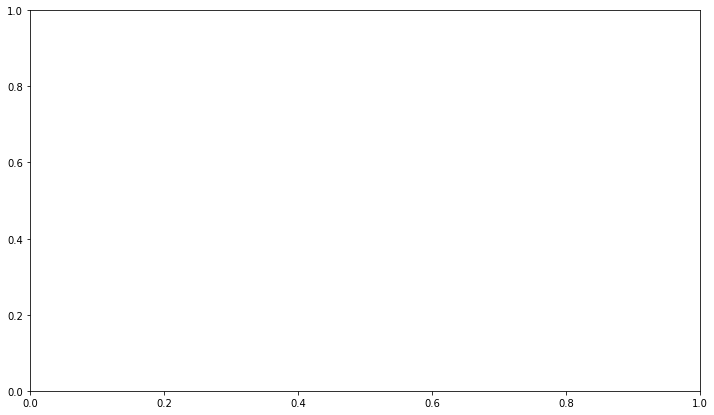

In [6]:



# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Conv1d(1, 2, 5)   # hidden layer
        self.pool1 = torch.nn.MaxPool1d(5,stride = 1)
        self.hidden2 = torch.nn.Conv1d(2,1,1)
        self.predict = torch.nn.Linear(92,100)   # output layer

    def forward(self, x):
#         IT IS NOT AN ISSUE WITH PASSING THE INFORMATION IN
#         plt.figure()
#         plt.plot(x.reshape(-1).detach())
#         plt.show()
        x = F.relu(self.hidden1(x)) # activation function for hidden layer
        x = self.pool1(x)
        x = F.relu(self.hidden2(x))
        x = self.predict(x)             # linear output
        return x

# net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
net = Net()
# print(net)  # net architecture
# optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
optimizer = torch.optim.Adam( net.parameters(), lr=0.00002, weight_decay=0.0005 )
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 50, gamma=1)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# totalTrainLoss = torch.zeros(1000)
# totalTestLoss = torch.zeros(1000)
# predictedMean = torch.zeros(1000)
# tauredMean = torch.zeros(1000)
predictions = torch.zeros(100)


# train the network
for t in range(10000):
#     randomIndex = np.random.randint(0,high=len(taured)-1)
    y, x = createTrainer(100)
#     print(y.shape)
#     print(x.shape)
    prediction = net(y)     # input x and predict based on x
    loss = loss_func(prediction, x)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    scheduler.step()        # scheduler decreases learning rate geometrically every n epochs
#     predictions[t] = prediction
    
#     testLoss = validate()
#     totalTrainLoss[t] = loss
#     totalTestLoss[t] = testLoss
#     predictedMean[t] = prediction.mean()
#     tauredMean[t] = x.mean()
    
    print("Epoch = ", t)
    print("Training Loss = ", loss)
#     print("Test Loss = ", testLoss)
    
    # plot and show learning process
#     plt.cla()
#     ax.set_title('Regression Analysis', fontsize=35)
#     ax.set_xlabel('', fontsize=24)
#     ax.set_ylabel('Tau', fontsize=24)
#     ax.plot(x.data.numpy(), "r.")
#     ax.plot(prediction.data.numpy(), 'g.', lw=3)
#     ax.text(0.6, 0.8, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
#     ax.text(0.6, 0.7, 'Loss = %.4f' % loss.data.numpy(),
#             fontdict={'size': 24, 'color':  'red'})
    
#     ax.set_xlim(0,1.0)
#     ax.set_ylim(0,1.0)

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
#     fig.canvas.draw()       # draw the canvas, cache the renderer
#     image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#     image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

#     my_images.append(image)
    
   


# # save images as a gif    
# imageio.mimsave('./linear_prediction.gif', my_images, fps=10)



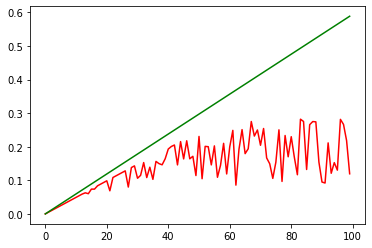

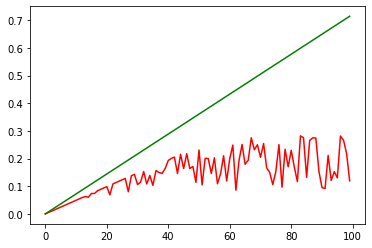

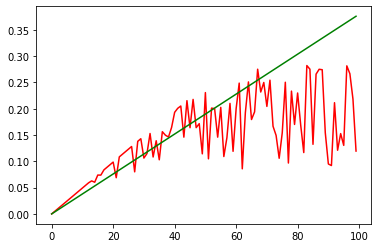

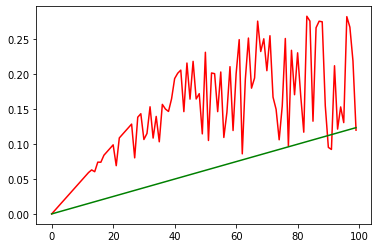

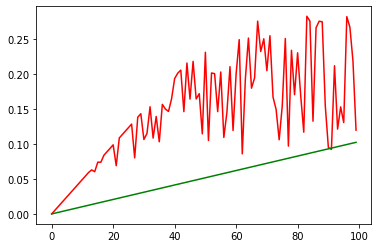

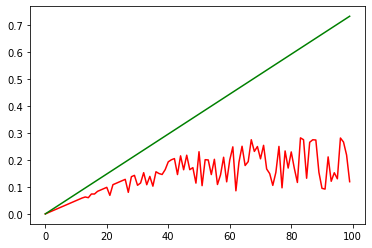

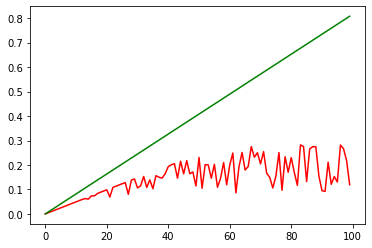

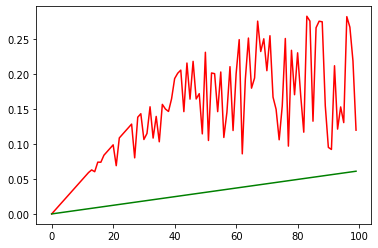

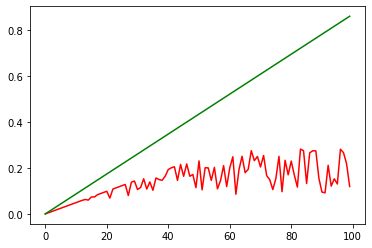

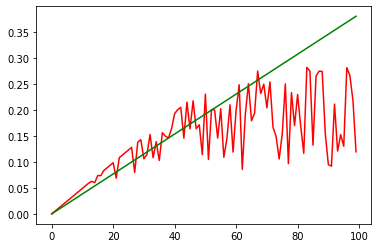

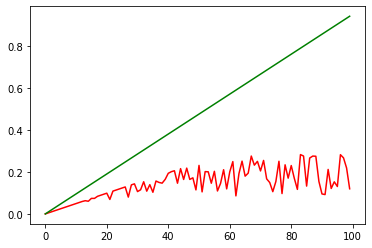

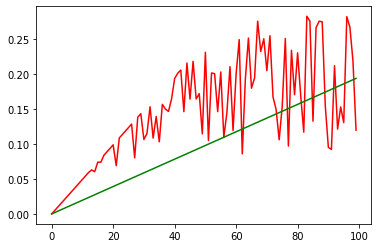

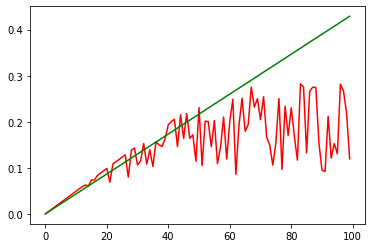

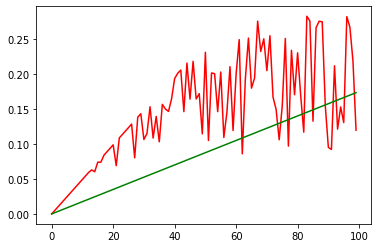

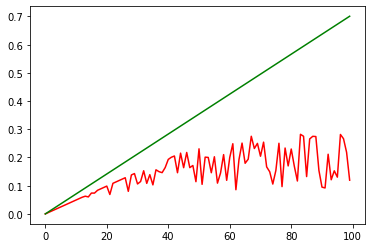

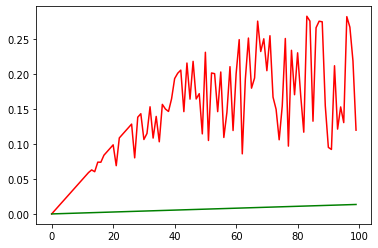

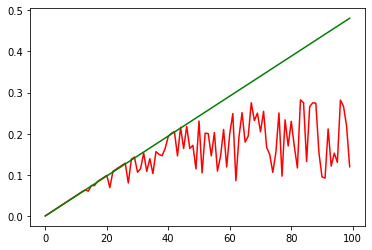

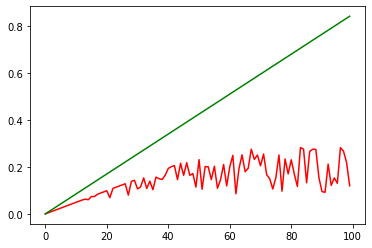

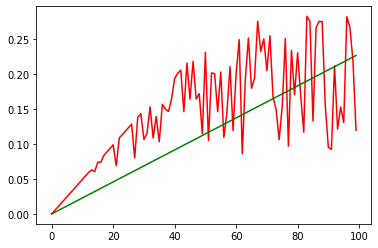

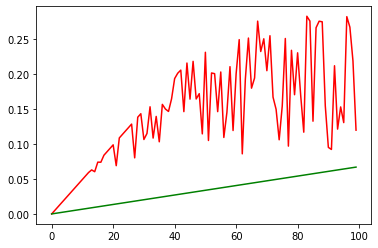

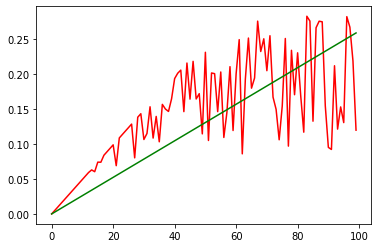

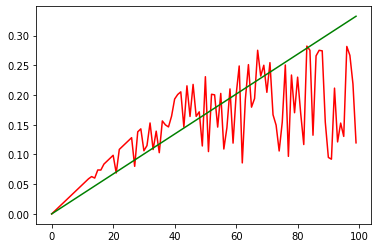

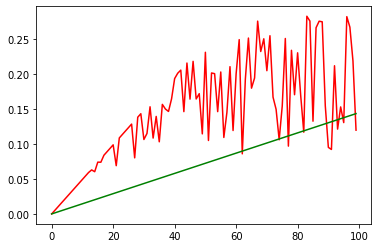

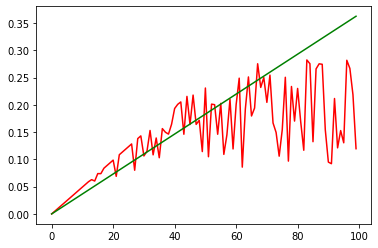

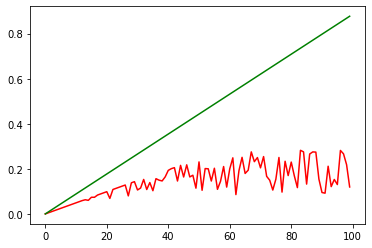

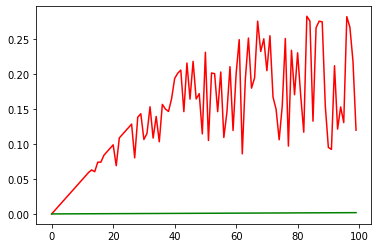

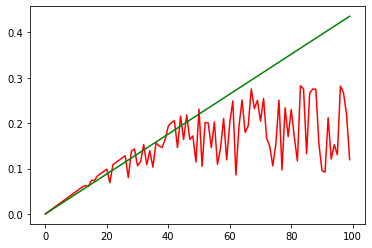

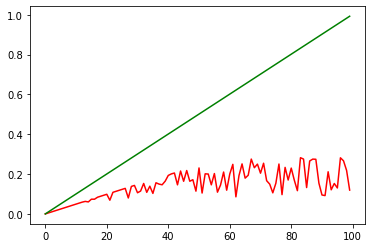

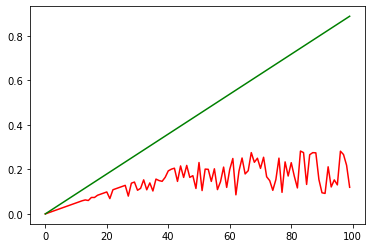

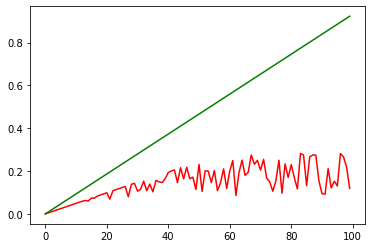

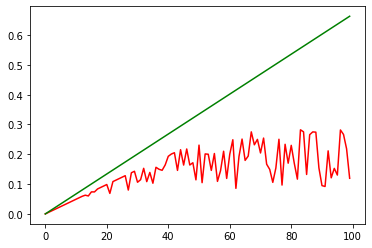

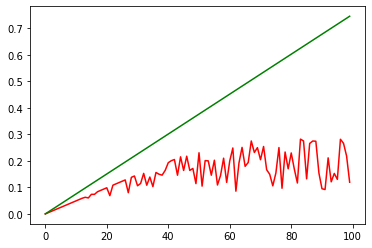

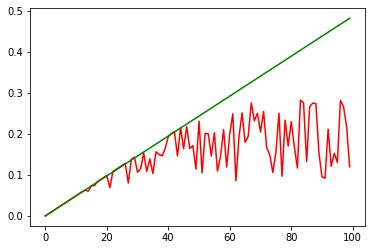

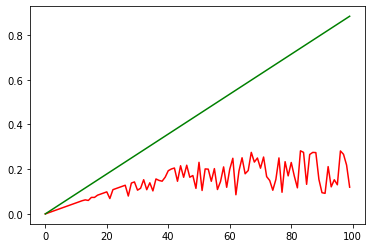

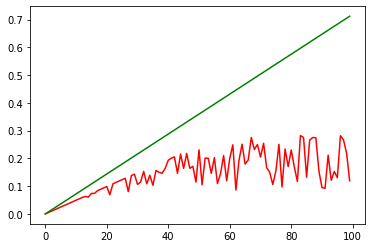

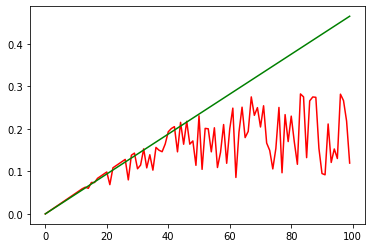

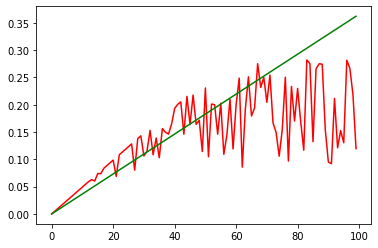

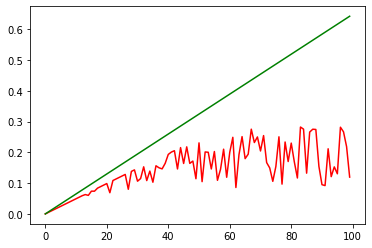

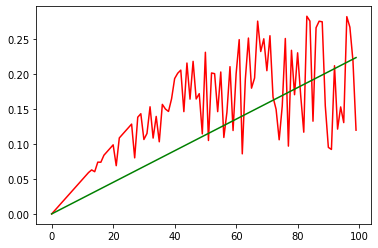

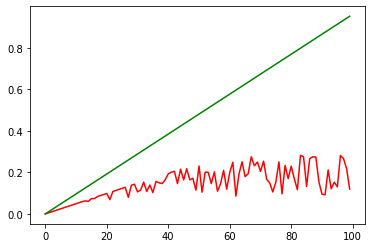

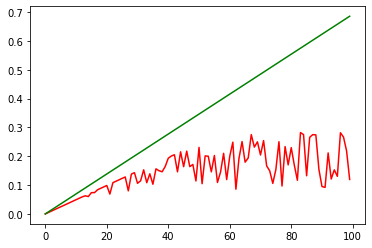

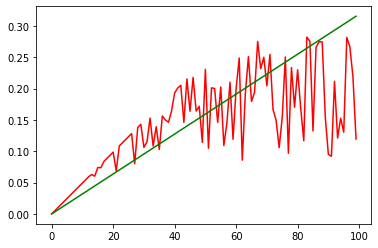

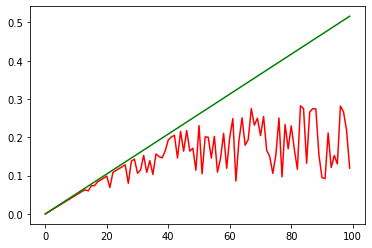

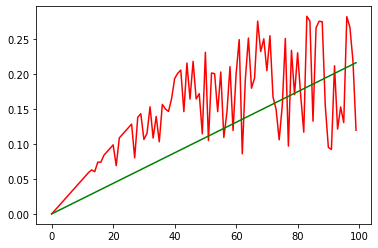

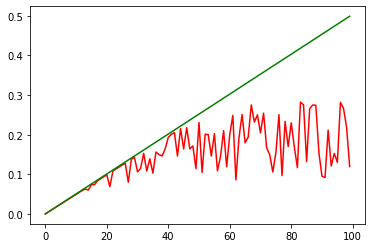

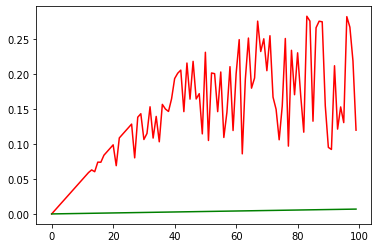

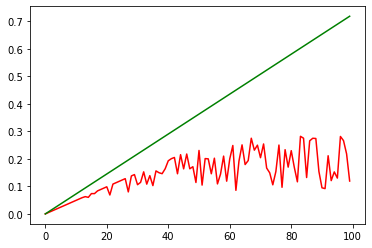

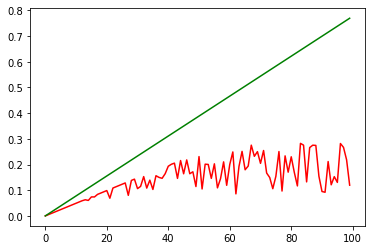

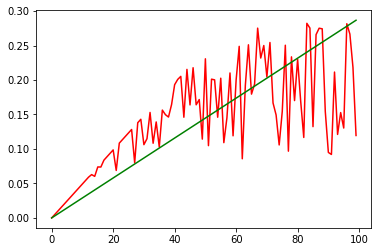

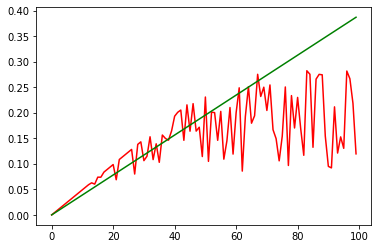

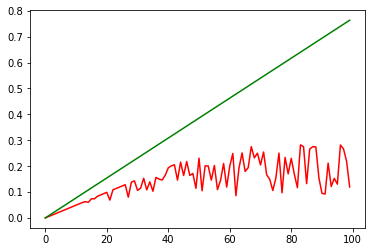

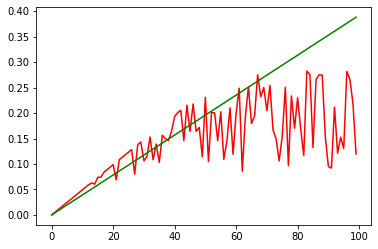

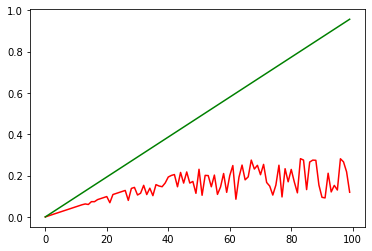

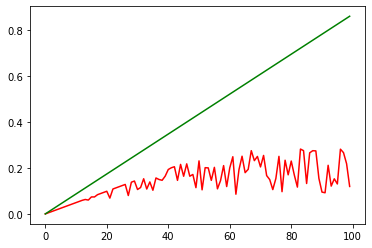

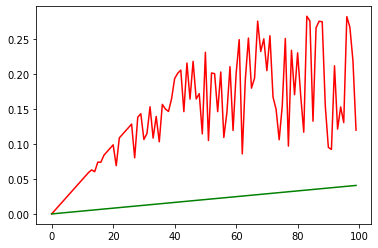

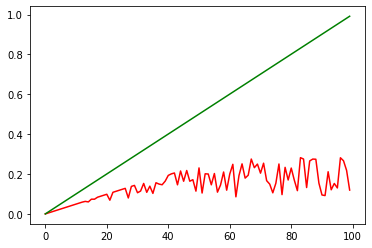

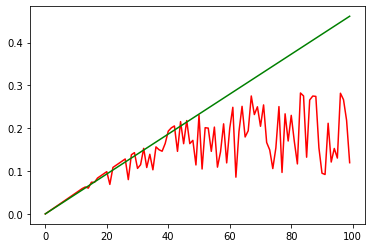

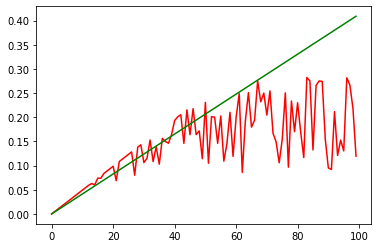

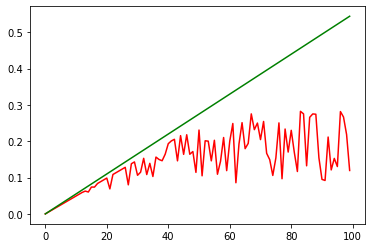

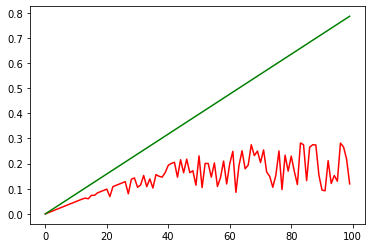

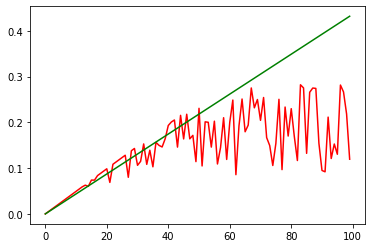

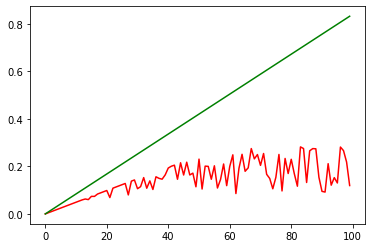

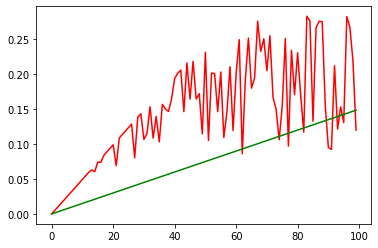

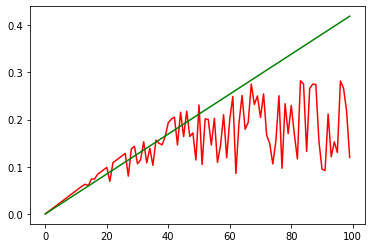

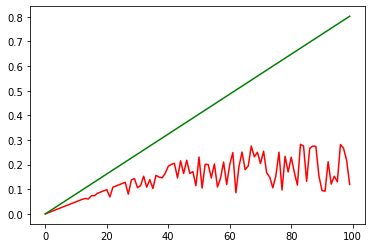

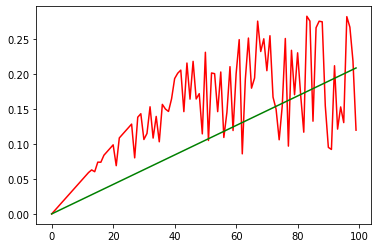

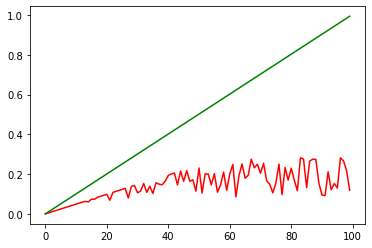

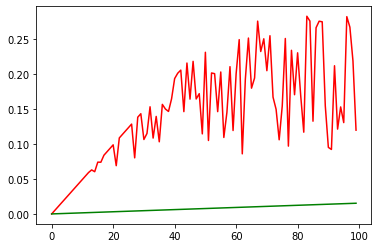

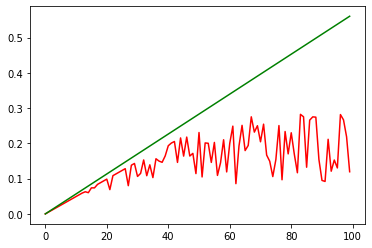

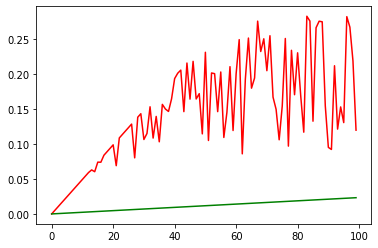

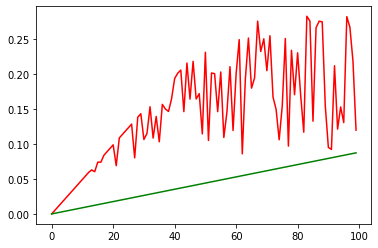

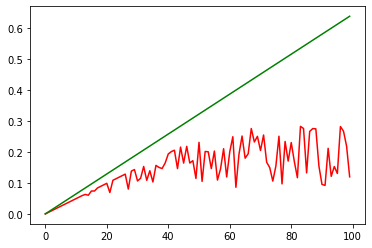

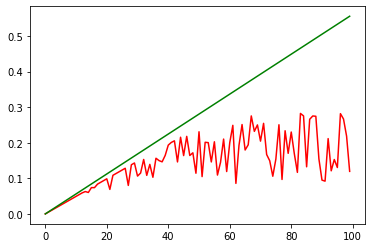

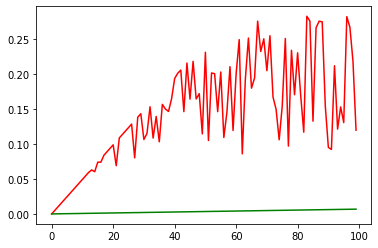

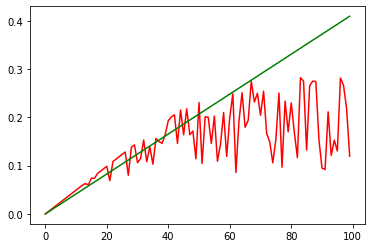

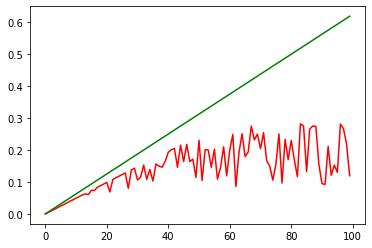

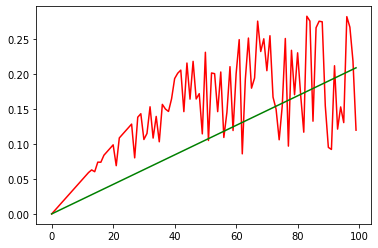

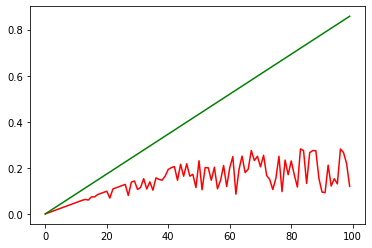

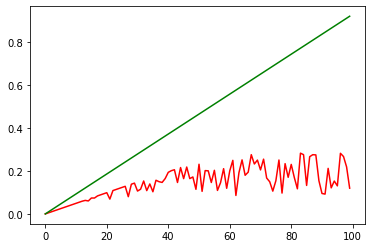

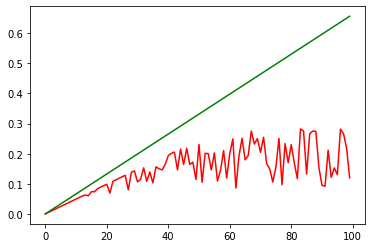

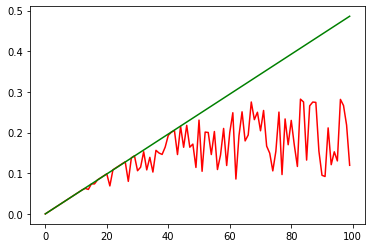

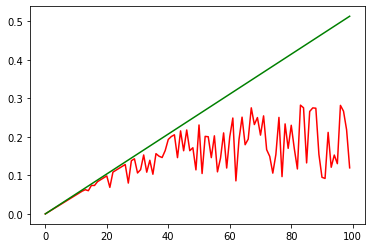

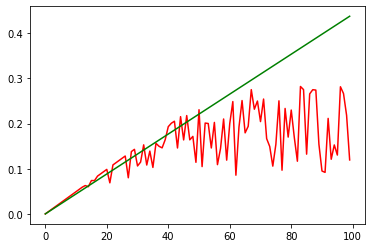

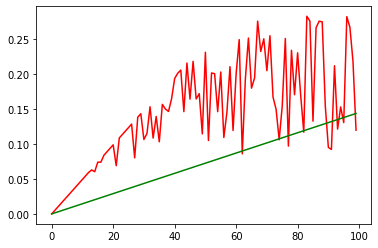

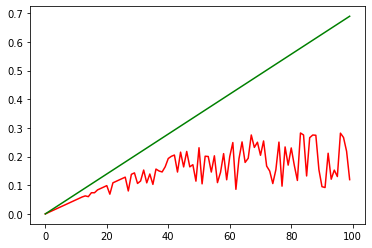

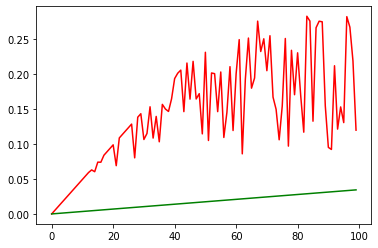

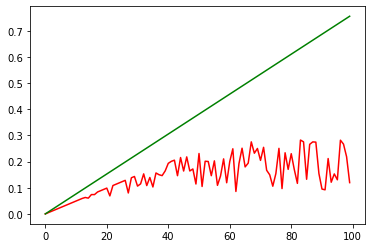

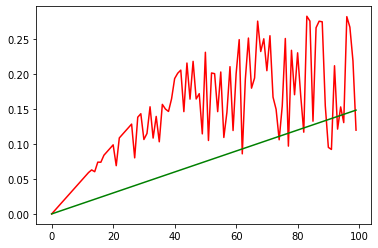

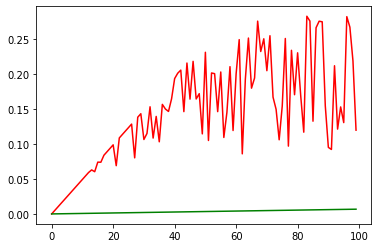

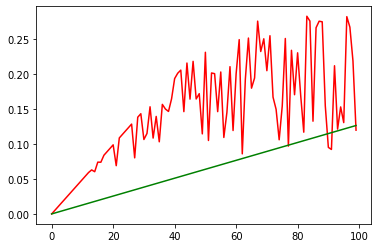

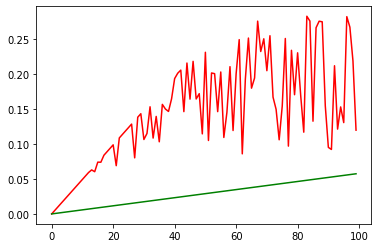

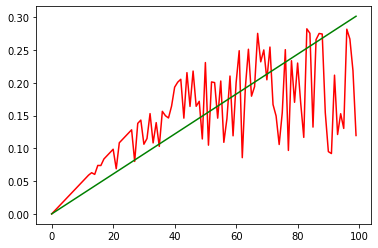

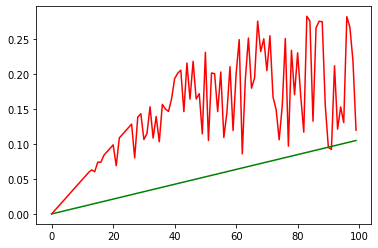

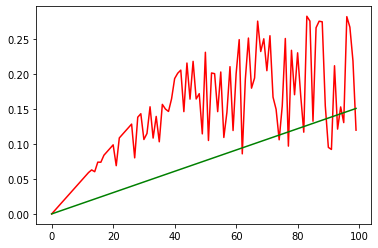

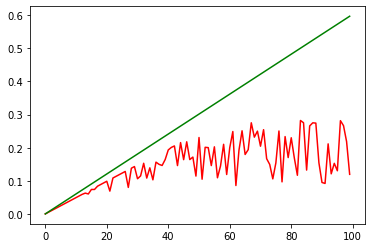

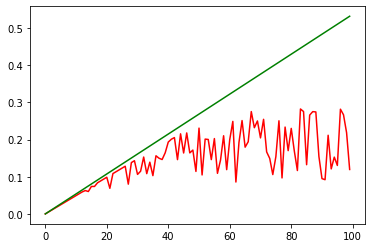

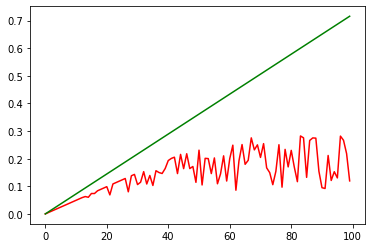

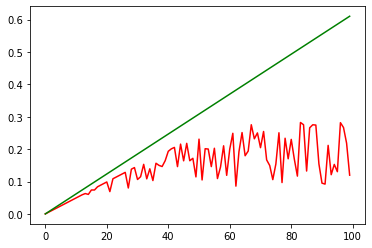

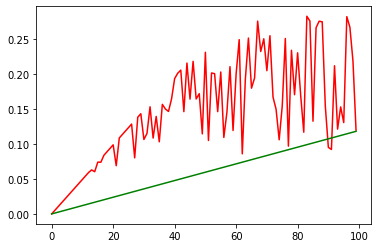

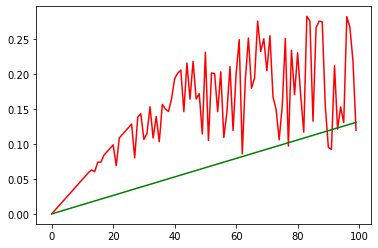

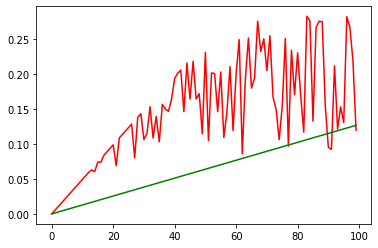

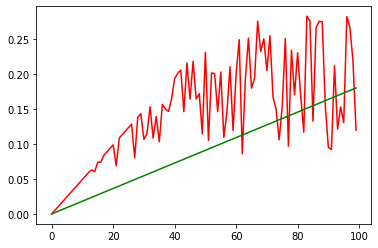

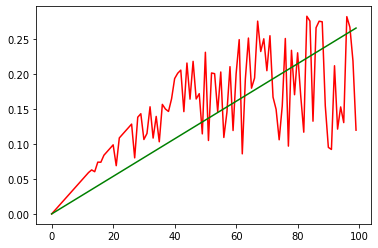

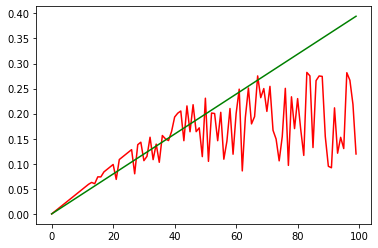

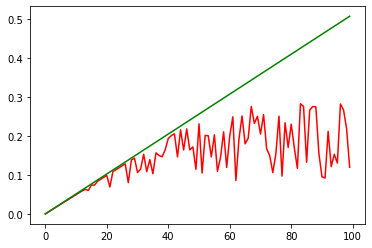

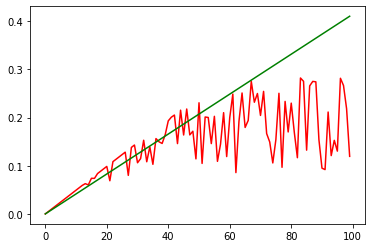

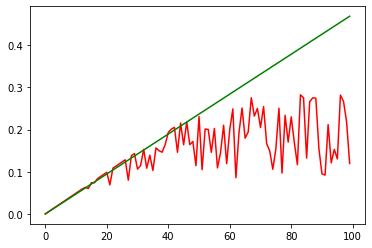

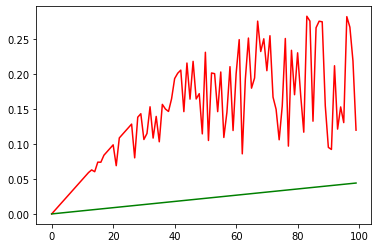

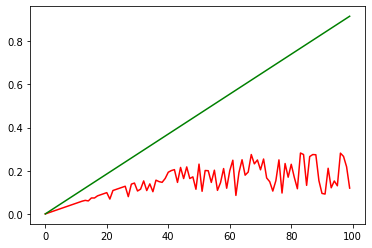

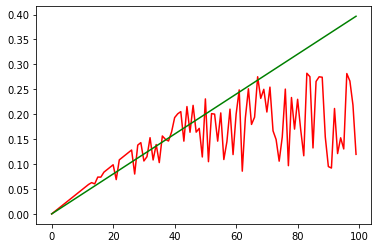

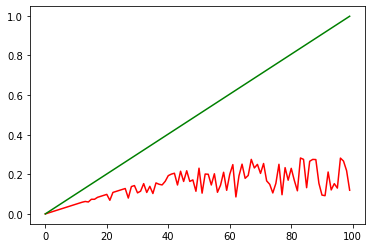

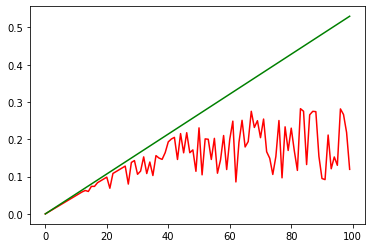

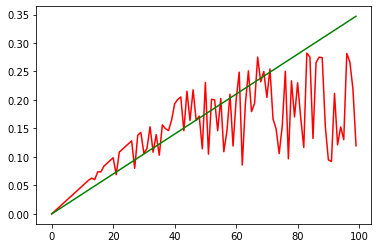

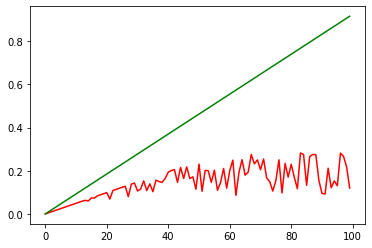

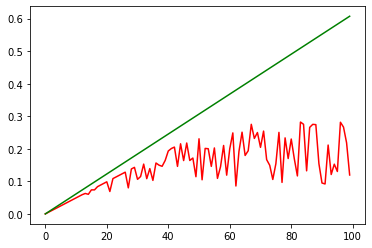

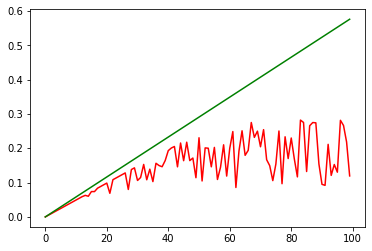

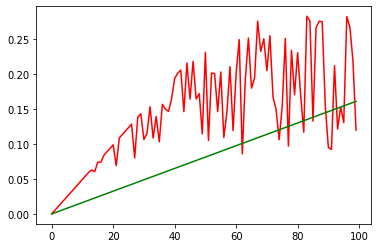

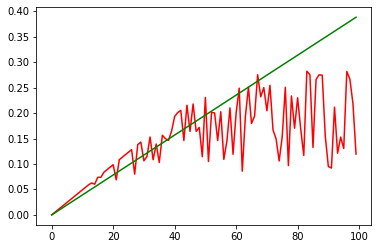

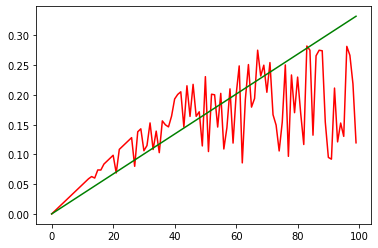

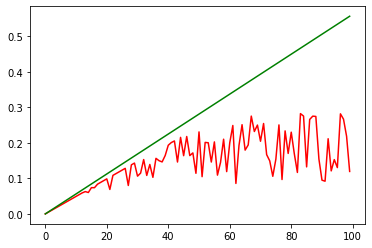

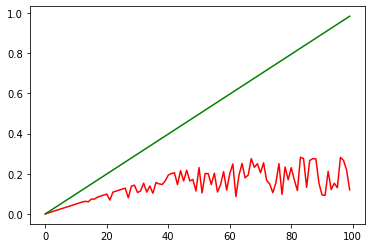

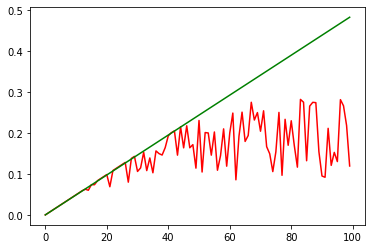

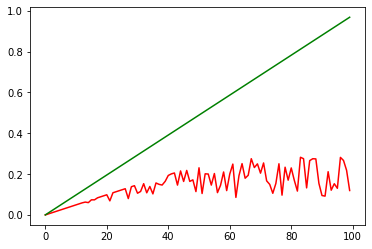

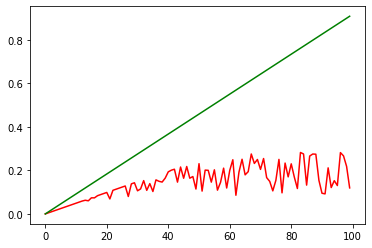

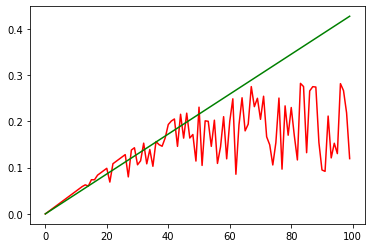

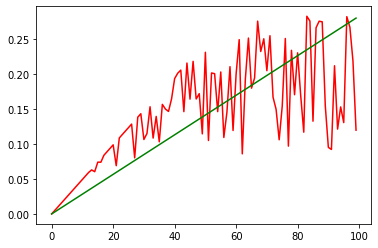

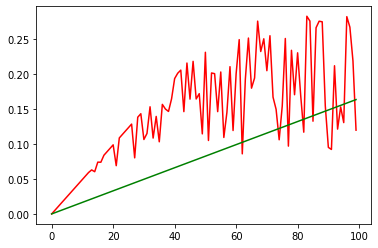

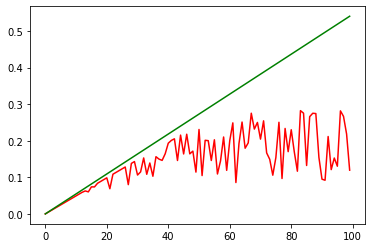

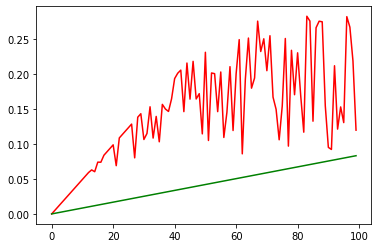

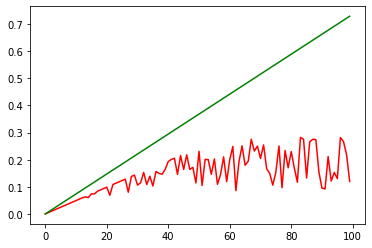

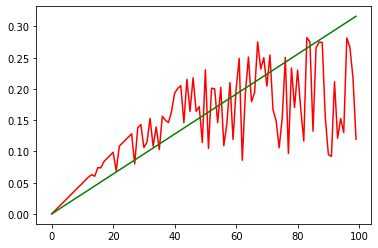

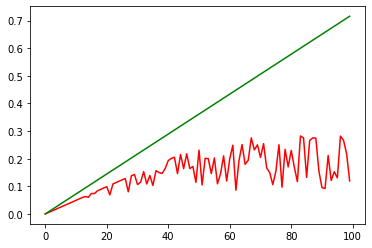

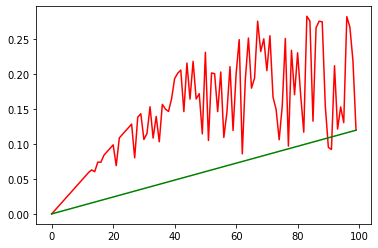

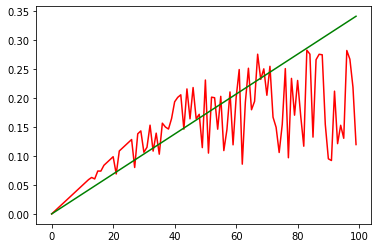

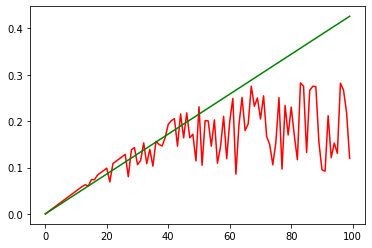

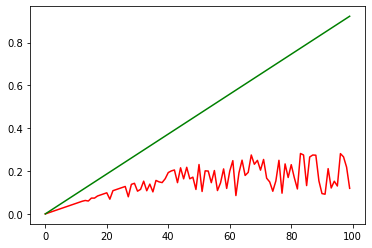

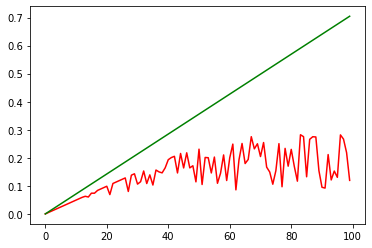

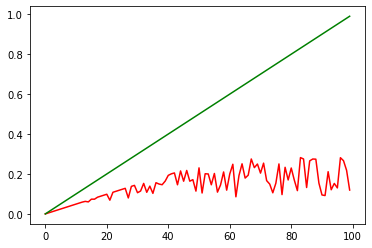

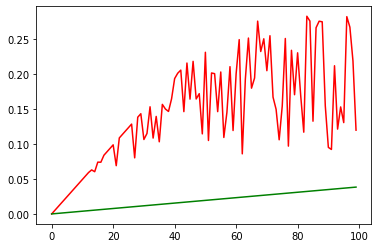

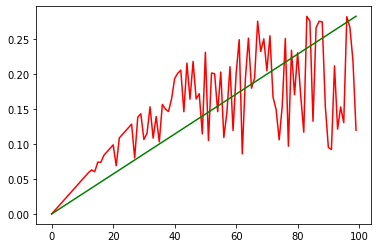

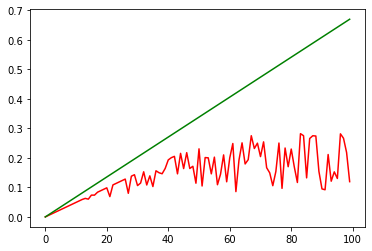

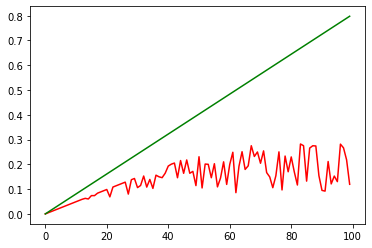

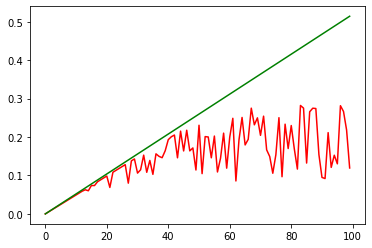

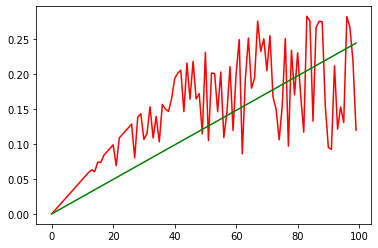

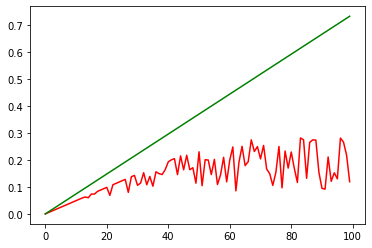

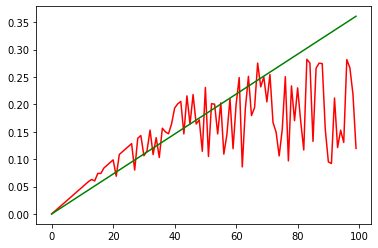

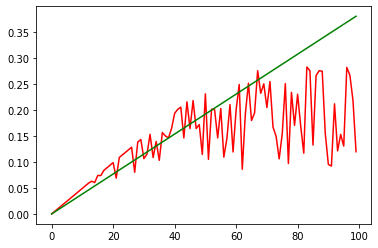

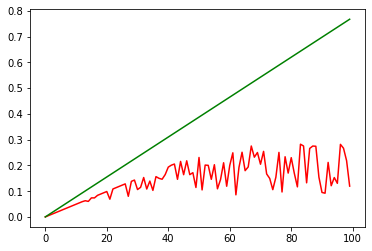

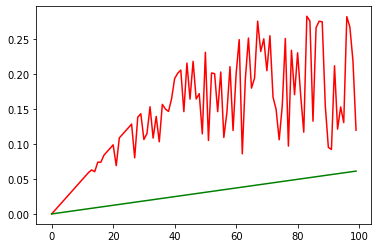

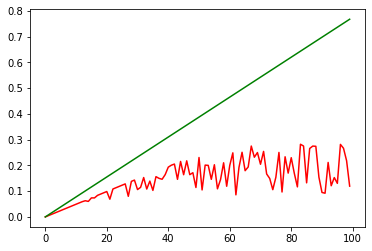

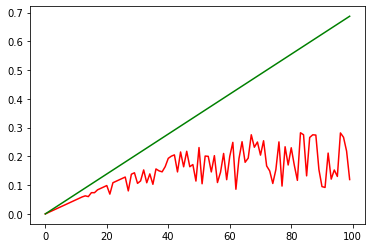

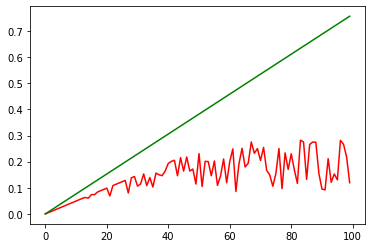

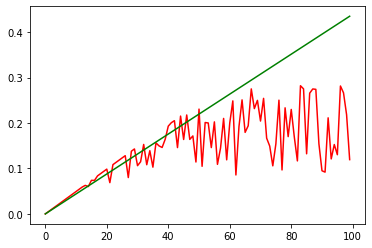

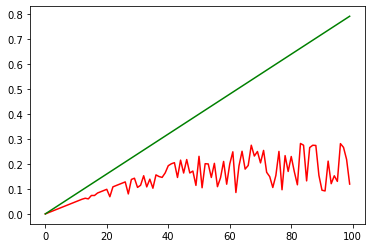

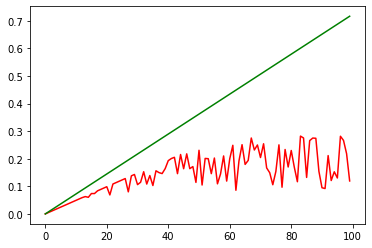

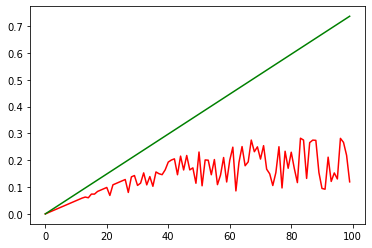

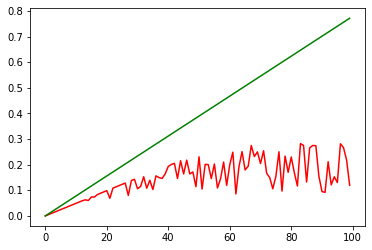

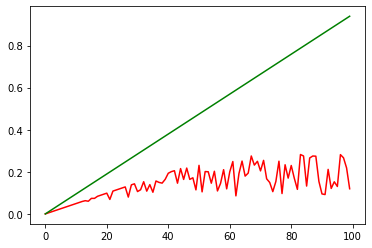

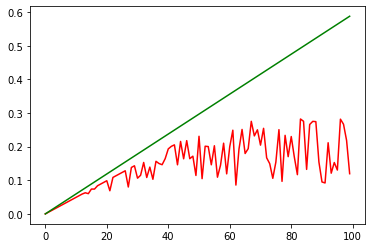

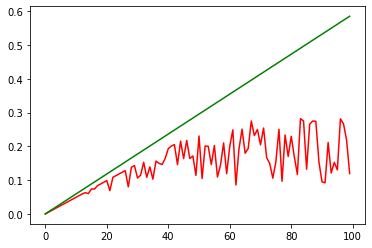

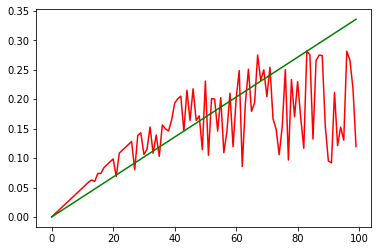

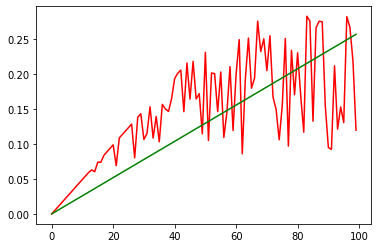

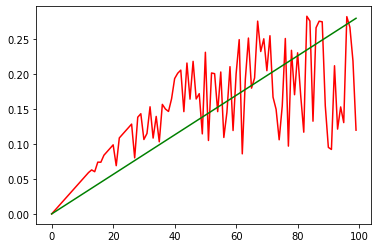

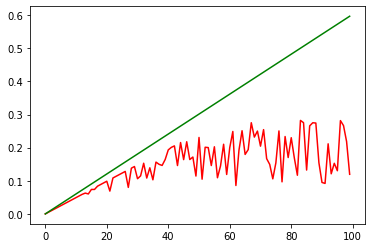

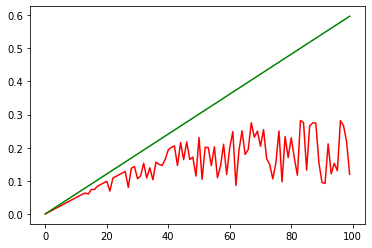

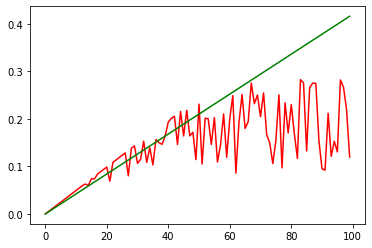

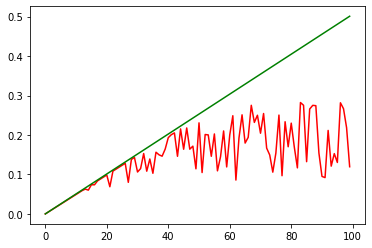

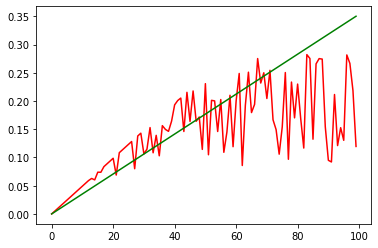

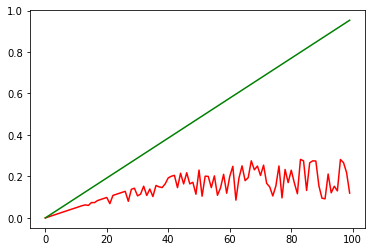

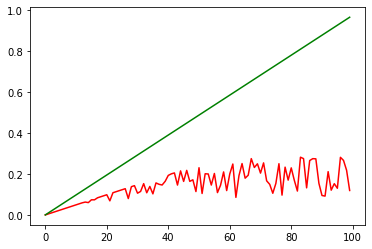

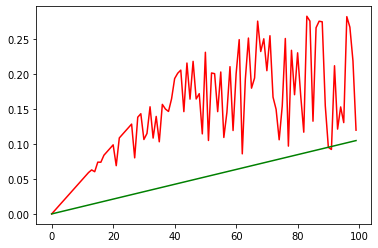

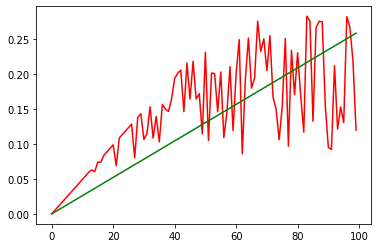

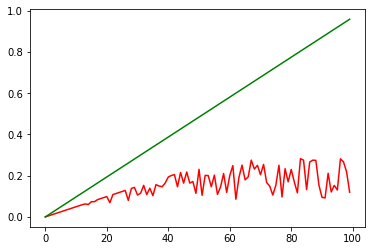

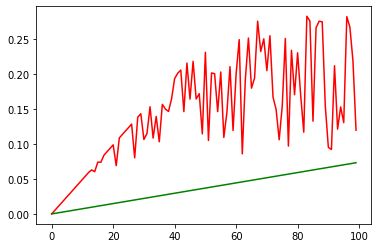

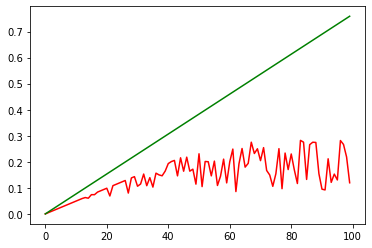

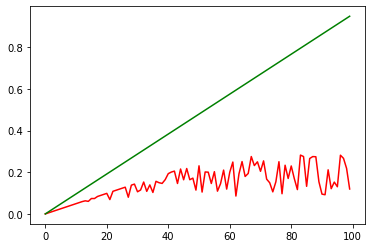

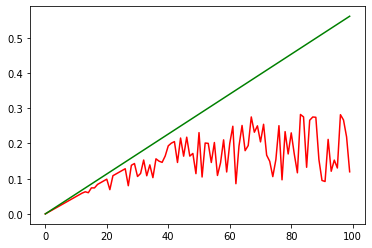

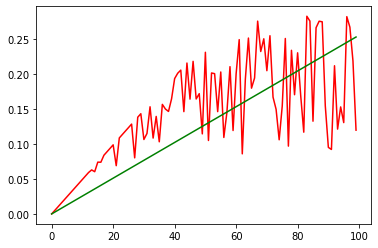

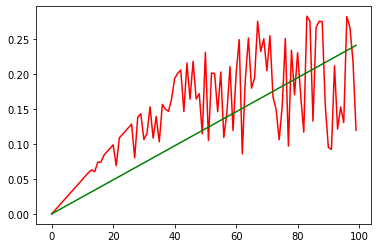

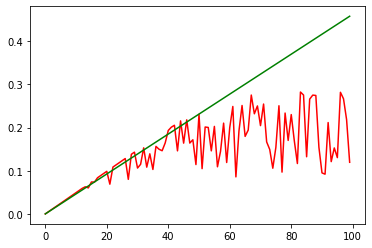

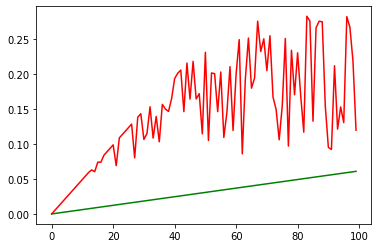

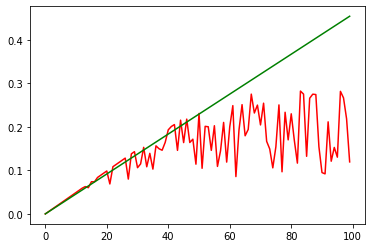

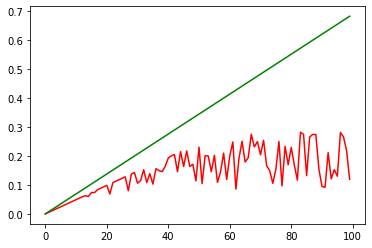

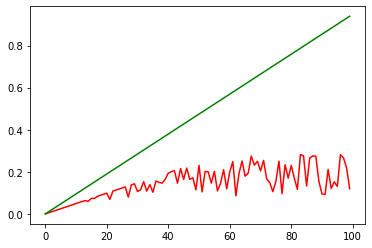

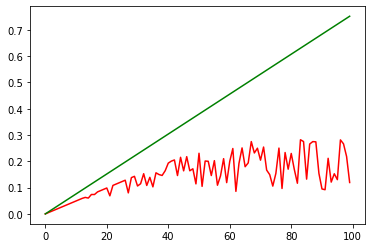

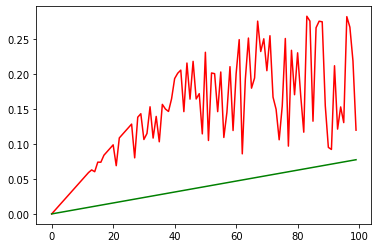

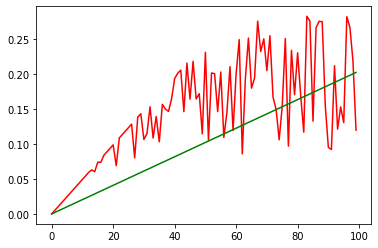

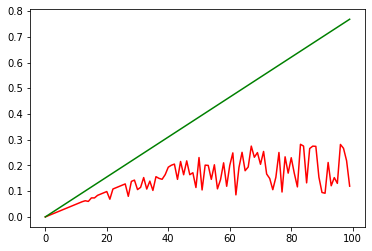

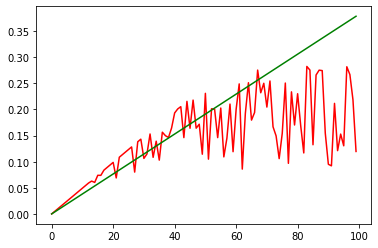

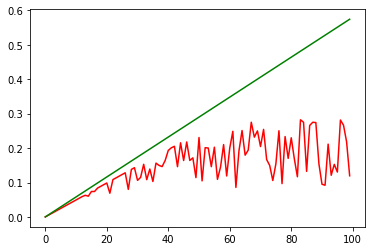

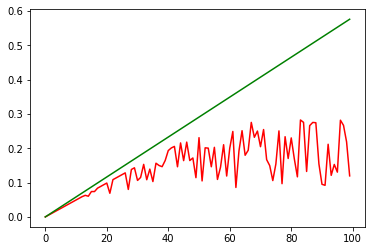

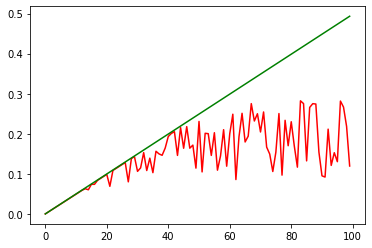

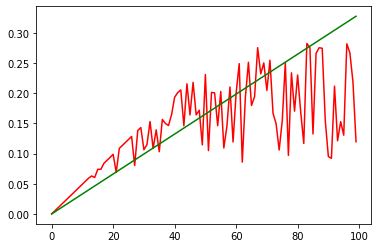

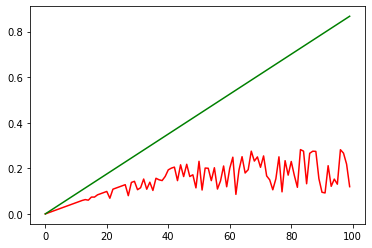

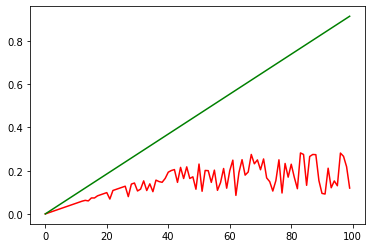

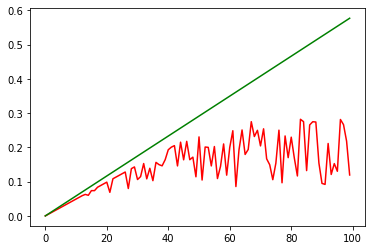

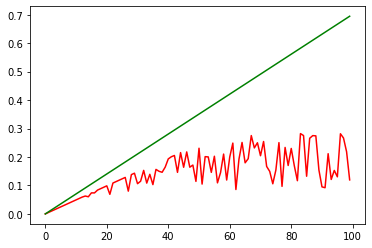

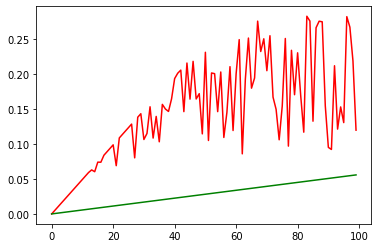

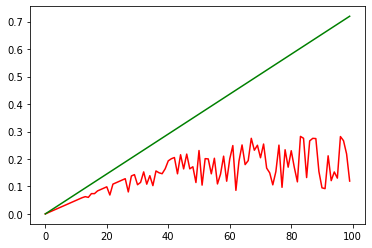

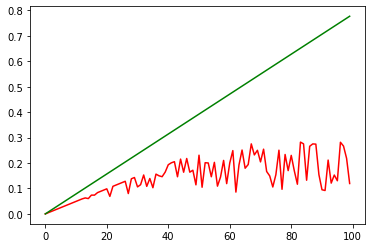

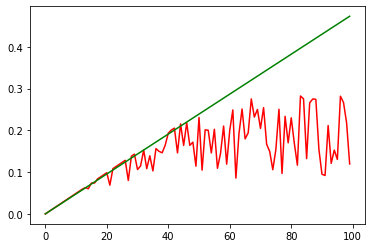

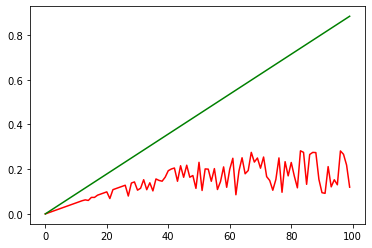

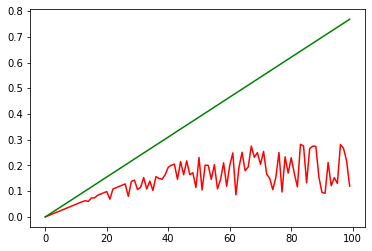

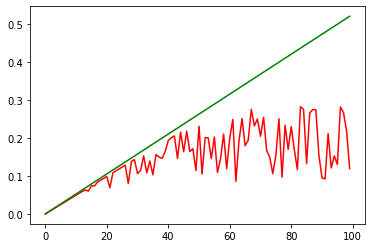

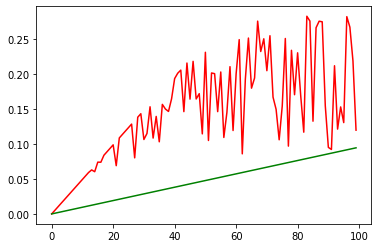

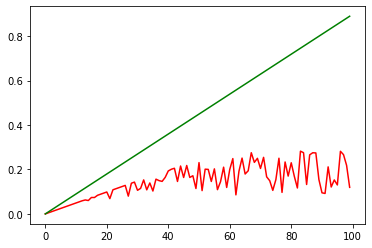

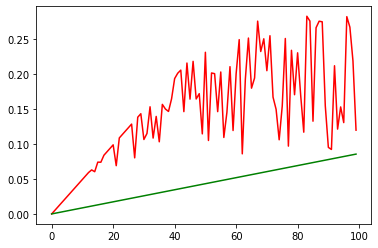

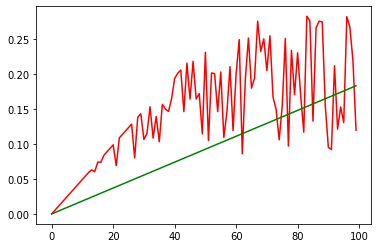

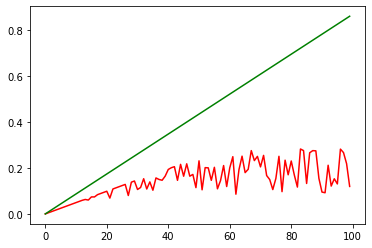

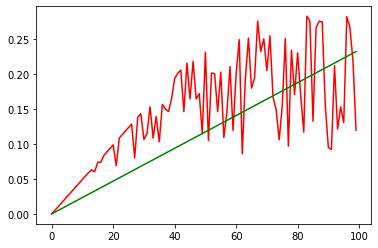

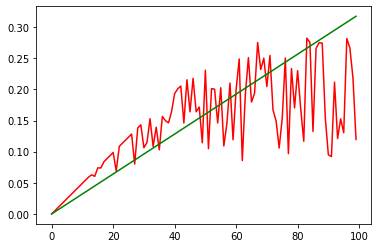

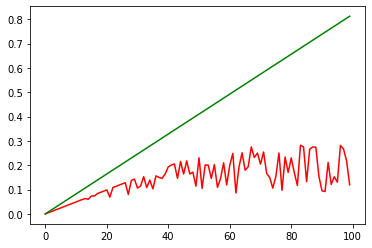

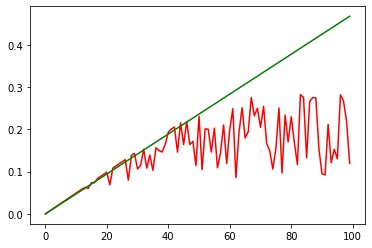

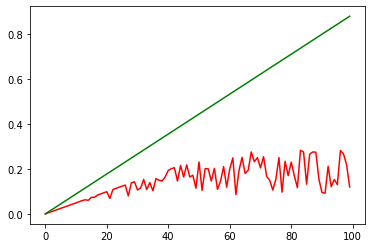

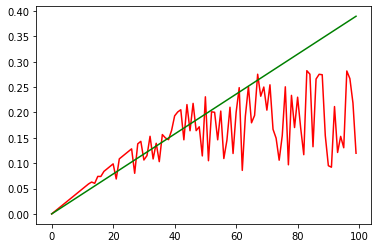

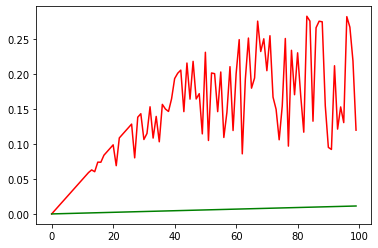

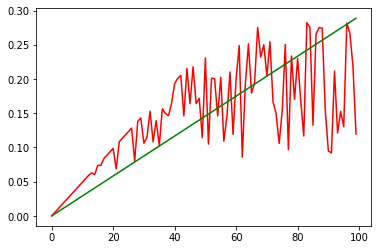

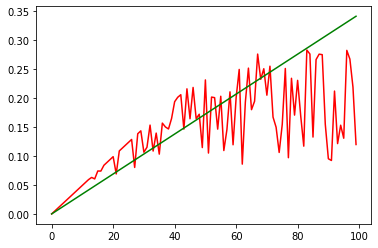

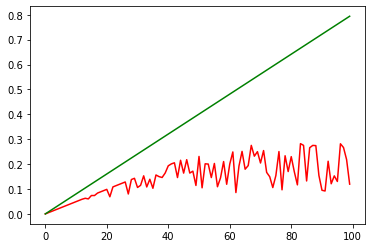

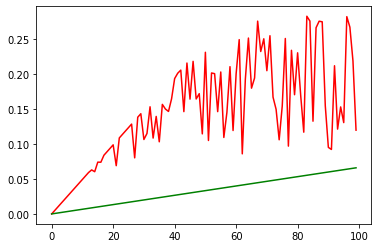

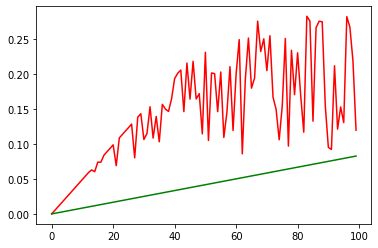

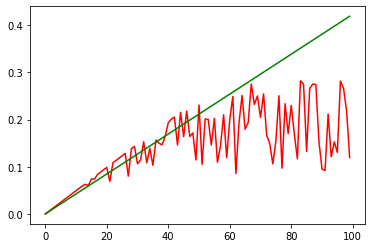

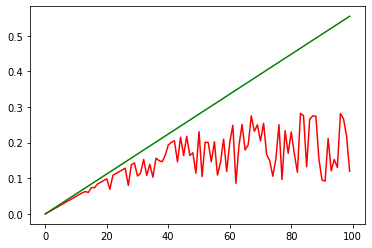

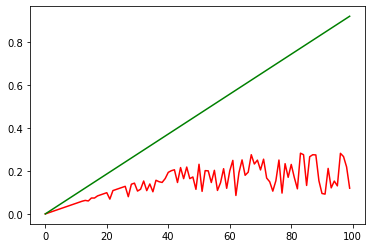

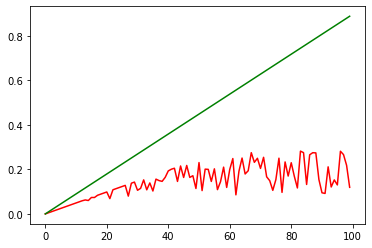

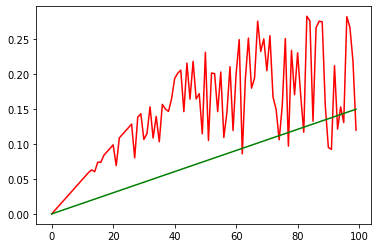

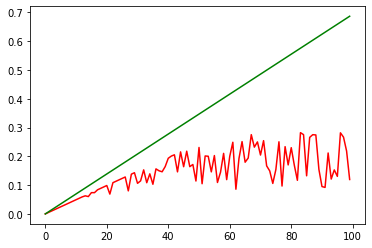

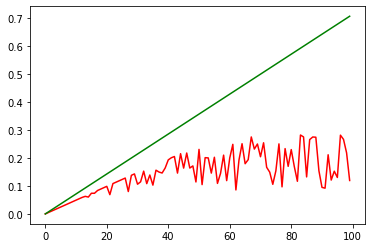

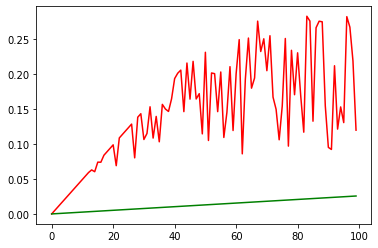

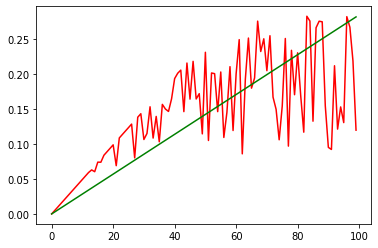

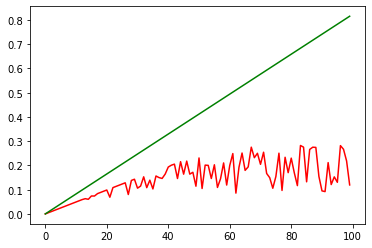

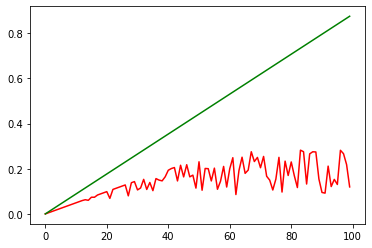

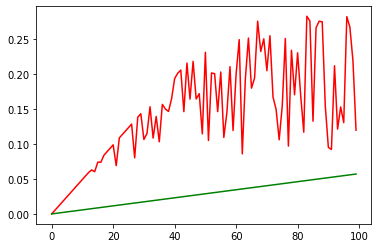

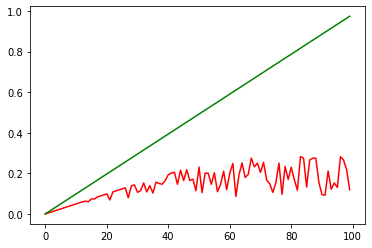

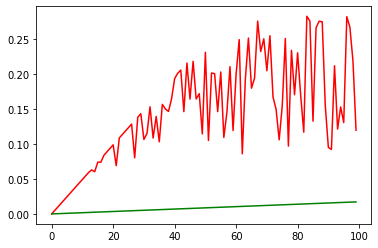

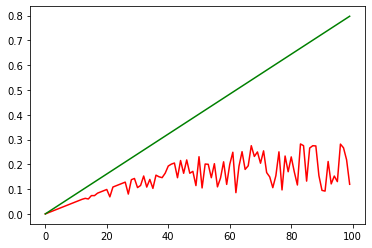

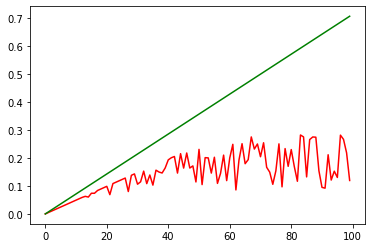

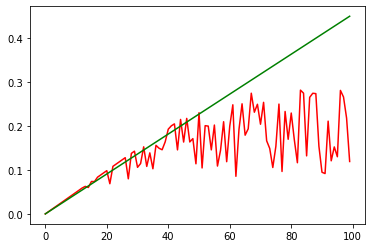

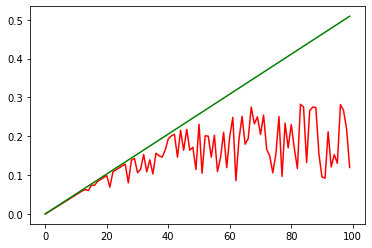

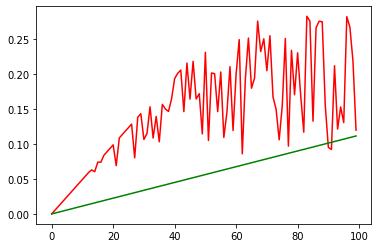

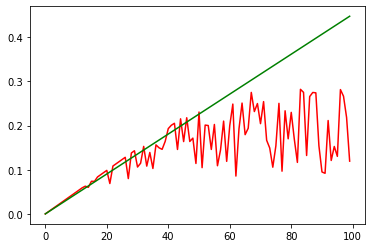

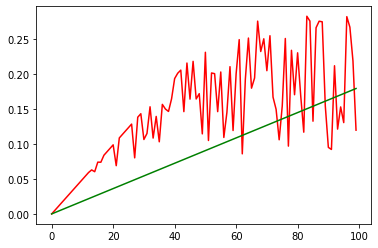

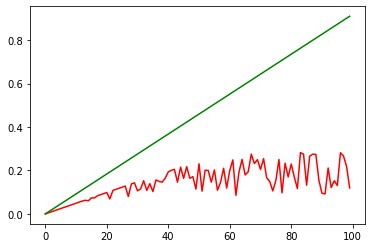

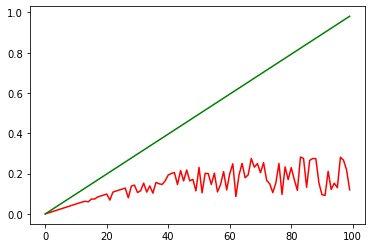

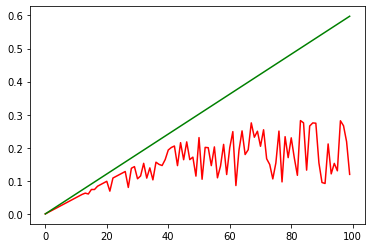

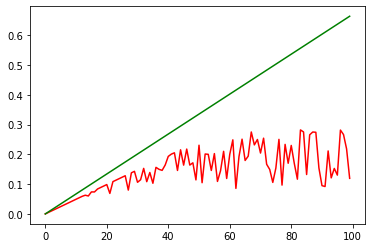

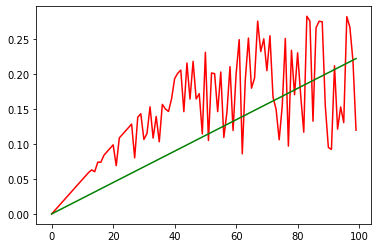

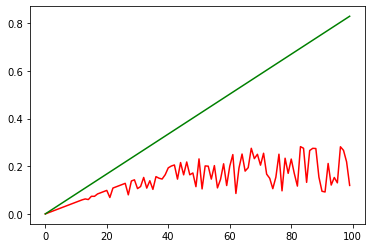

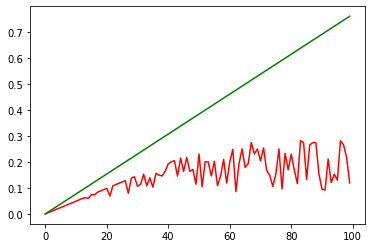

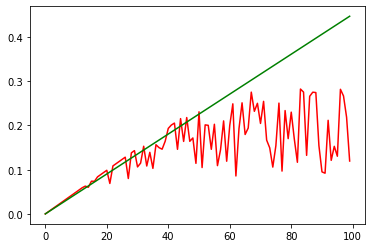

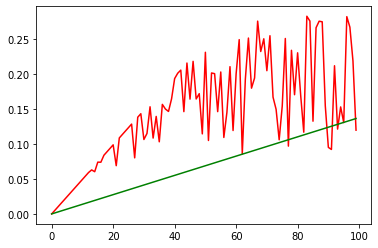

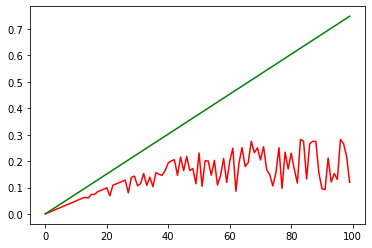

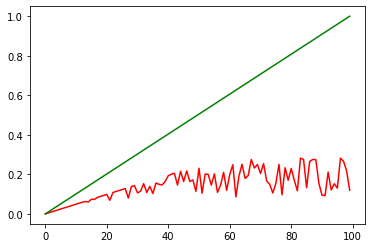

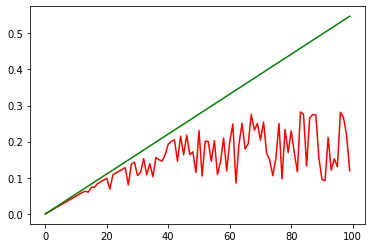

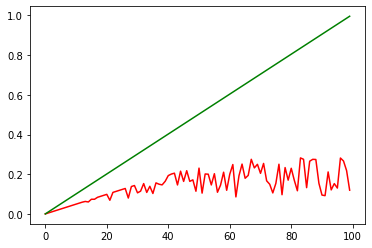

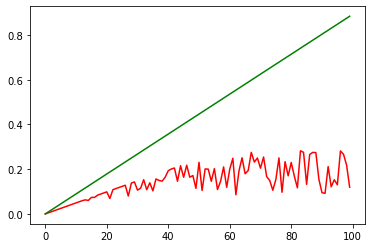

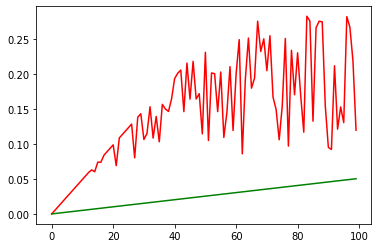

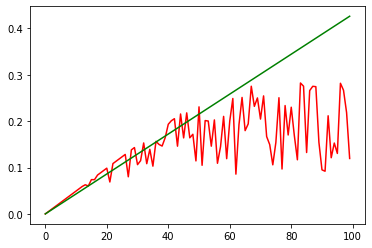

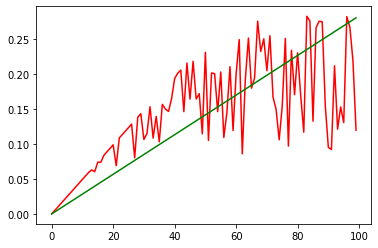

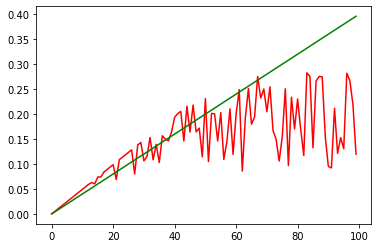

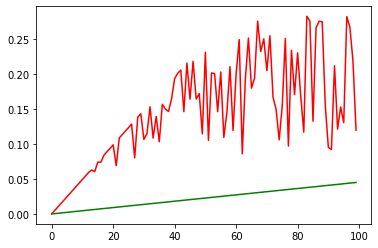

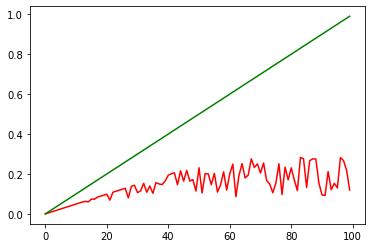

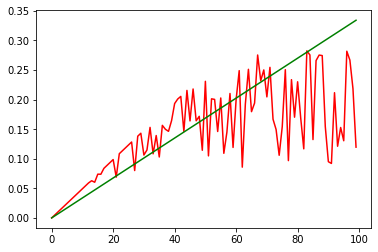

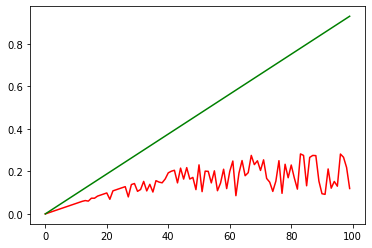

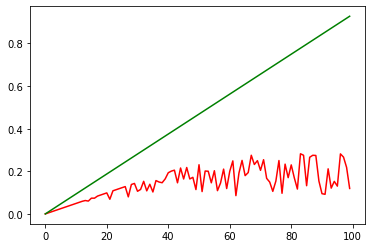

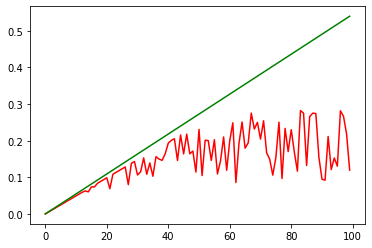

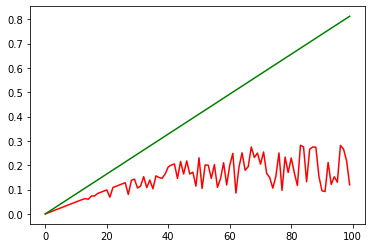

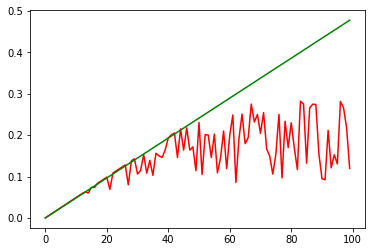

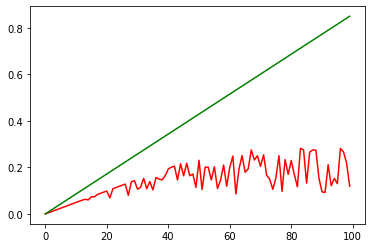

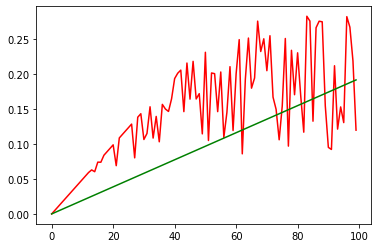

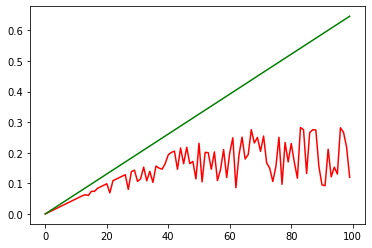

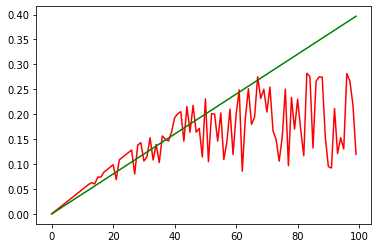

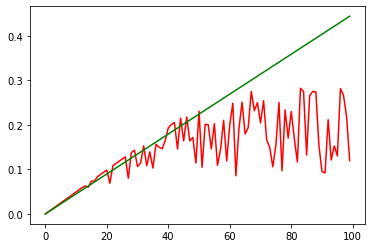

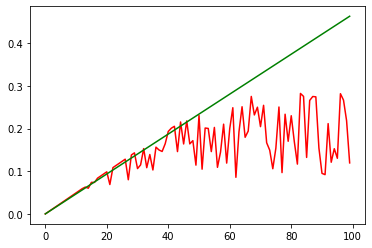

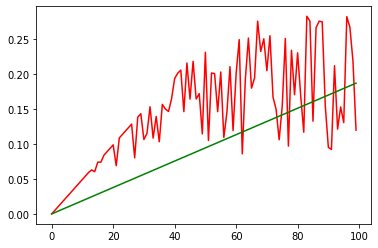

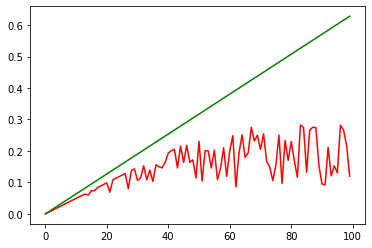

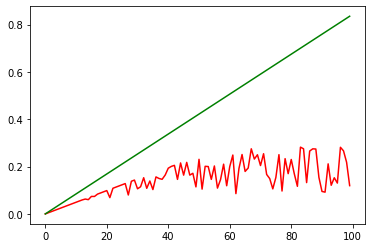

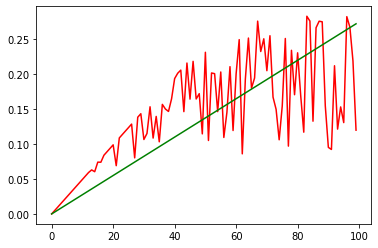

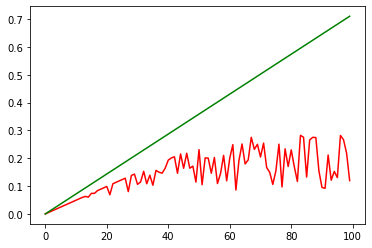

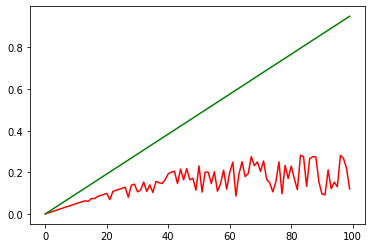

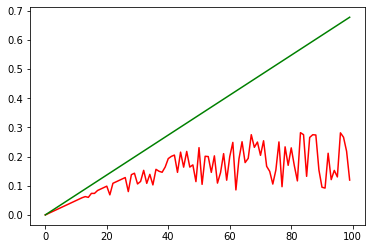

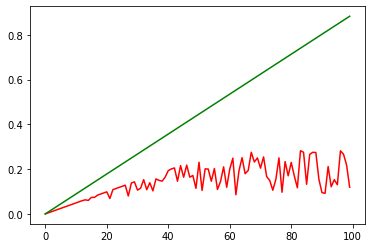

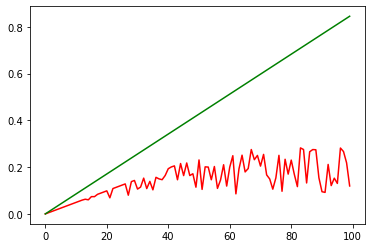

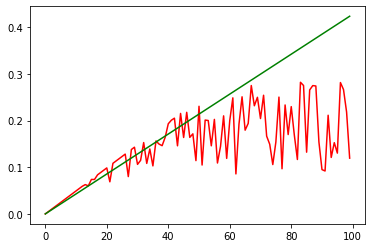

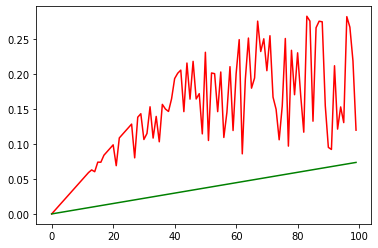

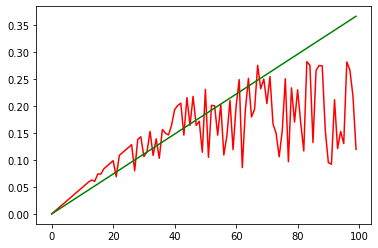

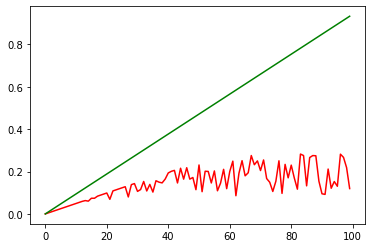

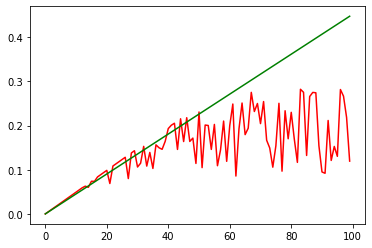

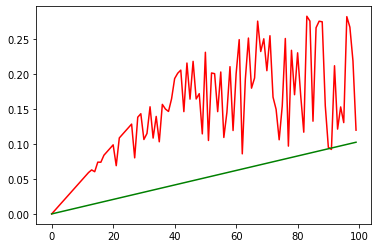

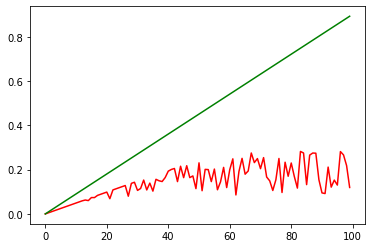

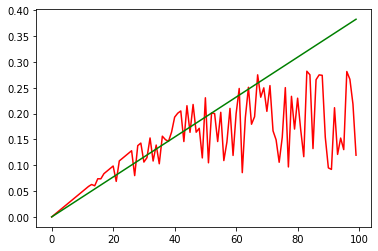

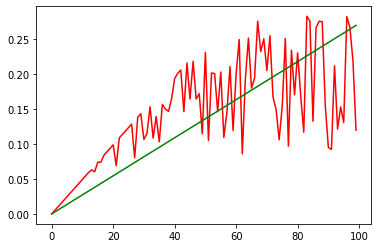

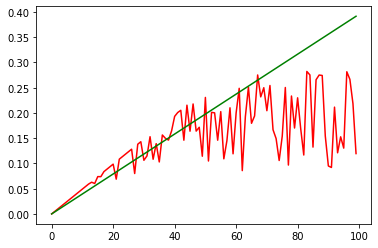

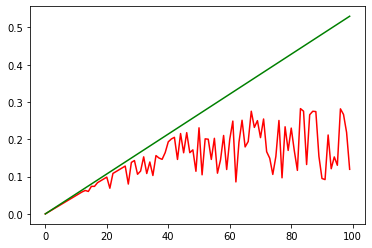

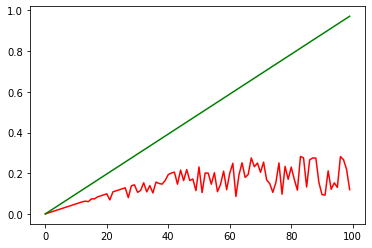

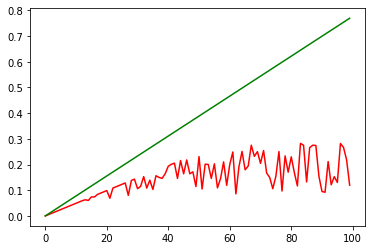

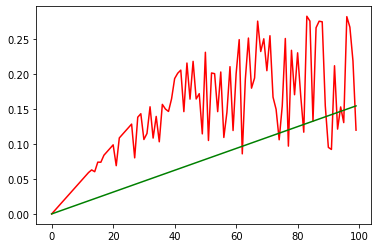

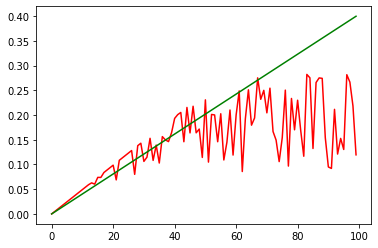

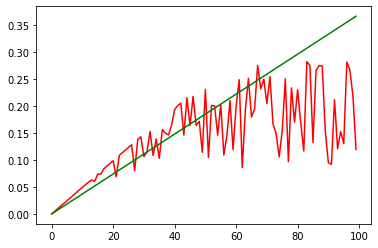

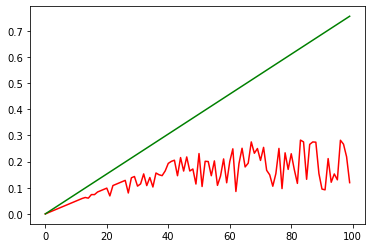

Net(
  (hidden1): Conv1d(1, 2, kernel_size=(5,), stride=(1,))
  (pool1): MaxPool1d(kernel_size=5, stride=1, padding=0, dilation=1, ceil_mode=False)
  (hidden2): Conv1d(2, 1, kernel_size=(1,), stride=(1,))
  (predict): Linear(in_features=92, out_features=100, bias=True)
)

In [7]:


net.eval()
with torch.no_grad():
    for i in range(3):
        y,x = createTrainer(100)
#         plt.figure()
#         plt.plot(prediction.detach().numpy(), "r")
#         plt.plot(x.detach().numpy(), "g")
        for j in range(100):
            plt.figure()
            plt.plot(prediction[j,0].detach().numpy(), "r")
            plt.plot(x[j,0].detach().numpy(), "g")
            plt.show()
    
net.train()

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([1, 100])) that is different to the input size (torch.Size([1, 1, 100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: expand(torch.FloatTensor{[100]}, size=[]): the number of sizes provided (0) must be greater or equal to the number of dimensions in the tensor (1)

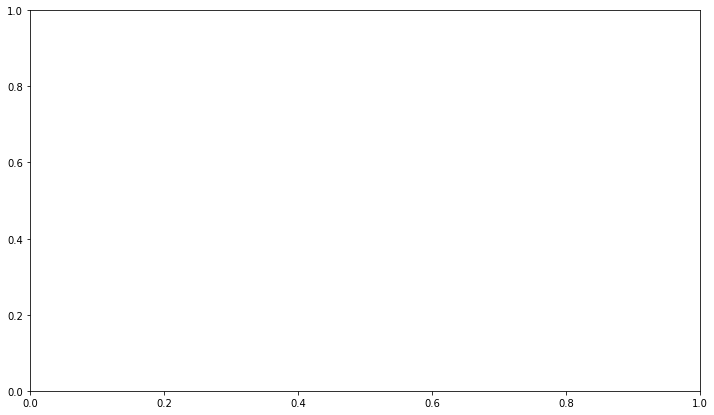

In [5]:




# this is one way to define a network
class Net2(torch.nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
#         self.hidden1 = torch.nn.Conv1d(1, 2, 5)   # hidden layer
#         self.pool1 = torch.nn.MaxPool1d(5,stride = 1)
#         self.hidden2 = torch.nn.Conv1d(2,1,1)
        self.hidden3 = torch.nn.Linear(100,10)
        self.predict = torch.nn.Linear(10, 1)   # output layer
        self.oldPrediction = torch.zeros(512)

    def forward(self, x):
#         IT IS NOT AN ISSUE WITH PASSING THE INFORMATION IN
#         plt.figure()
#         plt.plot(x.reshape(-1).detach())
#         plt.show()
#         x = F.relu(self.hidden1(x)) # activation function for hidden layer
#         x = self.pool1(x)
#         x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.predict(x)             # linear output
        x = x.reshape(-1)
        return x

# net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
net2 = Net2()
# print(net)  # net architecture
# optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
optimizer = torch.optim.Adam( net.parameters(), lr=0.002, weight_decay=0.0005 )
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 50, gamma=1)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# totalTrainLoss = torch.zeros(1000)
# totalTestLoss = torch.zeros(1000)
# predictedMean = torch.zeros(1000)
# tauredMean = torch.zeros(1000)
predictions = torch.zeros(100)


# train the network
for t in range(100):
#     randomIndex = np.random.randint(0,high=len(taured)-1)
    y = ins[t,...]
    y = torch.reshape(y, (-1,1,100))
    prediction = net(y)     # input x and predict based on x
    loss = loss_func(prediction, outs[t])     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    scheduler.step()        # scheduler decreases learning rate geometrically every n epochs
    predictions[t] = prediction
    
#     testLoss = validate()
#     totalTrainLoss[t] = loss
#     totalTestLoss[t] = testLoss
#     predictedMean[t] = prediction.mean()
#     tauredMean[t] = x.mean()
    
    print("Epoch = ", t)
    print("Training Loss = ", loss)
#     print("Test Loss = ", testLoss)
    
    # plot and show learning process
#     plt.cla()
#     ax.set_title('Regression Analysis', fontsize=35)
#     ax.set_xlabel('', fontsize=24)
#     ax.set_ylabel('Tau', fontsize=24)
#     ax.plot(x.data.numpy(), "r.")
#     ax.plot(prediction.data.numpy(), 'g.', lw=3)
#     ax.text(0.6, 0.8, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
#     ax.text(0.6, 0.7, 'Loss = %.4f' % loss.data.numpy(),
#             fontdict={'size': 24, 'color':  'red'})
    
#     ax.set_xlim(0,1.0)
#     ax.set_ylim(0,1.0)

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
#     fig.canvas.draw()       # draw the canvas, cache the renderer
#     image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
#     image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

#     my_images.append(image)
    
   


# # save images as a gif    
# imageio.mimsave('./linear_prediction.gif', my_images, fps=10)



In [ ]:
plt.figure()
plt.plot(outs.detach(), "g")
plt.plot(predictions.detach(), "r")
plt.show